# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

**The dataset was collected from  17 campaigns that occurred between May 2008 and November 2010. A total of 79354 customer contacts were made to collect the data. The dataset original dataset has 59 client attributes. In this starter package we are presented with 41188 records with 20 features and one response column. It was conducted through two channels which were: <li>1.The telephone, with a human agent as the interlocutor, was the dominant marketing channel.</li> <li>2. Occasional auxiliary use of the Internet online banking channel.</li>**

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import numpy as np 
import time
import missingno as msno

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# matplotlib and seaborn setting
plt.rcParams['figure.dpi'] = 150
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

sns.set(rc={'figure.figsize':(6,6)})
sns.set_theme(style="darkgrid")
# sns.set(font_scale=0.7)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix

In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, fbeta_score
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.experimental import enable_halving_search_cv # noqa
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn import set_config
set_config(display='diagram')

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')

In [10]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [11]:
#  Dimensionality of the dataset
df.shape

(41188, 21)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Some features are marked with "." and others with"_". We want to make it uniform for consistency**

In [13]:
# renaming columns
df.columns = df.columns.str.lower().str.replace('.', '_')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [15]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

<AxesSubplot:>

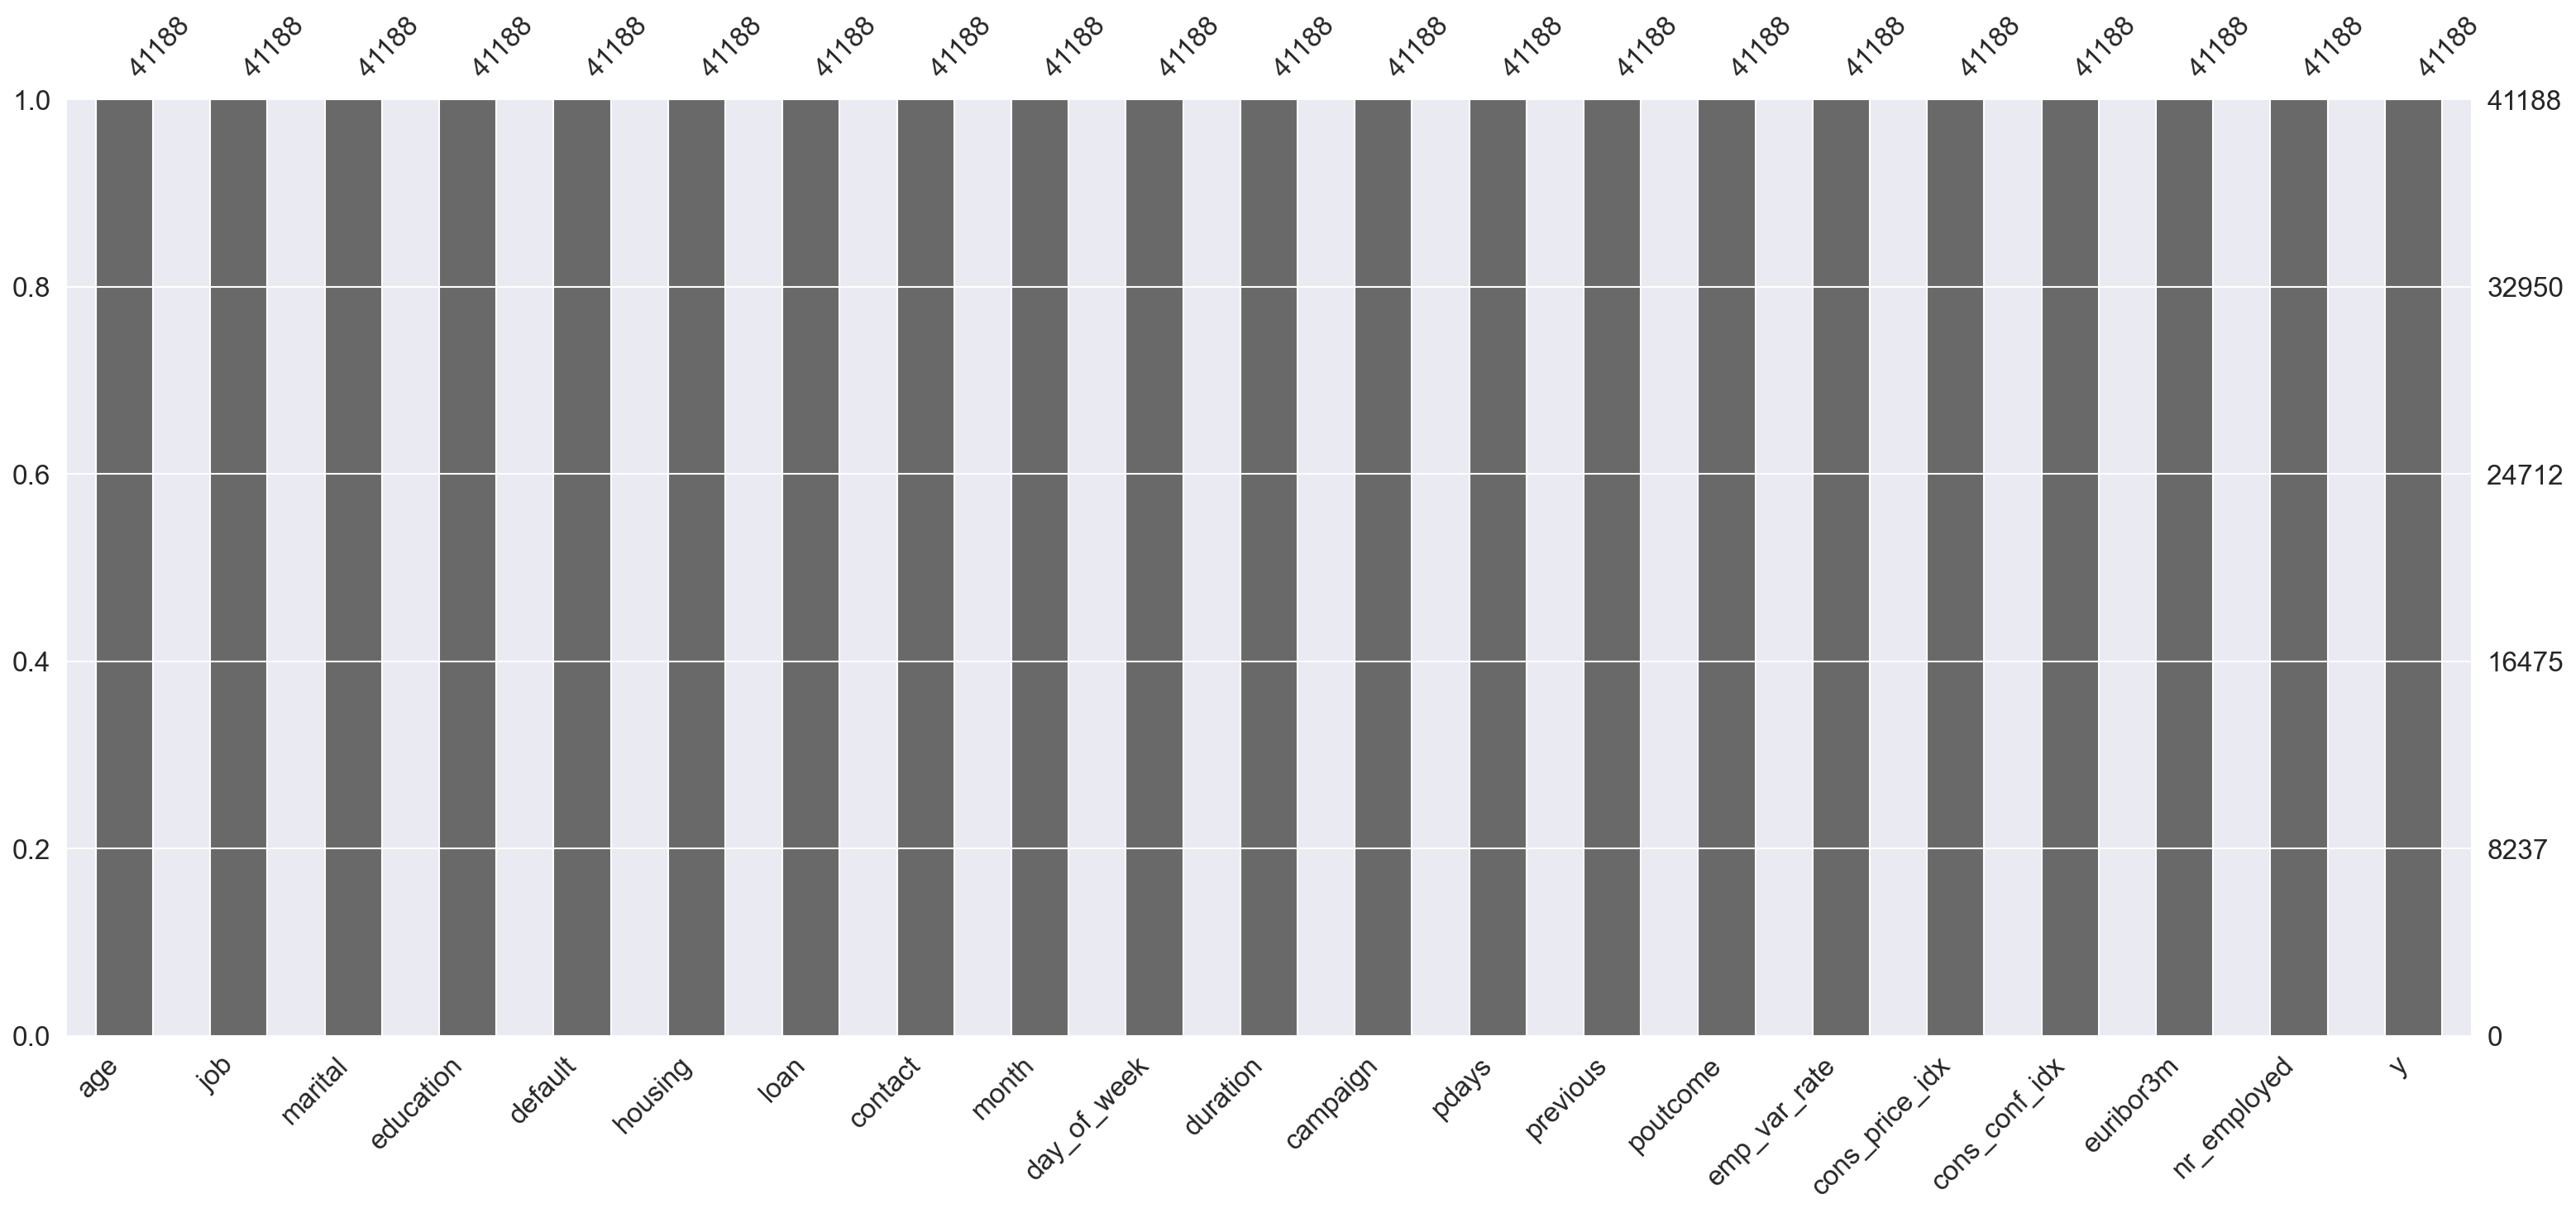

In [16]:
msno.bar(df)

**There is no missing data in the provided dataset**

Number of Numerical features: 10
Number of Categorical features: 11


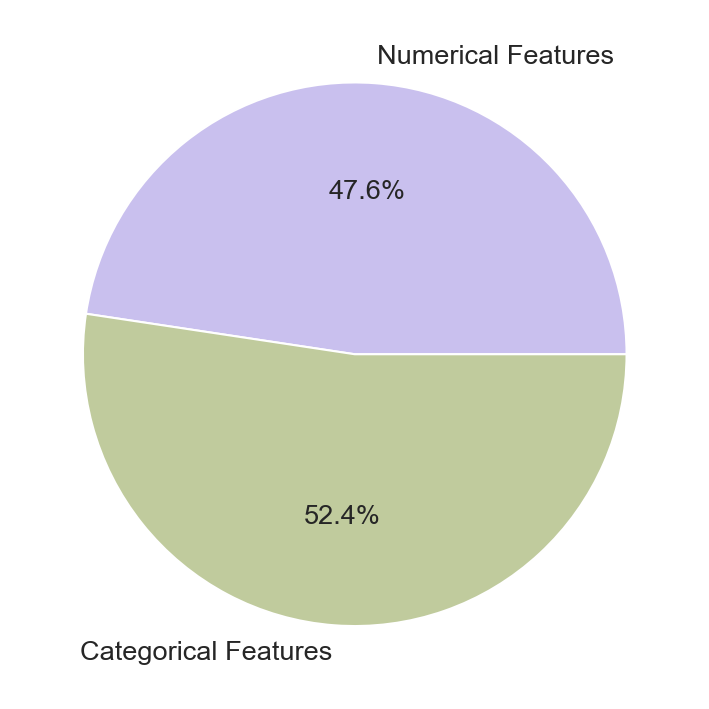

In [17]:
#calculate and plot the distribution of numerical and categorical features 

df_numerical = df.select_dtypes(exclude="object") 
df_categorical = df.select_dtypes(include="object")

print(f'Number of Numerical features: {len(df_numerical.columns)}')
print(f'Number of Categorical features: {len(df_categorical.columns)}')

plt.pie([len(df_numerical.columns), len(df_categorical.columns)], 
        labels=['Numerical Features', 'Categorical Features'],
        colors=['#C9C0EE', '#C0CB9D'],
        textprops={'fontsize': 13},
        autopct='%1.1f%%')
plt.show()

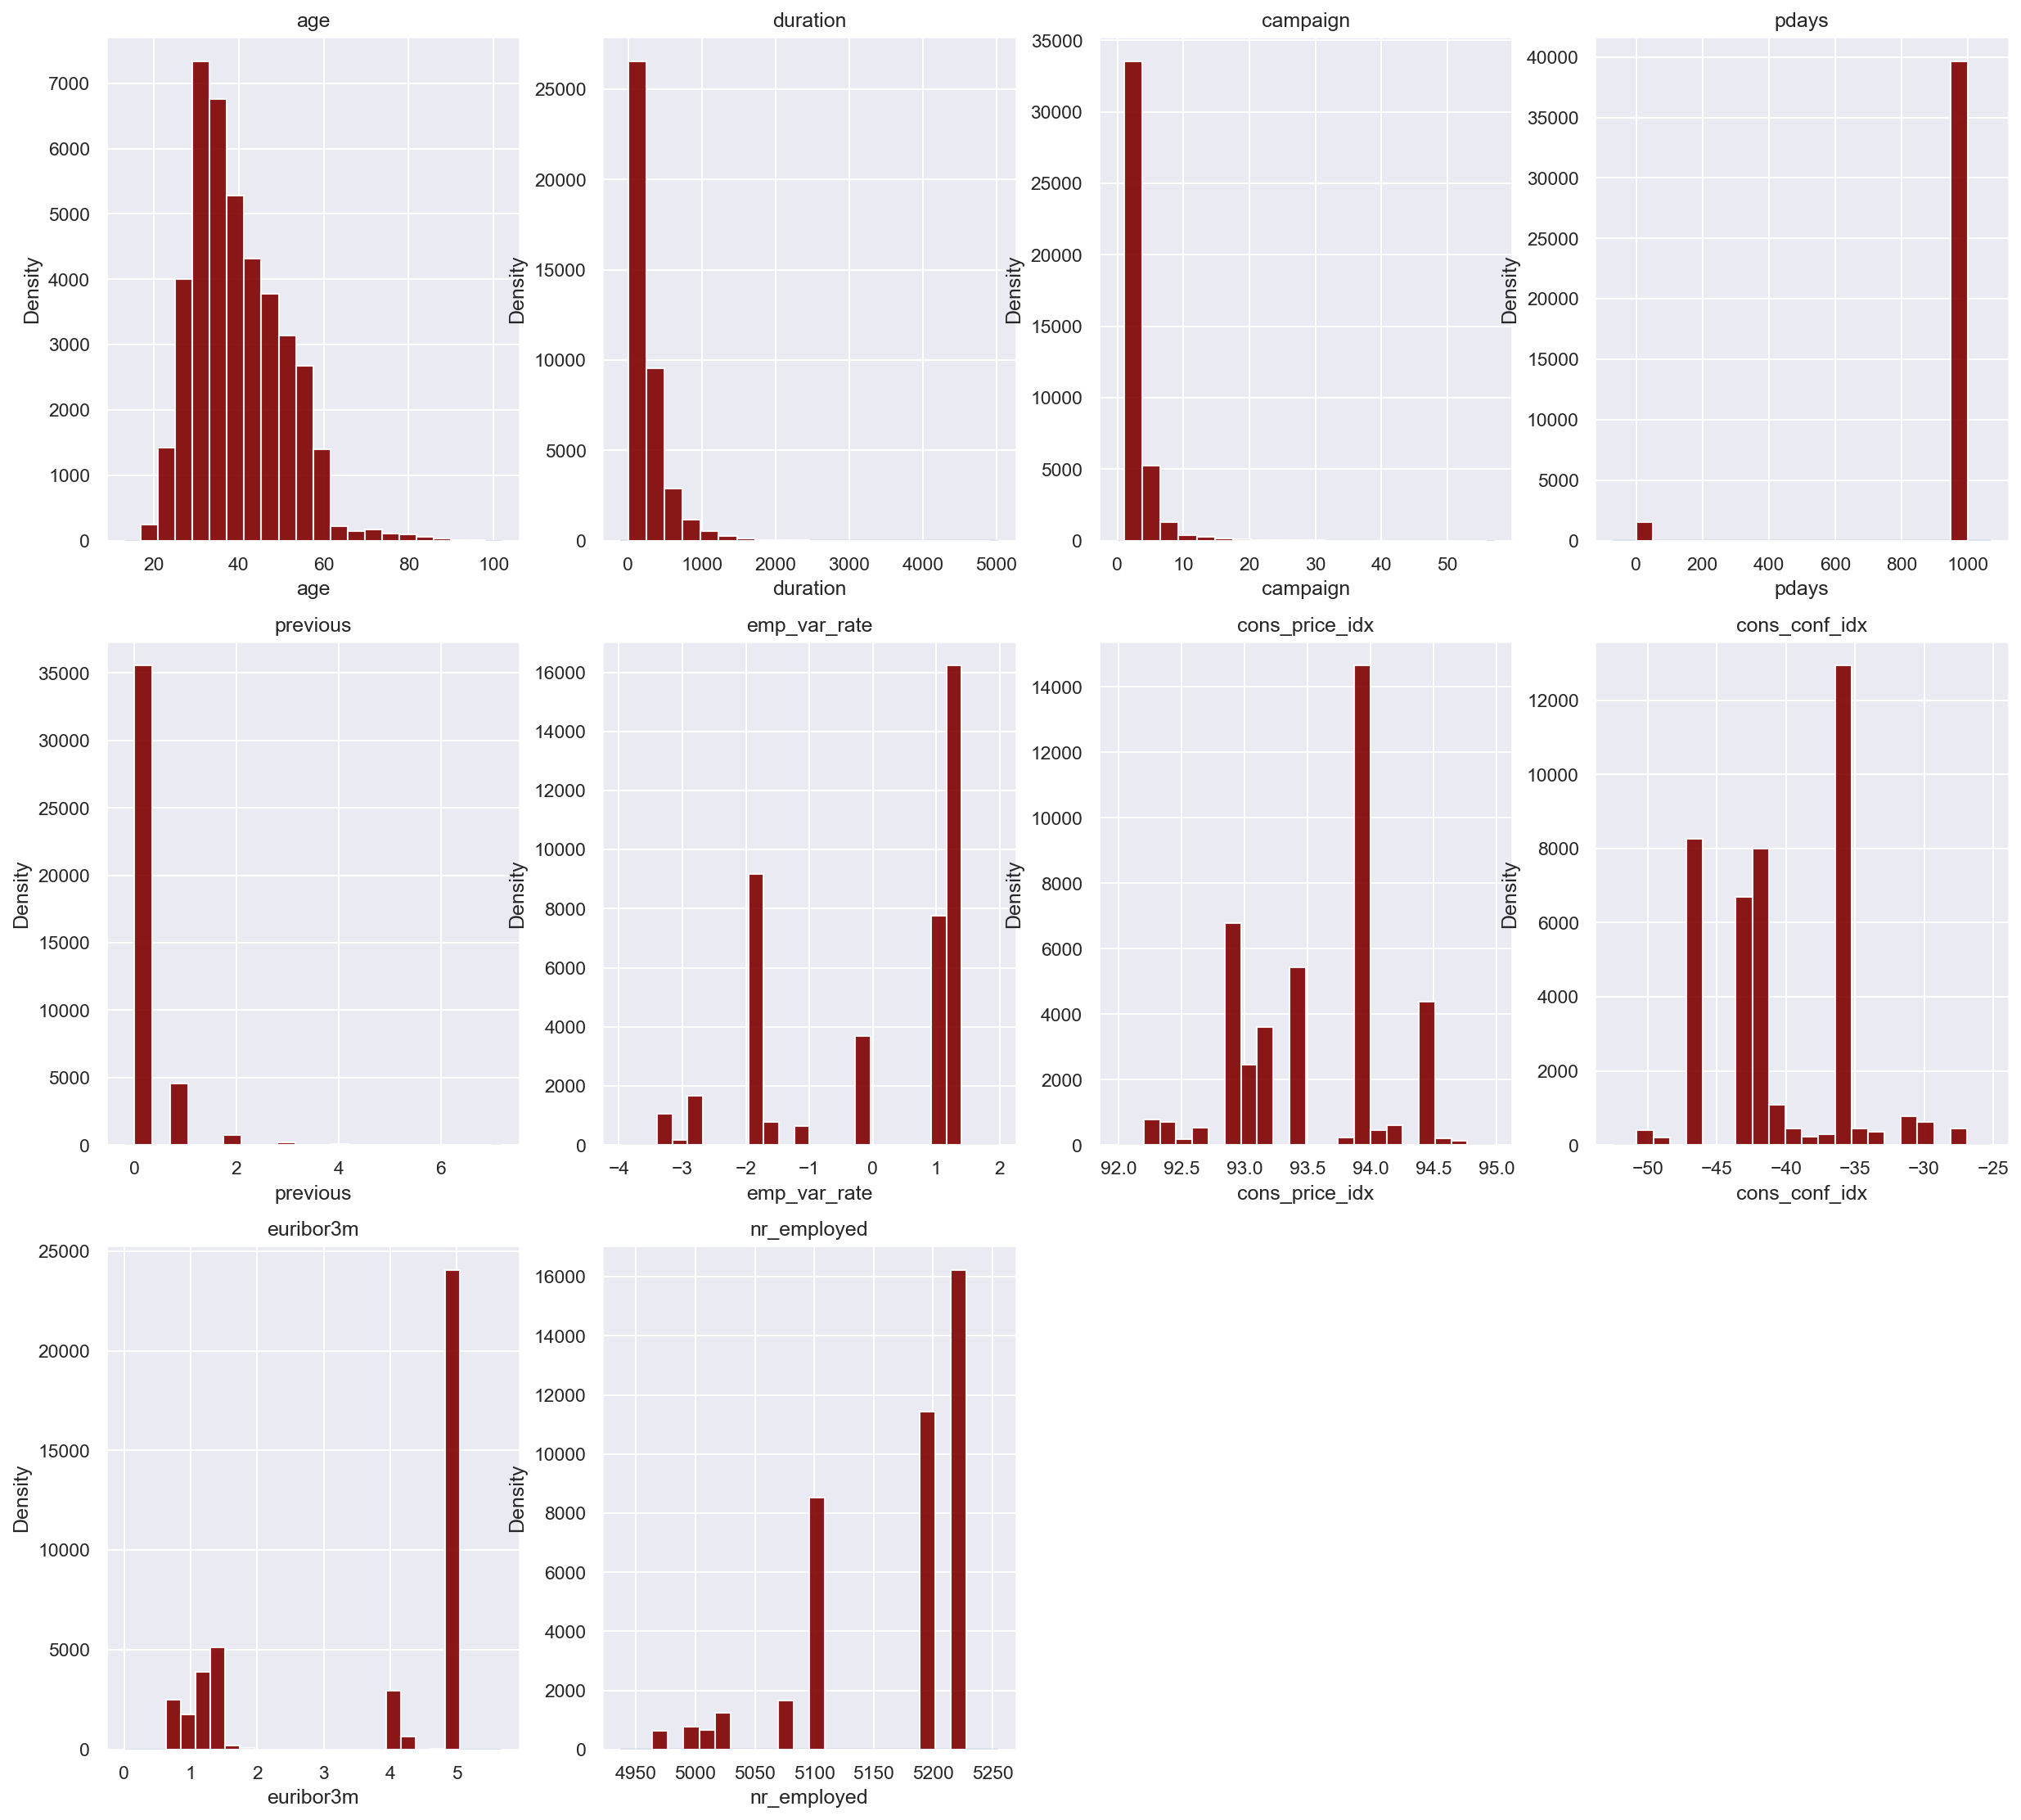

In [18]:
#Visualize distributions of dataset via histograms 

fig = plt.figure(figsize = (20, 25))
for idx, i in enumerate(df_numerical.columns):
    fig.add_subplot(4, 4, idx+1)
    sns.kdeplot(data = df_numerical.iloc[:, idx],
                fill = True)
    df_numerical.iloc[:, idx].hist(bins=20,color='maroon',alpha=0.9)
    plt.subplots_adjust(hspace=0.2)
    plt.title(i)
plt.show()

In [19]:
# a method to visualize class balance 

def class_balance (hexcolorA, hexcolorB, edgecolor):
    
       
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    target_cnt = df['y'].value_counts().sort_index()

    ax.bar(target_cnt.index, target_cnt, color=[hexcolorA if i%2==0 else hexcolorB for i in range(9)],
       width=0.30, 
       edgecolor=edgecolor, 
       linewidth=0.5)

    ax.margins(0.02, 0.05)

    for i in range(2):
        ax.annotate(f'{target_cnt[i]/len(df)*100:.3}', xy=(i, target_cnt[i]+1000),
                   va='center', ha='center',
               )

    ax.set_title('Target Variable Distribution', weight='bold', fontsize=15)
    ax.grid(axis='y', linestyle='-', alpha=0.4)

    fig.tight_layout()
    plt.show()
    return

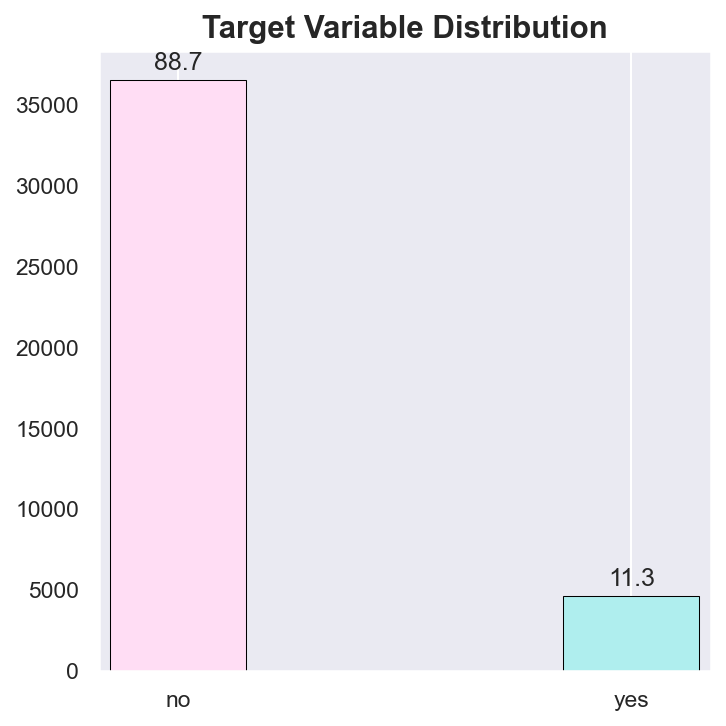

In [20]:
class_balance('#FFDDF4', '#AFEEEE', 'black')

#### Class Imbalance:
**We can see from the plot above that there is a class imbalance in the output variable 'no' accounts for 88.7% of the whole and a 'yes' is about 11.3%. The number of negative class is roughly 8 times the number of positive class. Some univariate analysis will be necessary to check whether we can take each feature and see whether it can help us in delineating the classes better. We have to figure out whether there is a specific category of customers that enrolls for term deposit more than others.**

In [21]:
def feature_countplot(label, dataset):
  plt.figure(figsize=(15,10))
  Y = df[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=df)
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put  ticks  
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabels  
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
   
  plt.show()

In [22]:
def feature_countplot_labelled(label, dataset):
  plt.figure(figsize=(20,10))
  Y = df[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=df, hue="y")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put ticks 
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust ticklabels  
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

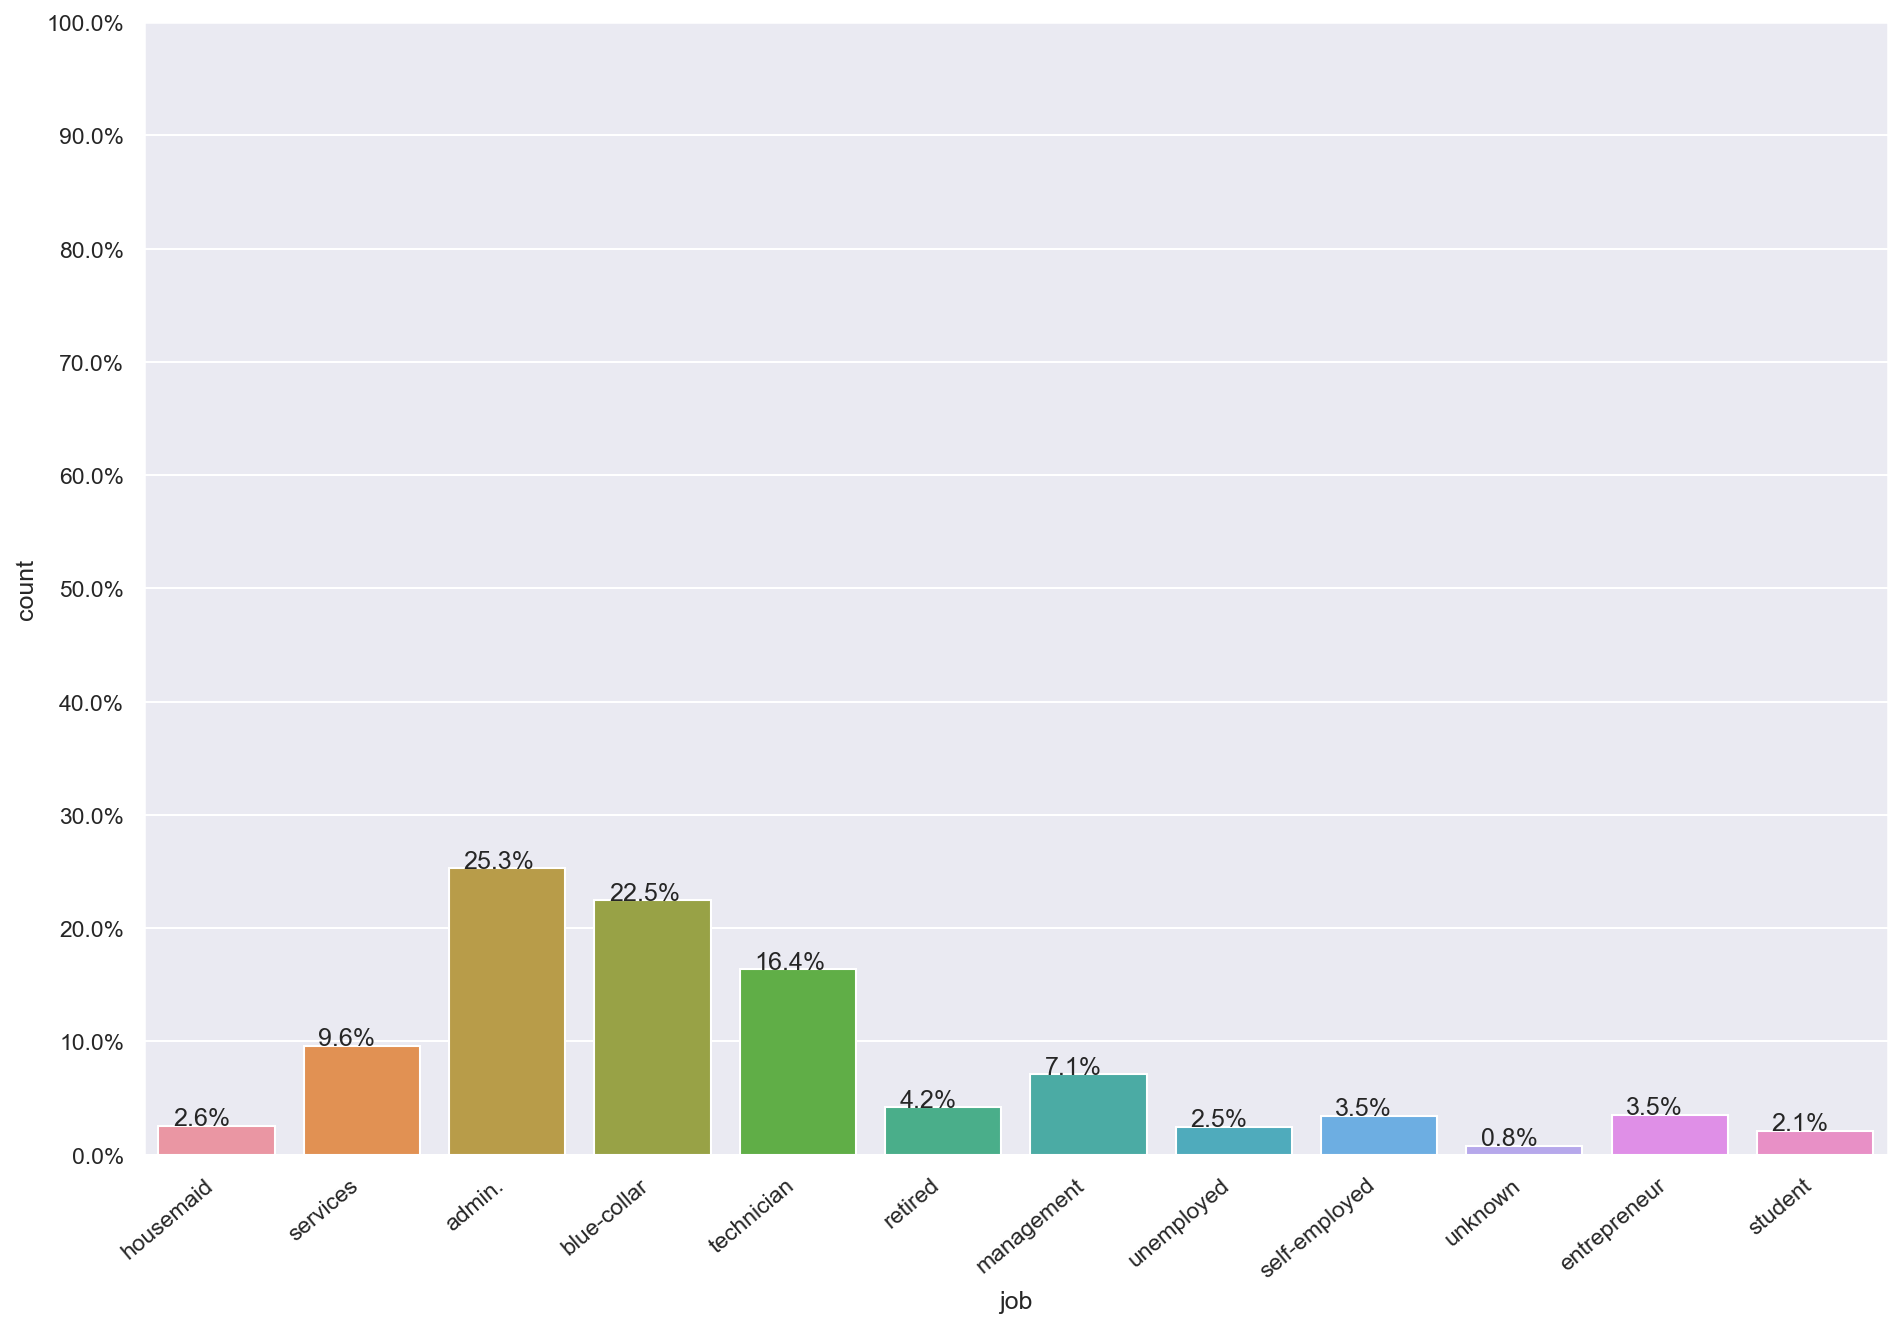

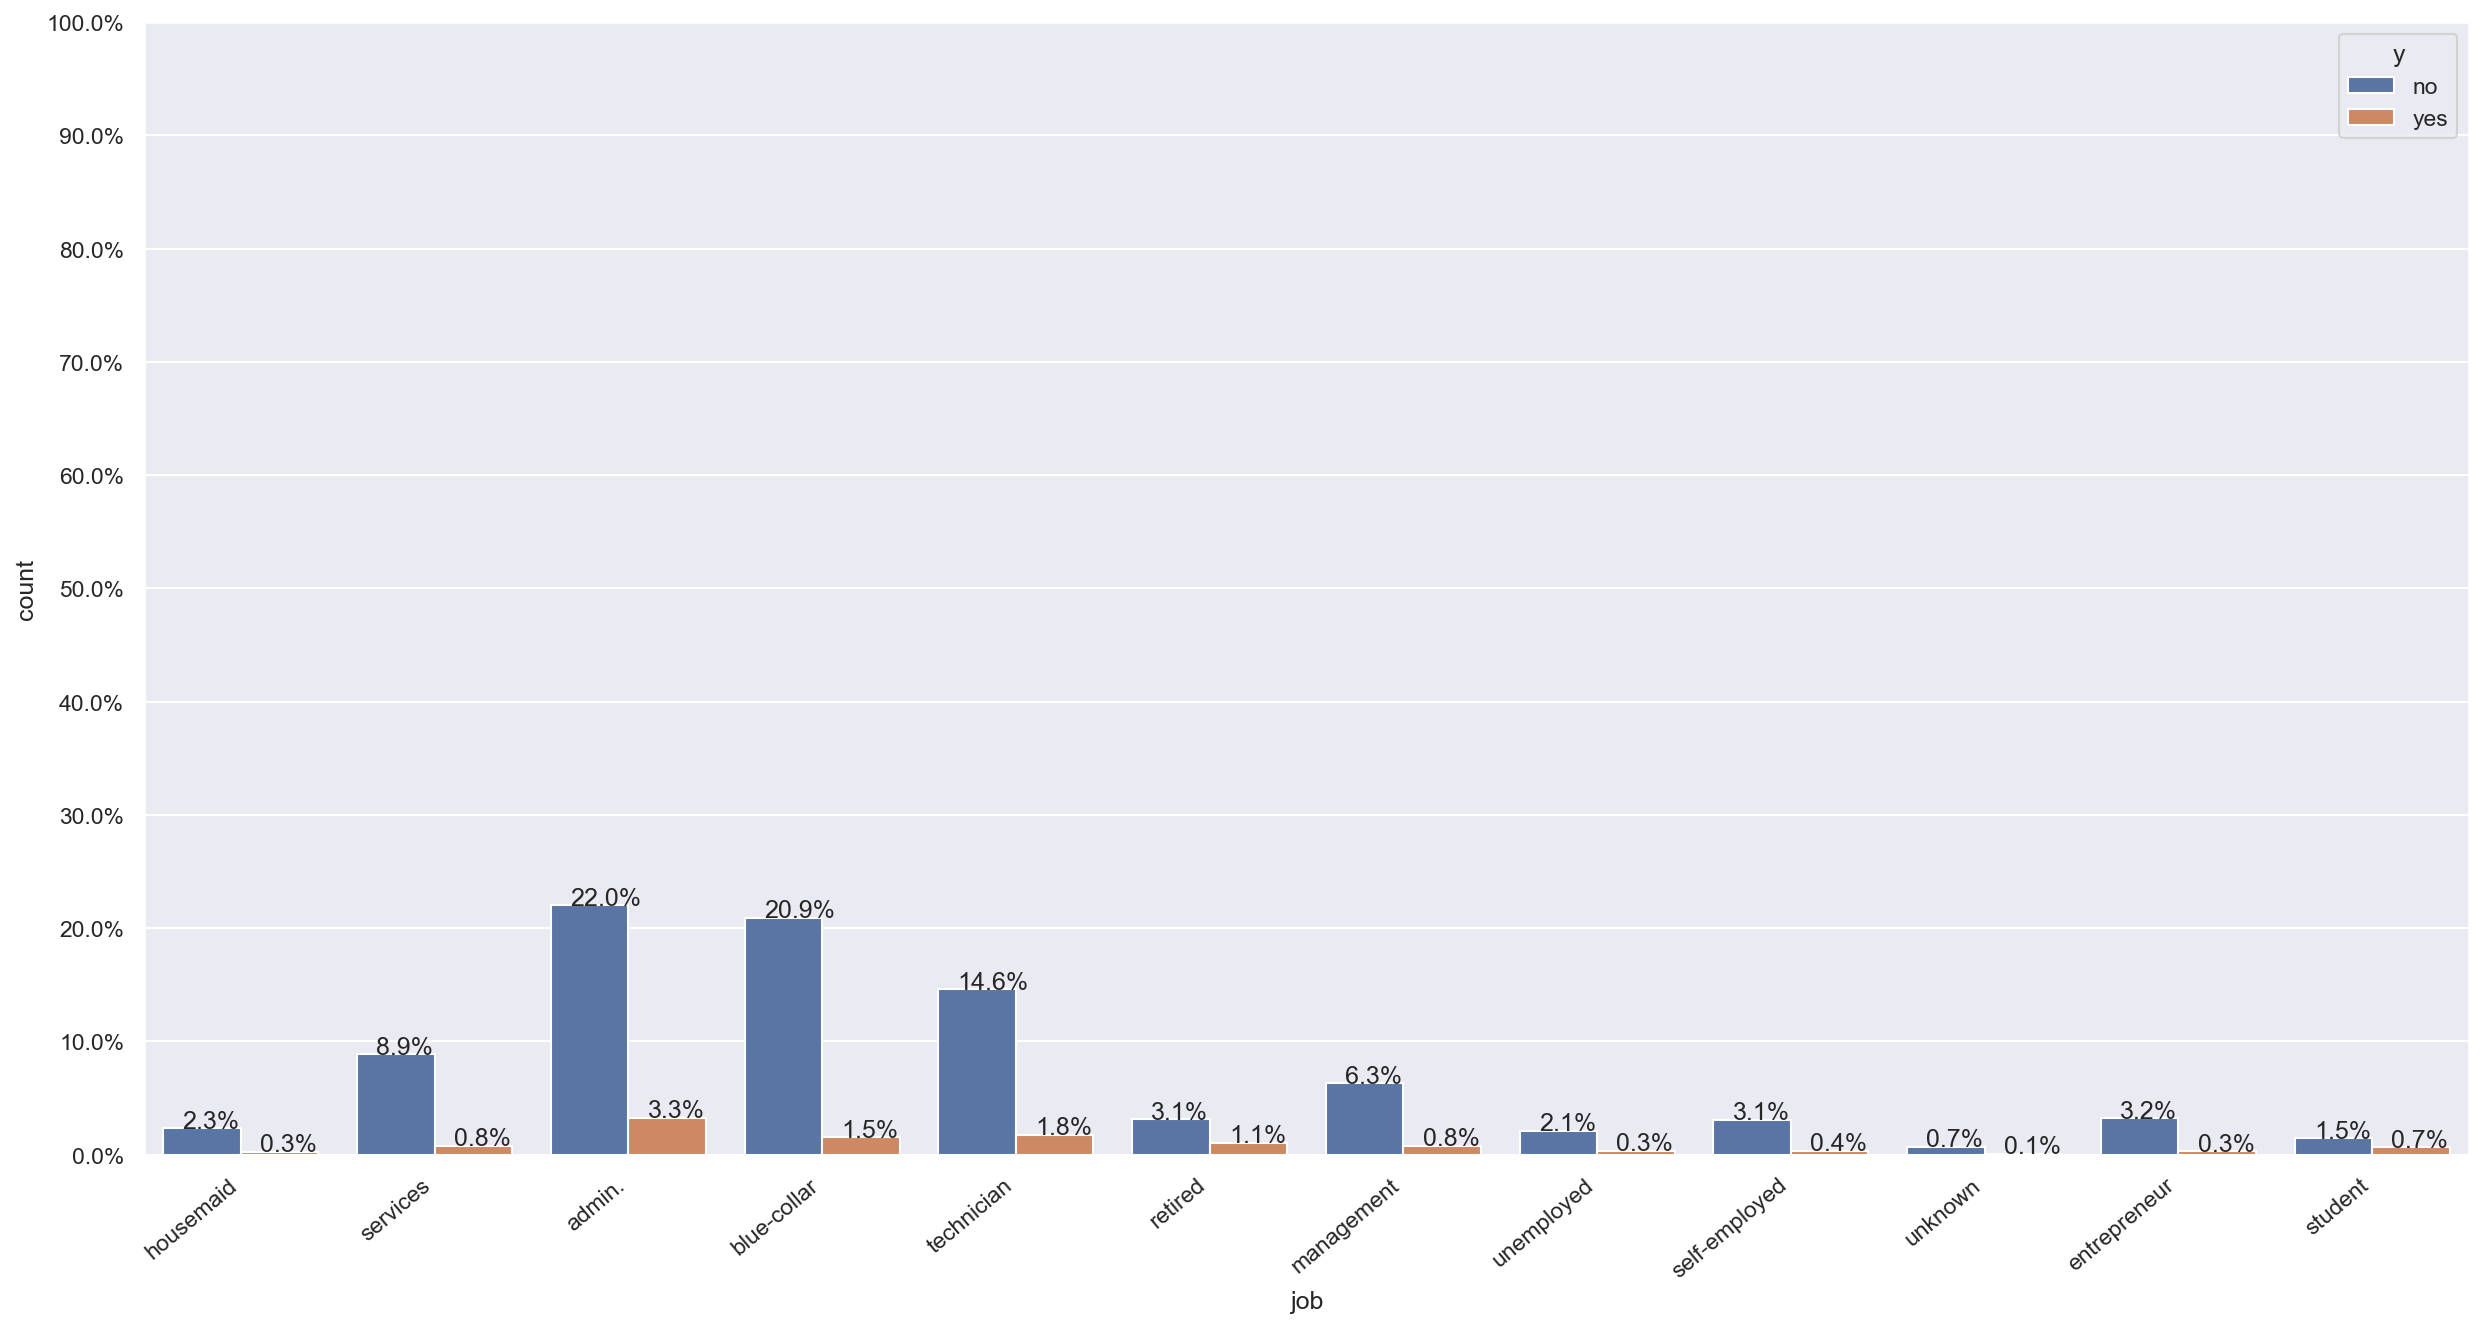

In [23]:
feature_countplot("job", df)
feature_countplot_labelled("job", df)

**The top three jobs profiles for customers are "admin", "blue-collar" or "technician". Customers who with ‘admin’ job profiles have the highest rate of term deposits as well as highest rates for non-subscription. This may be simply because there are more number of admin job profiles. Very hard to figure out a correlation between job and target variable.**

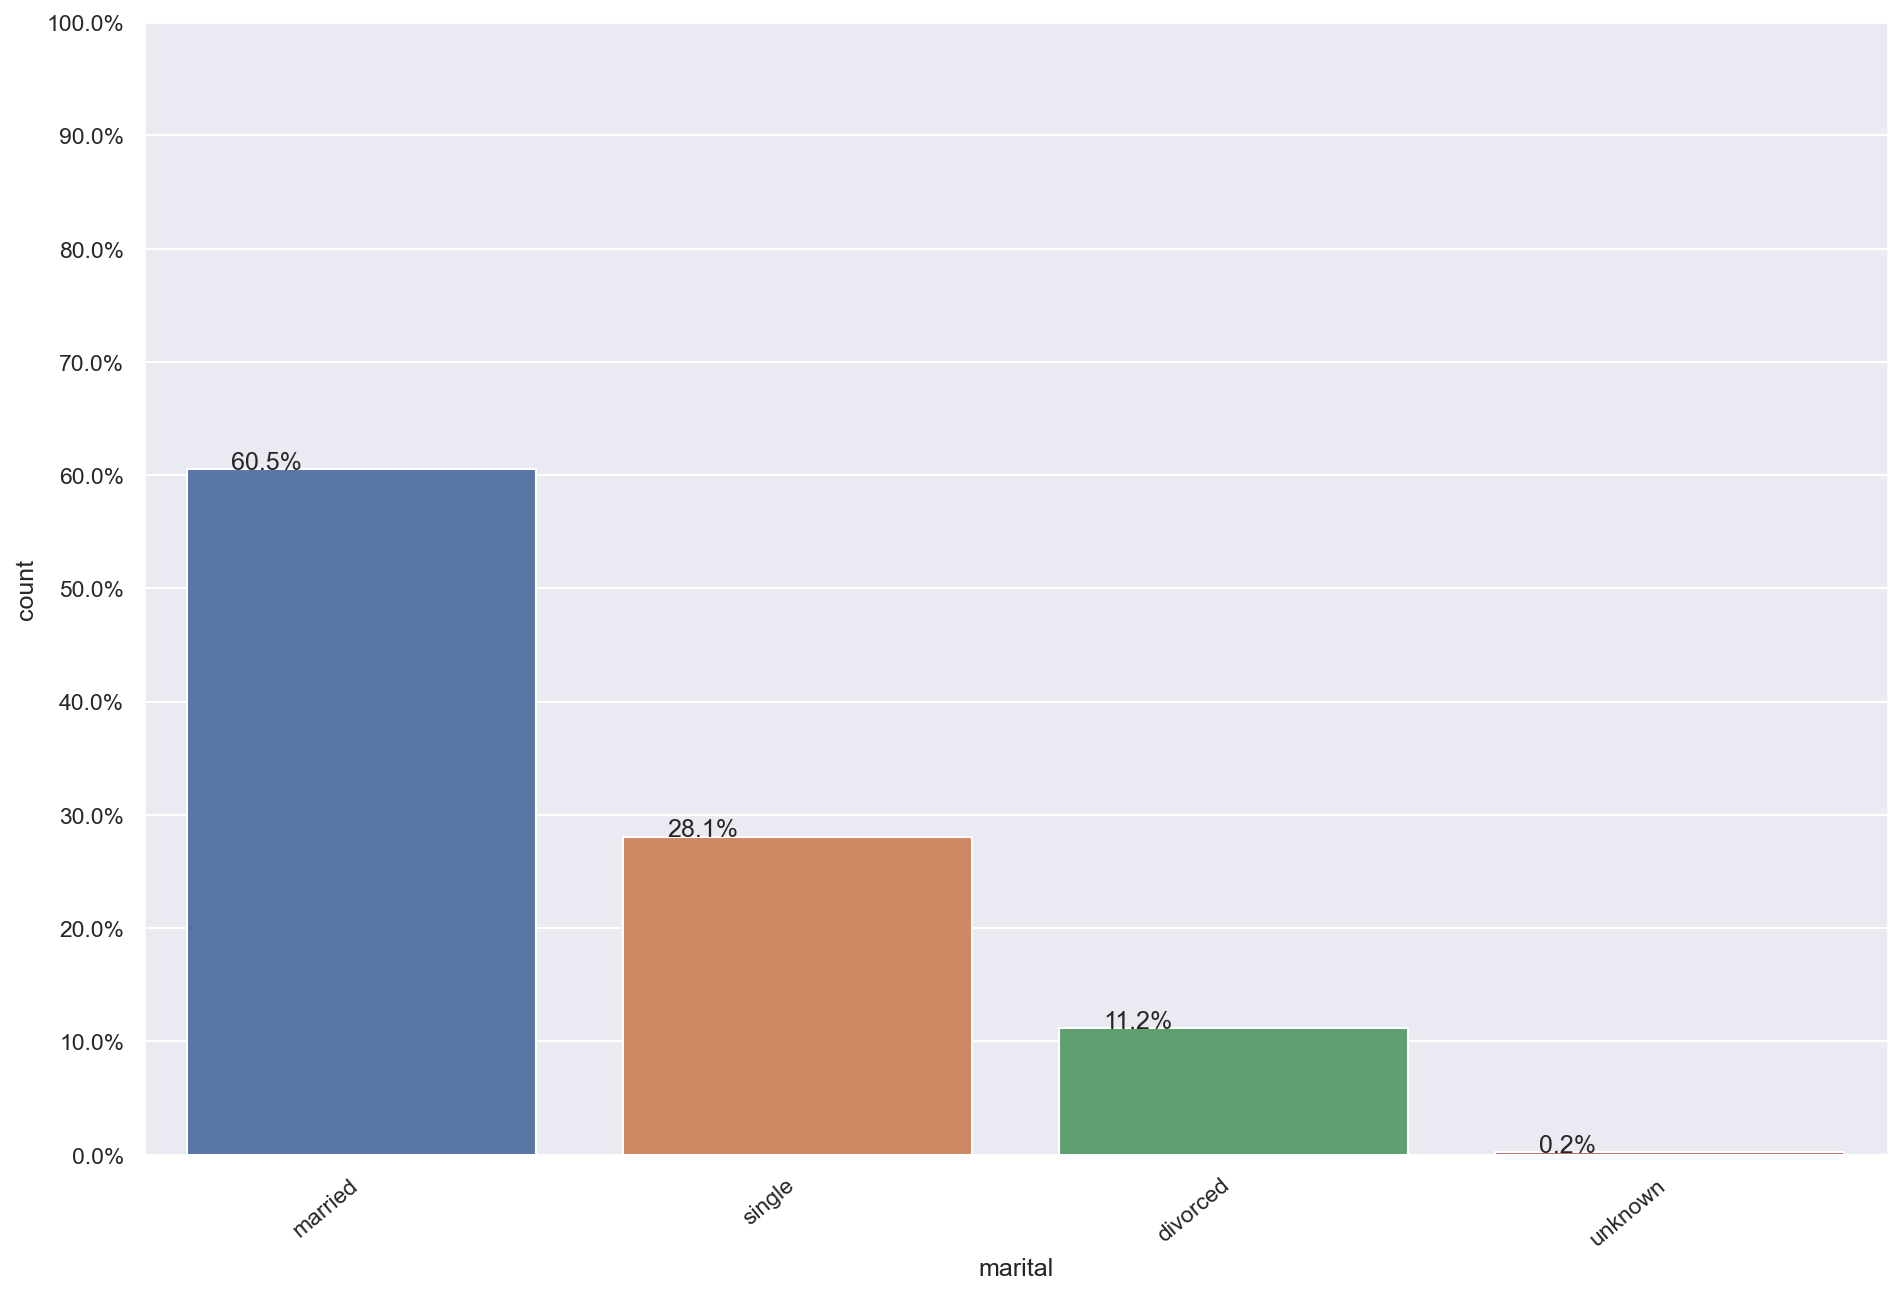

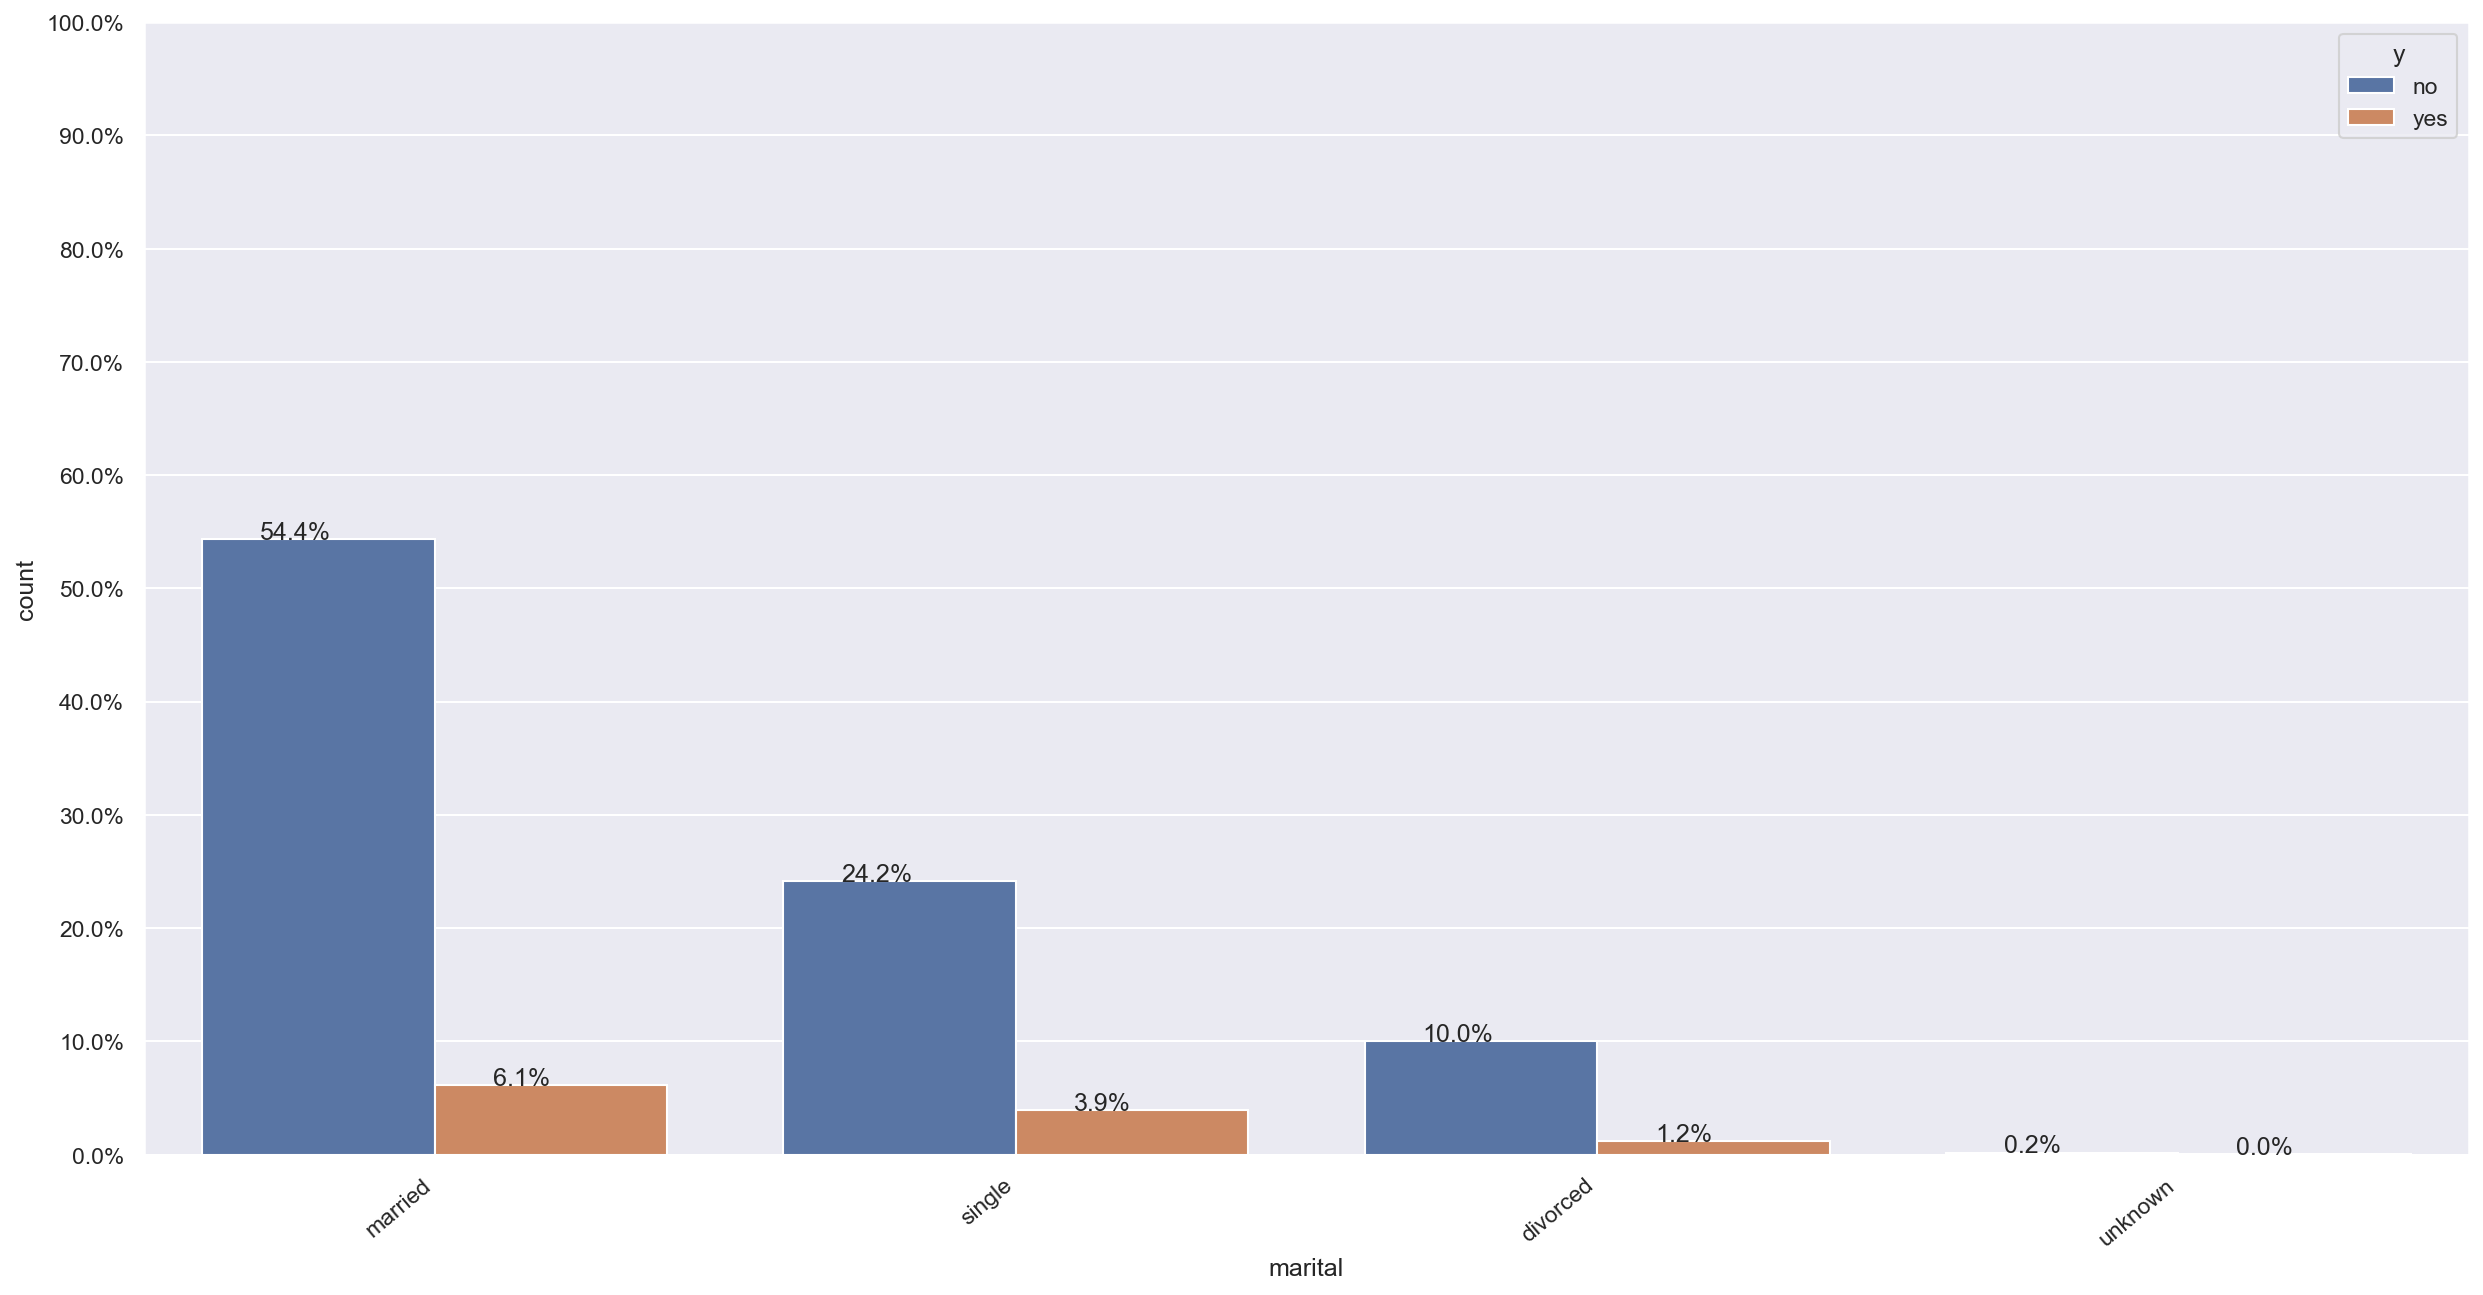

In [24]:
feature_countplot("marital", df)
feature_countplot_labelled("marital", df)

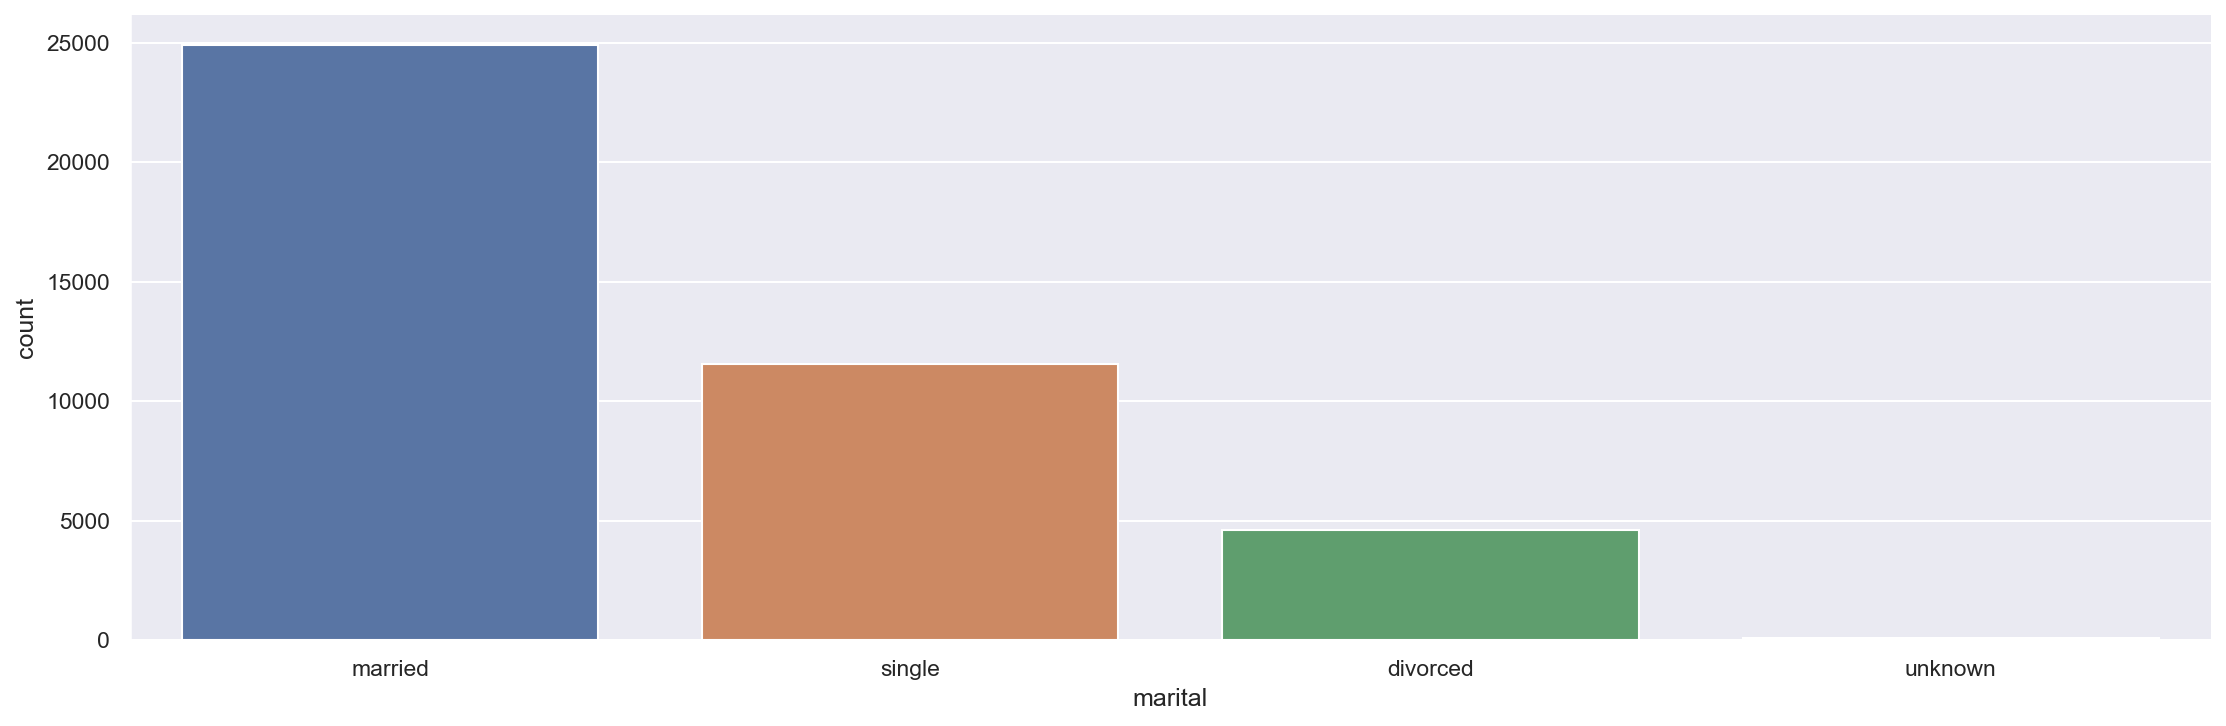

In [25]:
sns.catplot('marital',kind = 'count',data = df,aspect =3)

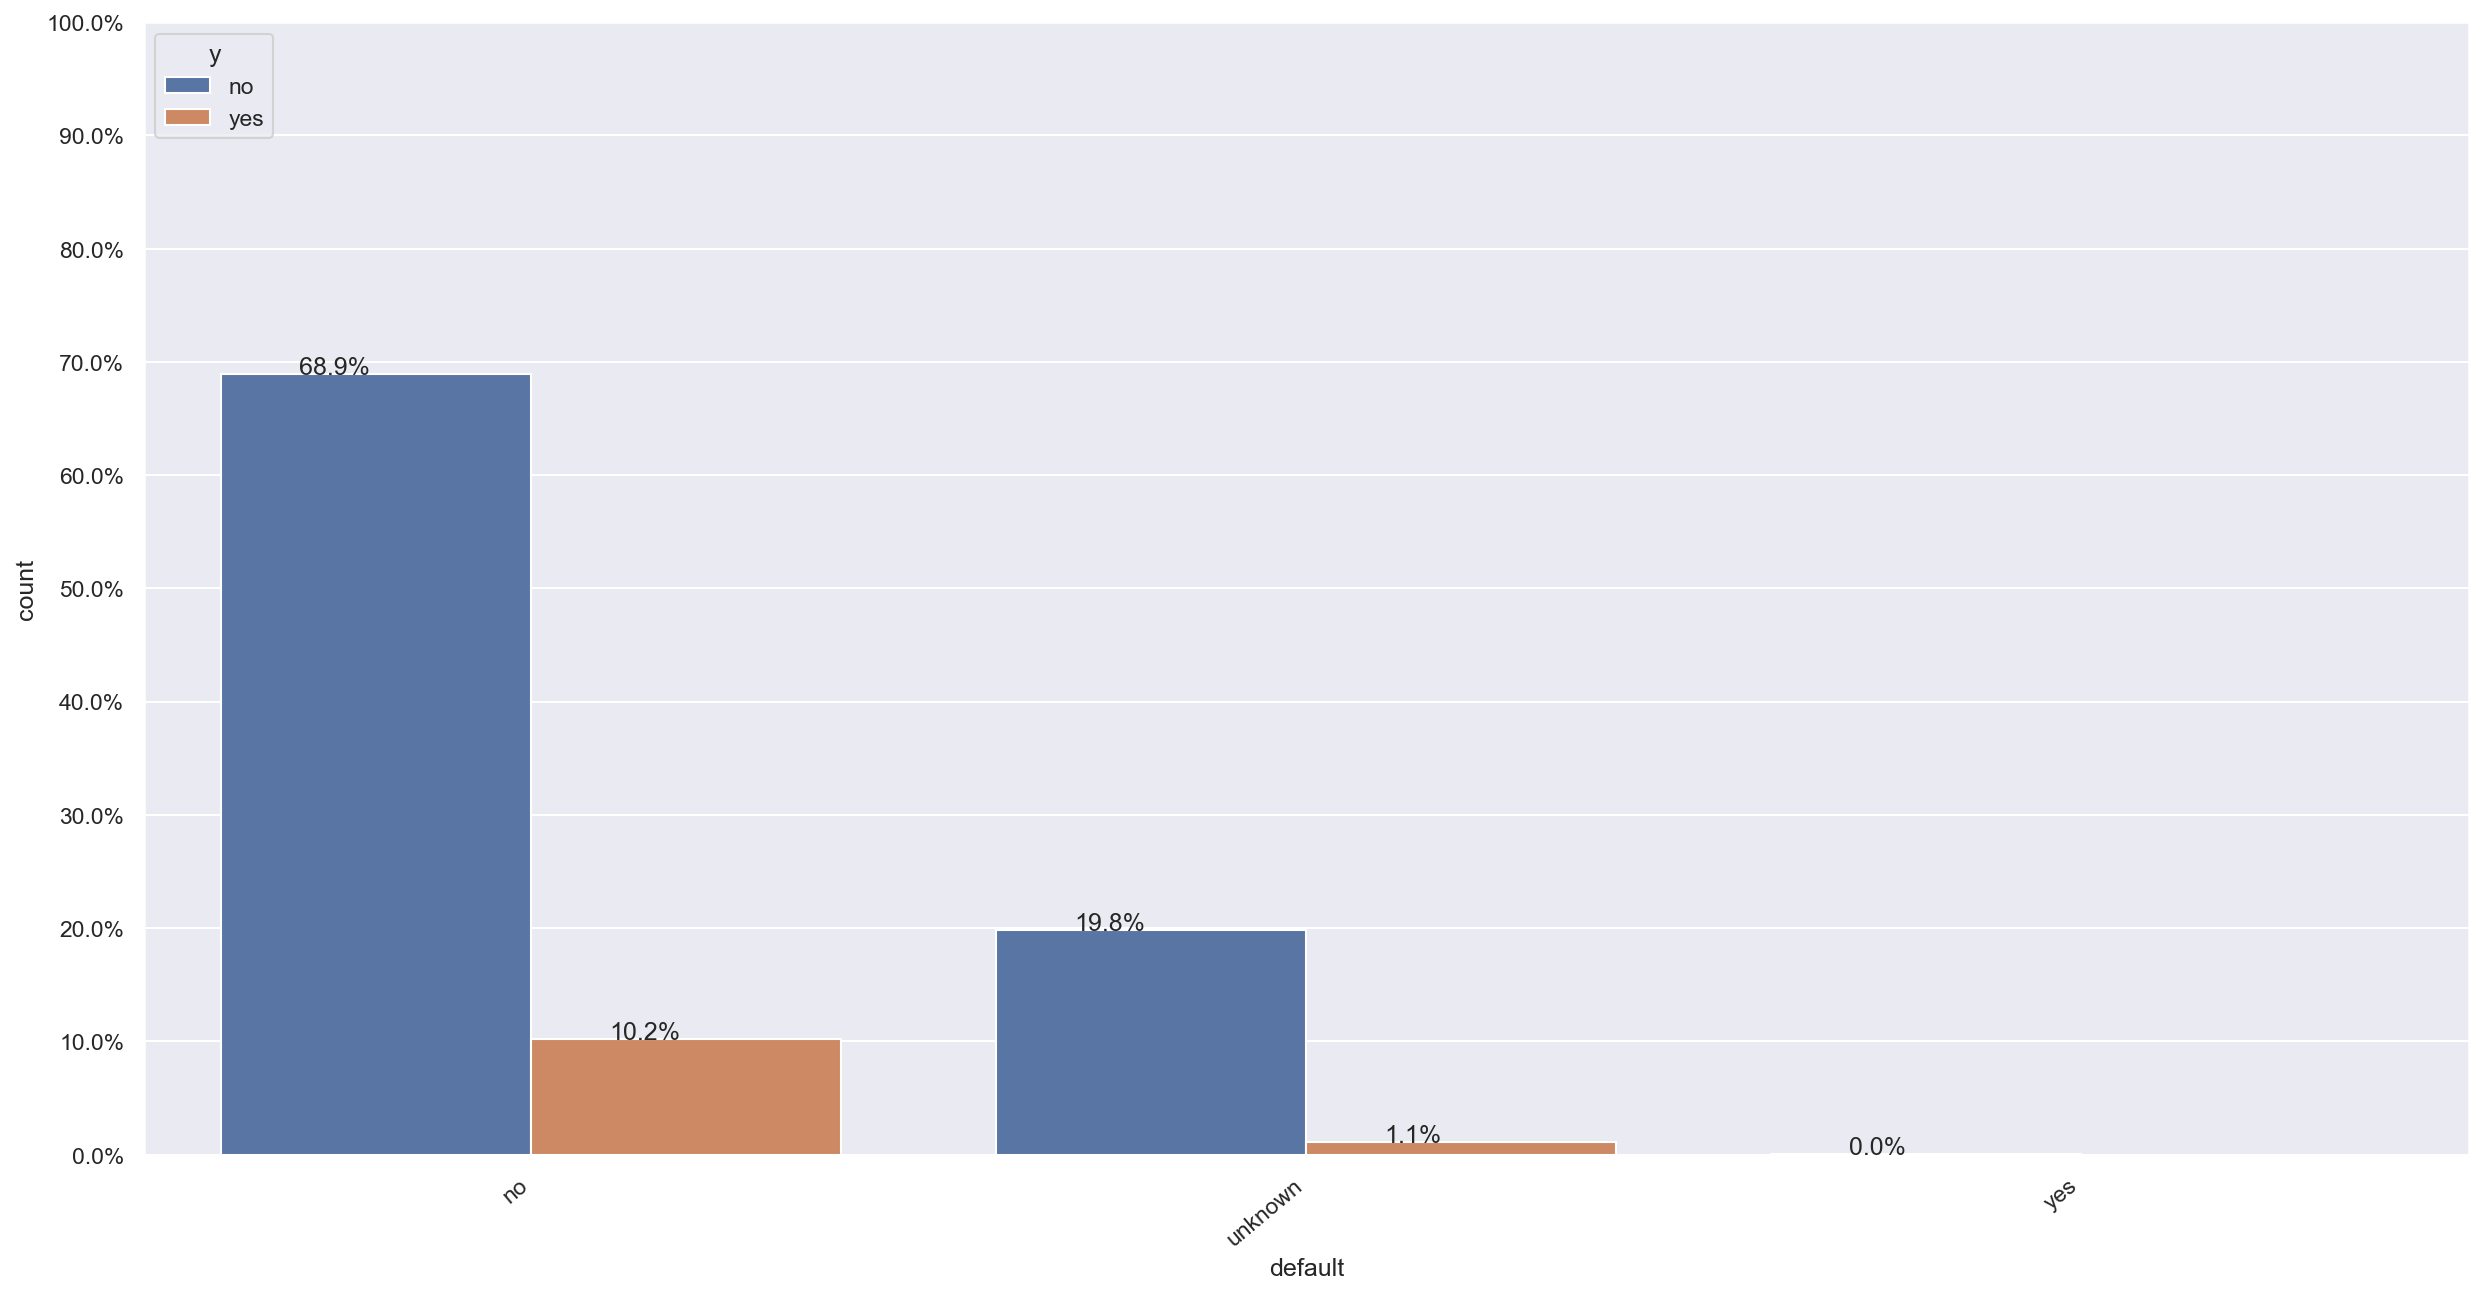

In [26]:
feature_countplot_labelled("default", df)

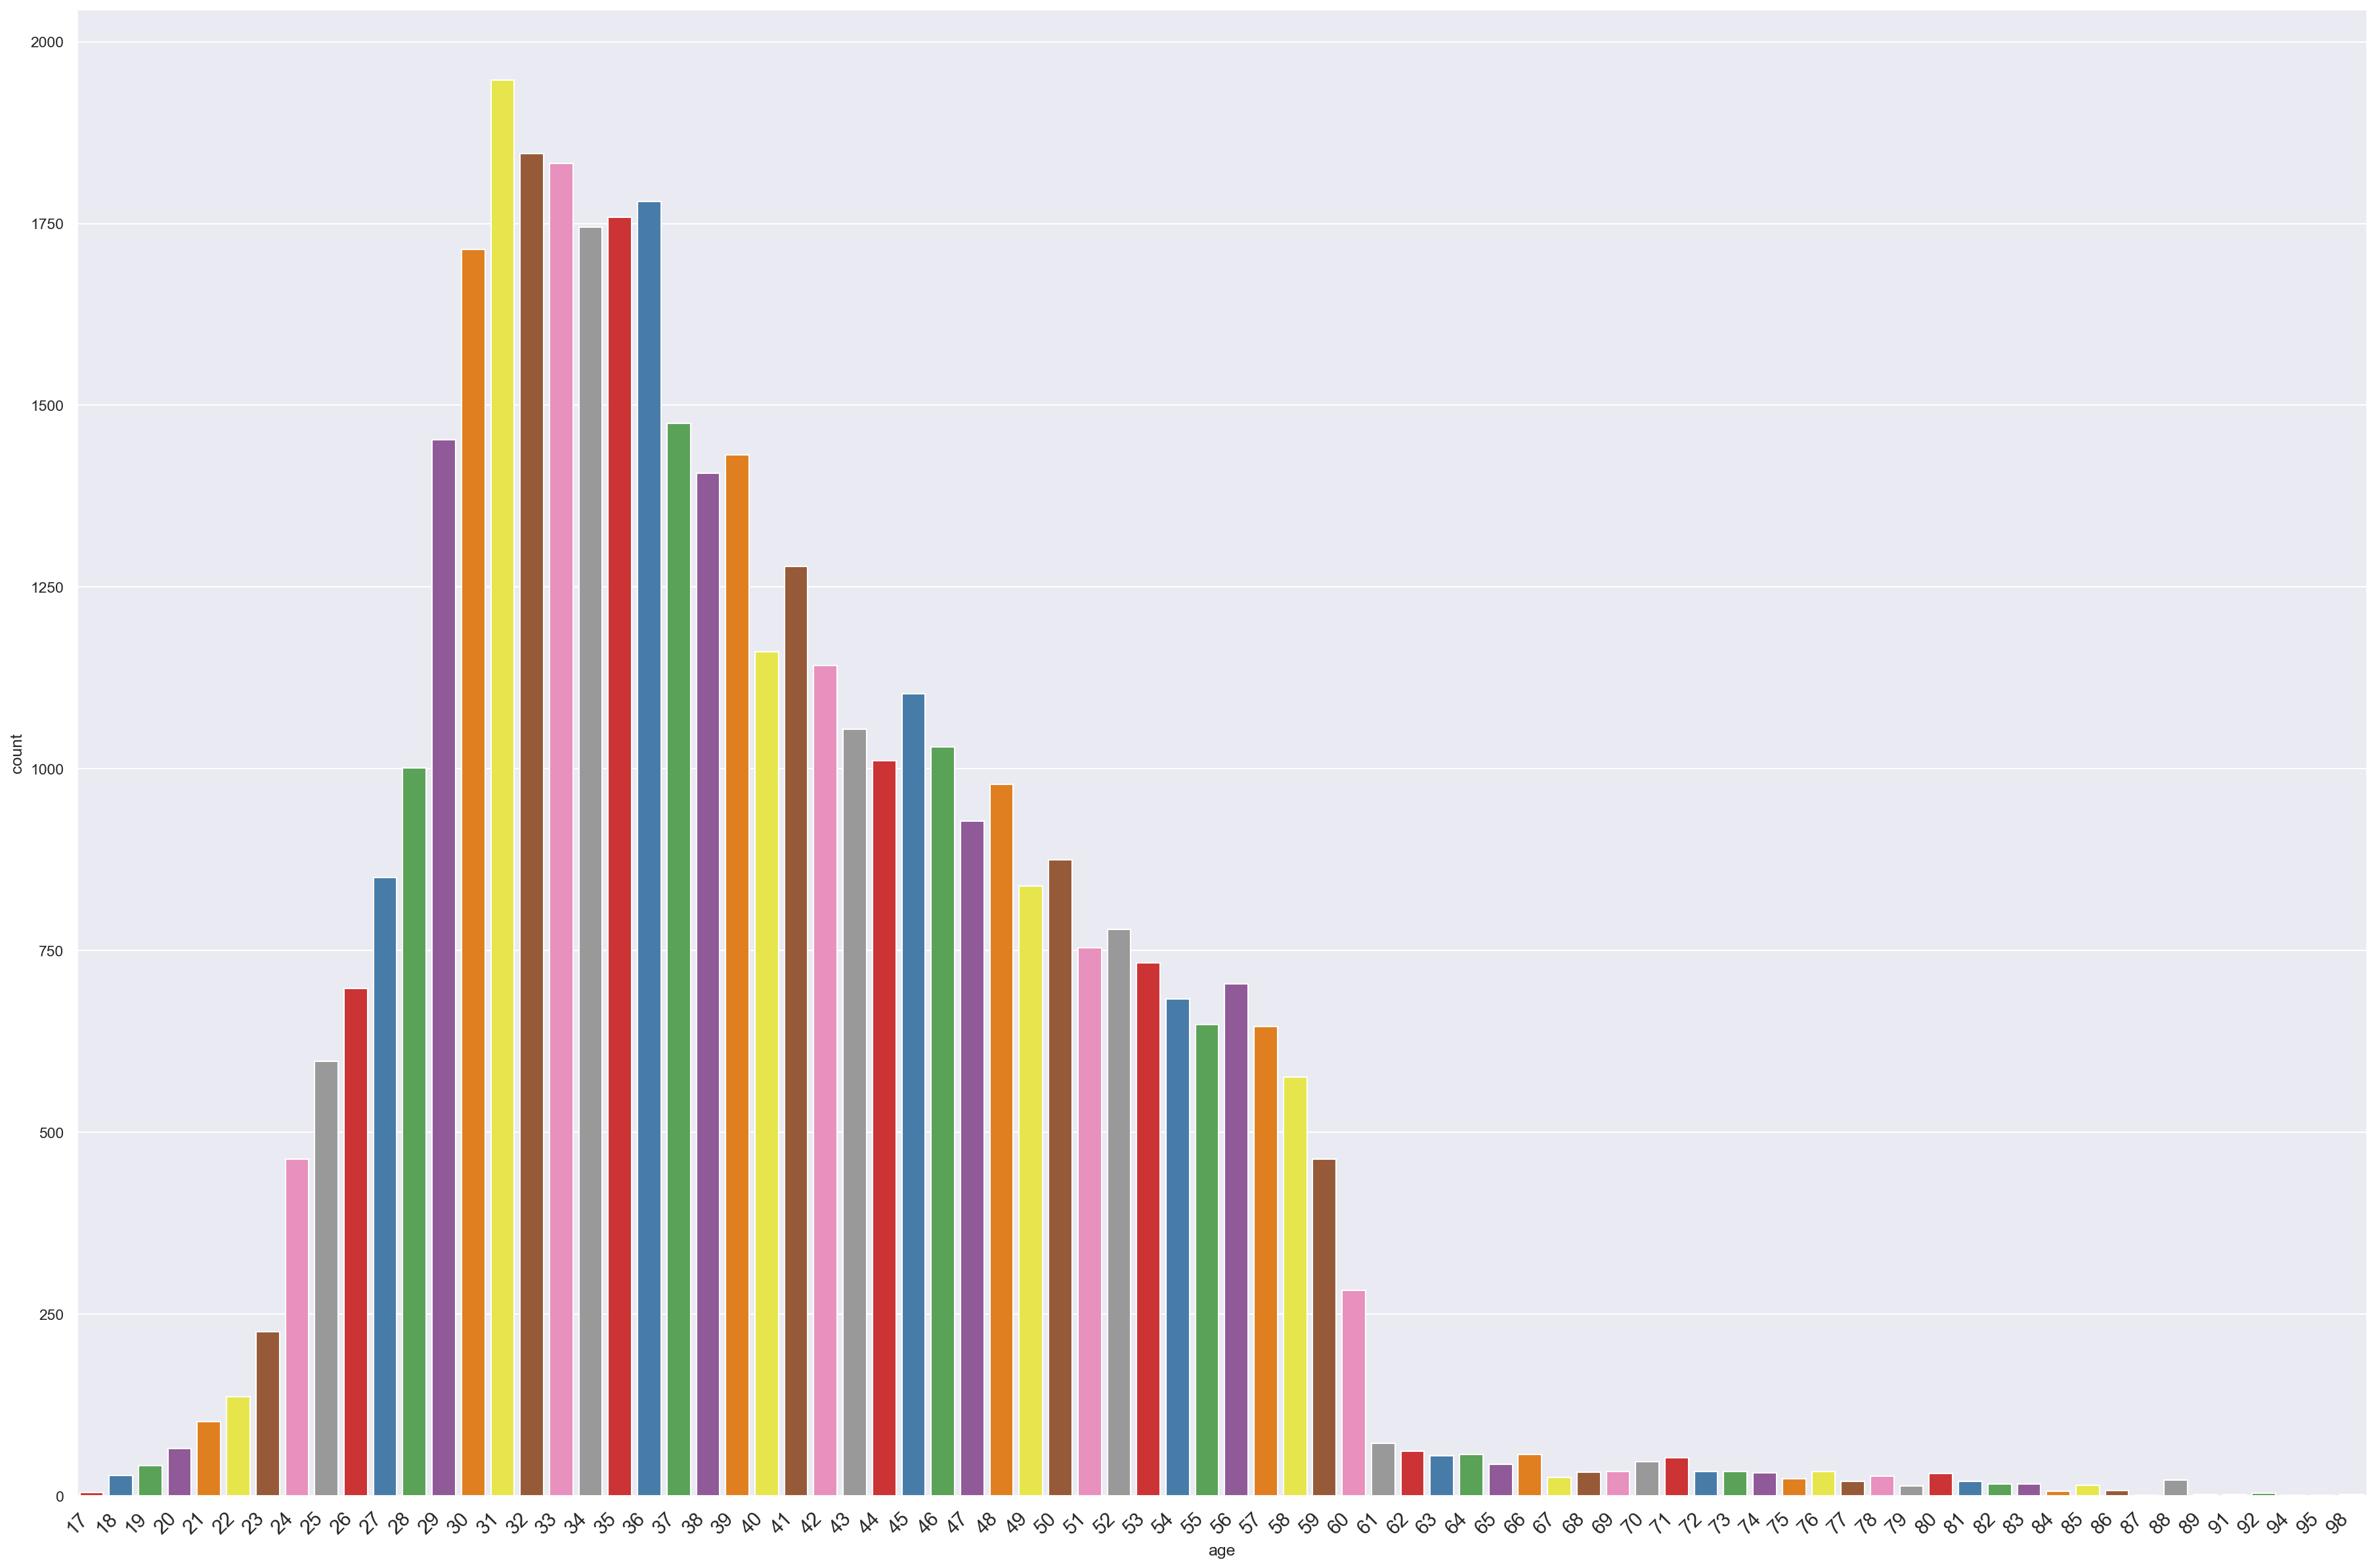

In [27]:
#Age distribution of the customers 

#sns.countplot(x = 'age', data = df)
#rotate axis labels 

plt.figure(figsize=(30,20))

chart = sns.countplot(
    data=df,
    x='age',
    palette='Set1'
)

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light', fontsize='large')

#hide label object values
None

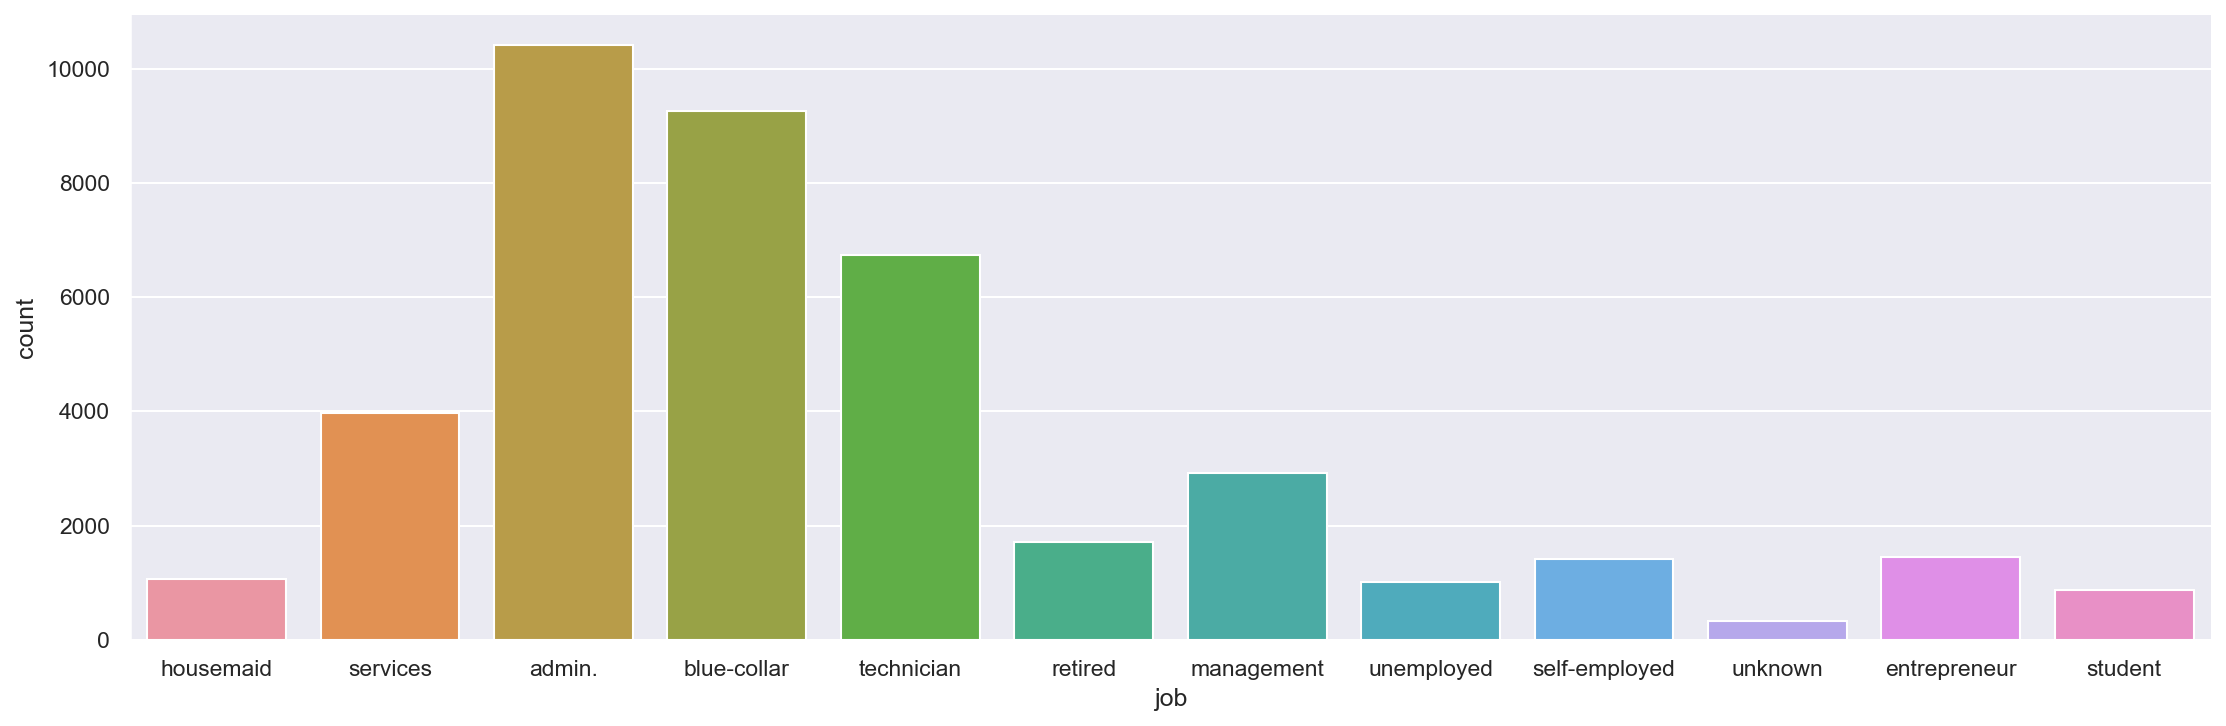

In [28]:
sns.catplot('job',kind = 'count',data = df,aspect =3)

**Married, single and divorced categories make up the top three categories of customers and bulk of them have an age range in between 24-60. We can also see that majority of the customers do not have credit in default. **

<AxesSubplot:>

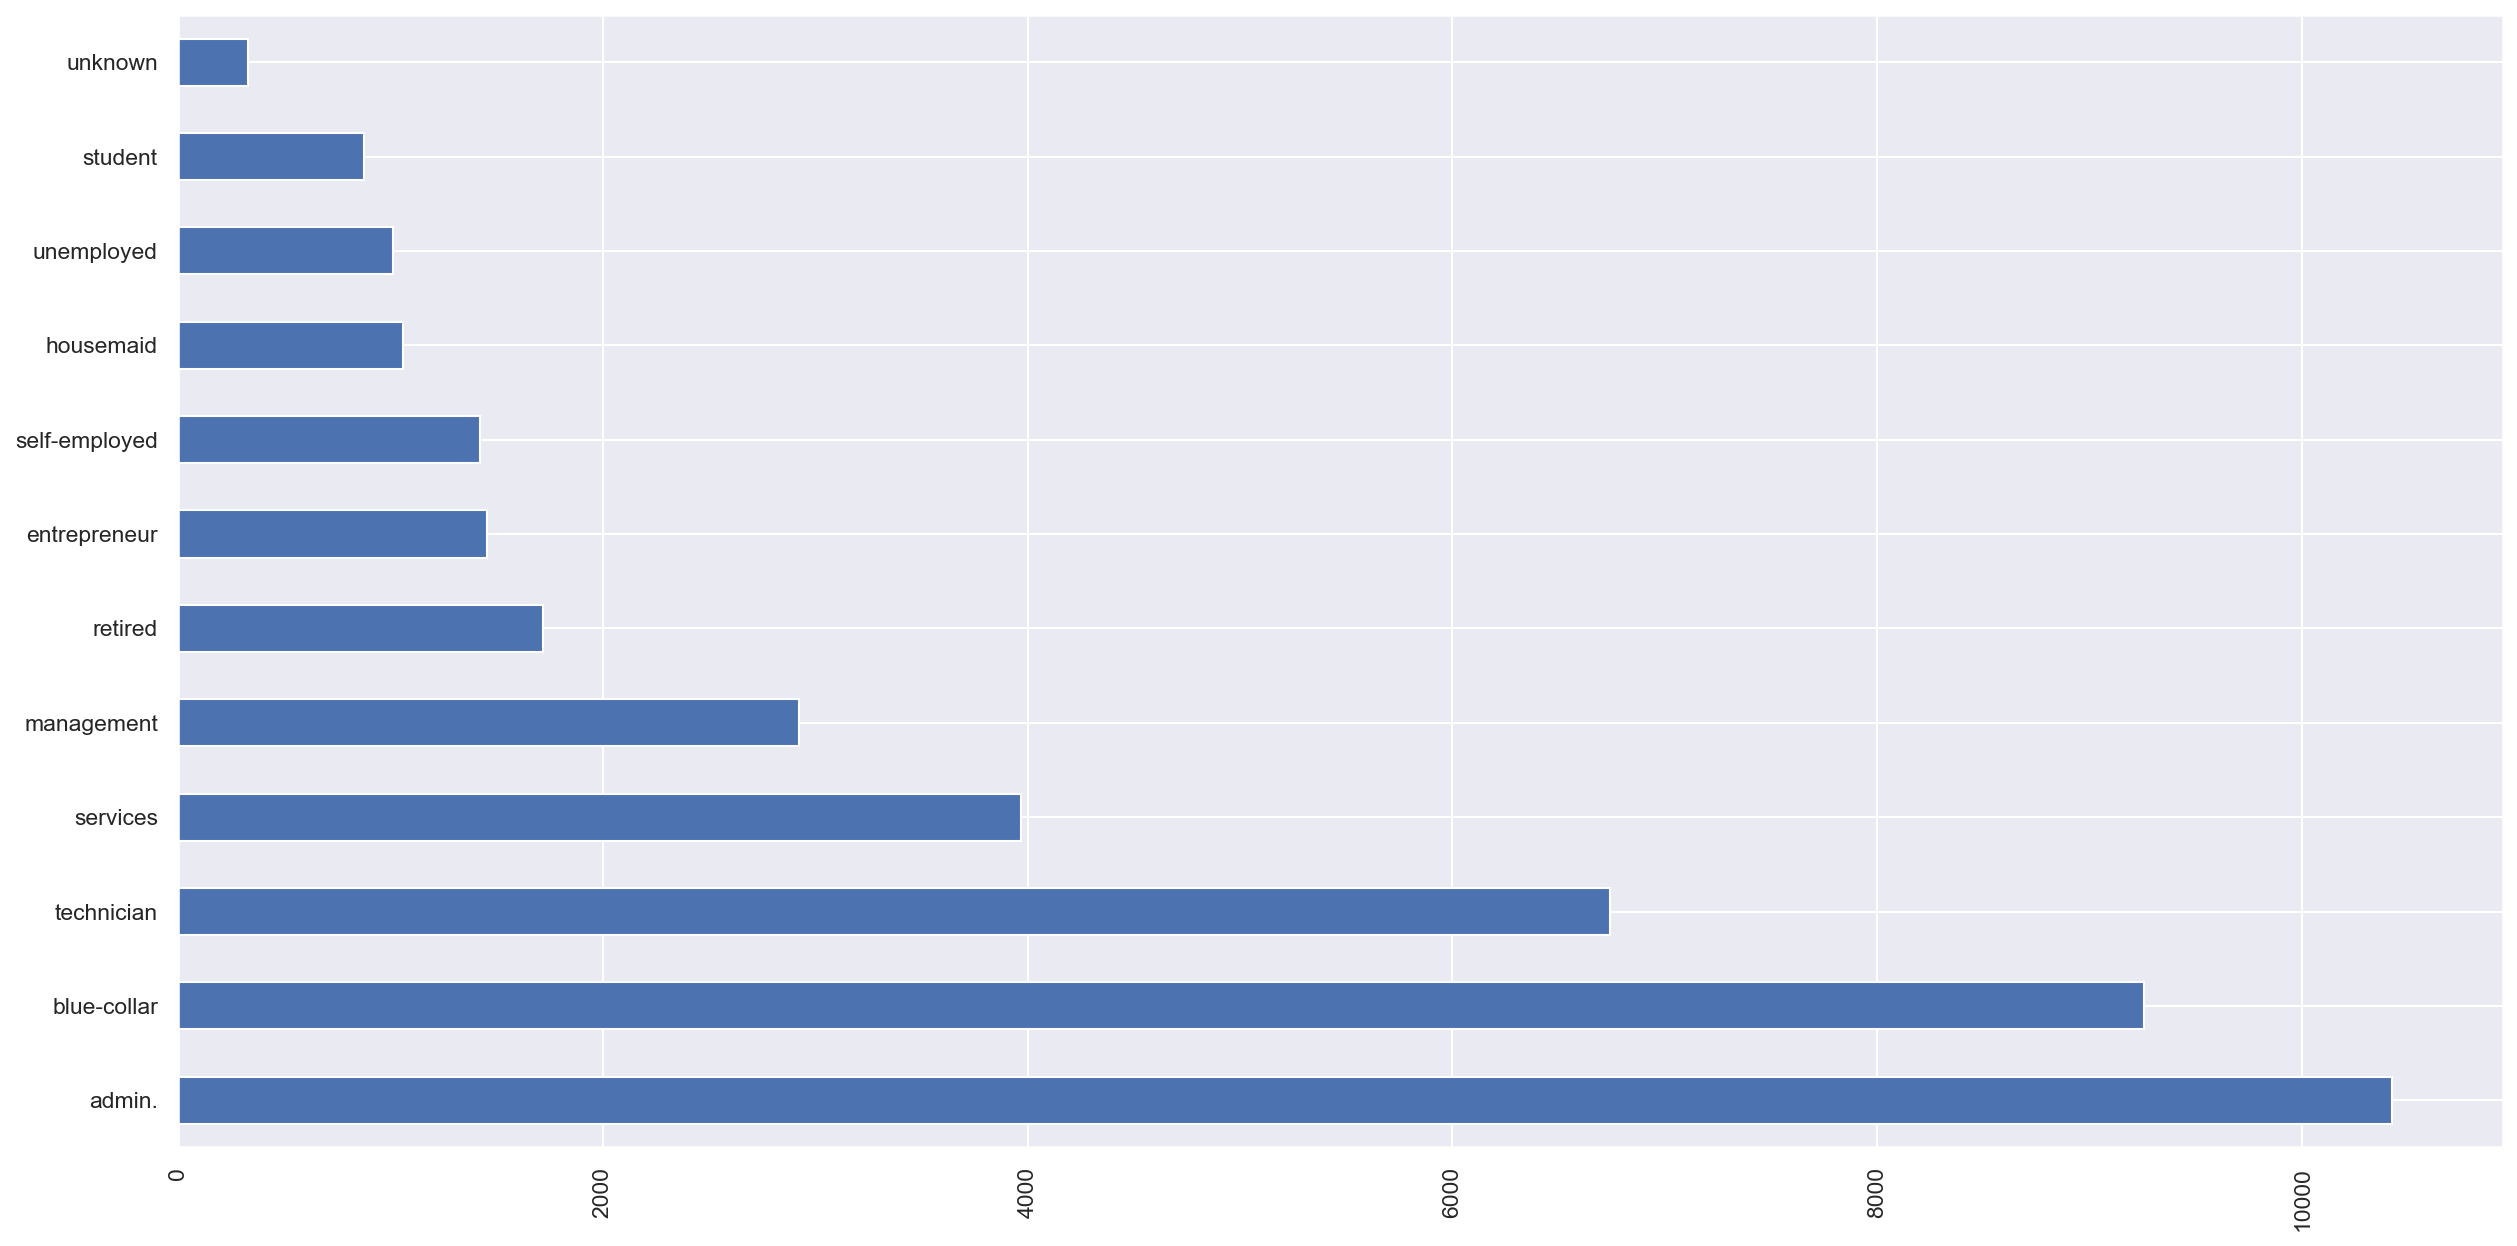

In [29]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
df.job.value_counts().plot(kind='barh')

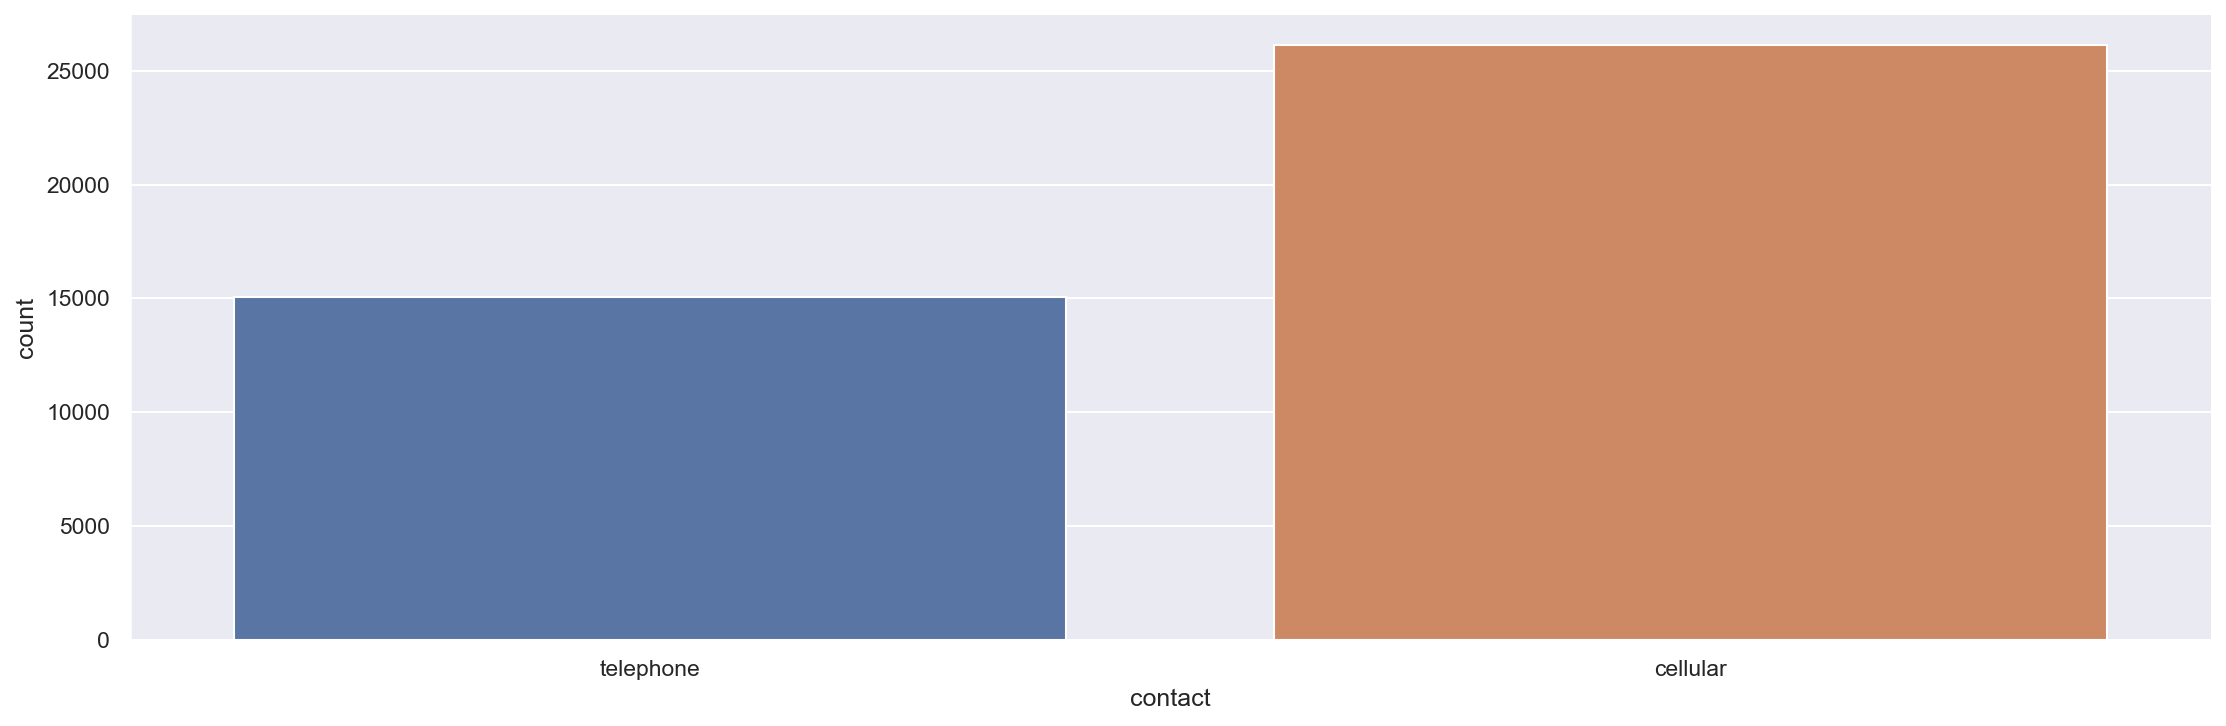

In [30]:
sns.catplot('contact',kind = 'count',data = df,aspect =3)

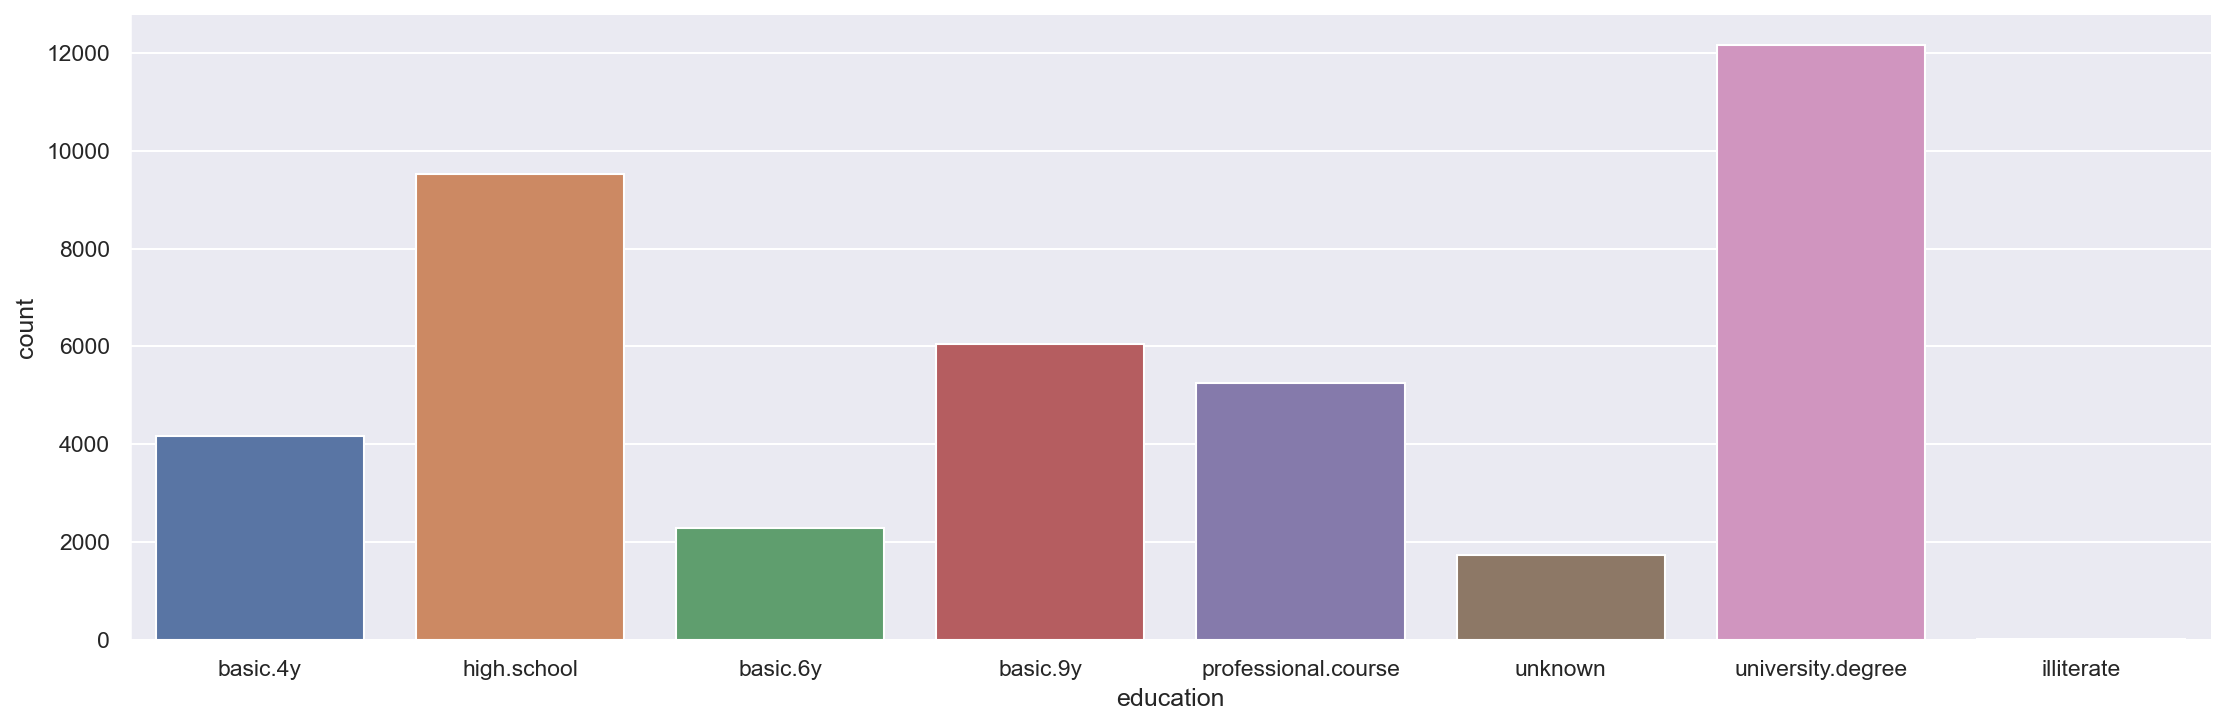

In [31]:
sns.catplot('education',kind = 'count',data = df,aspect =3)

<AxesSubplot:>

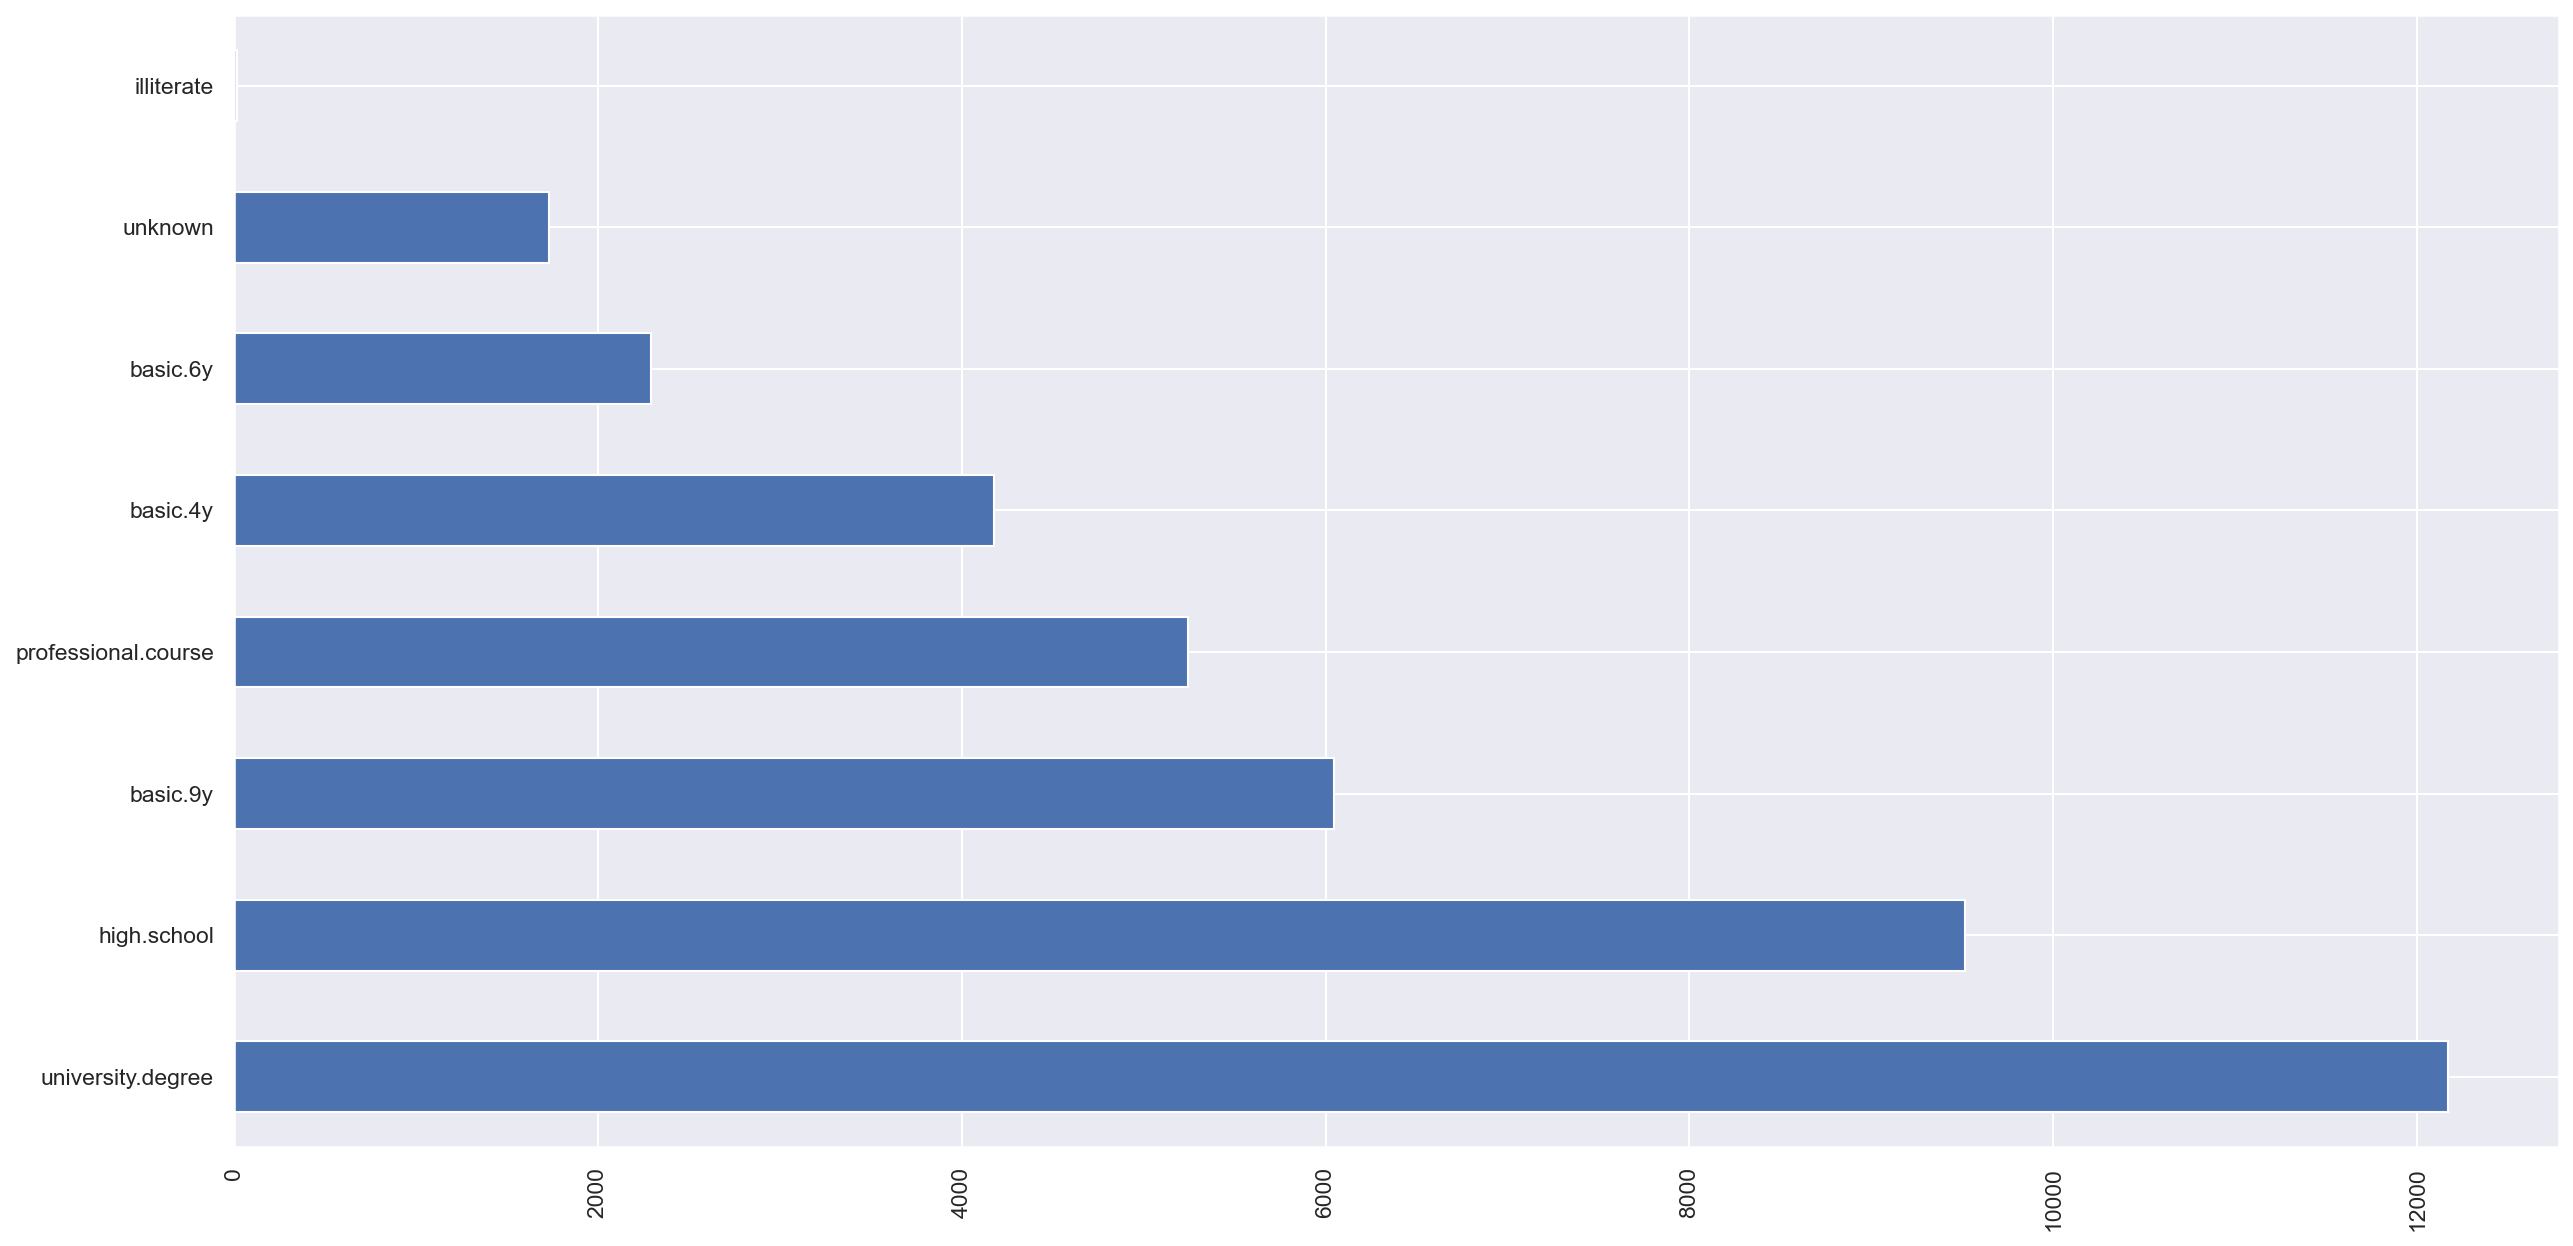

In [32]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
df.education.value_counts().plot(kind='barh')

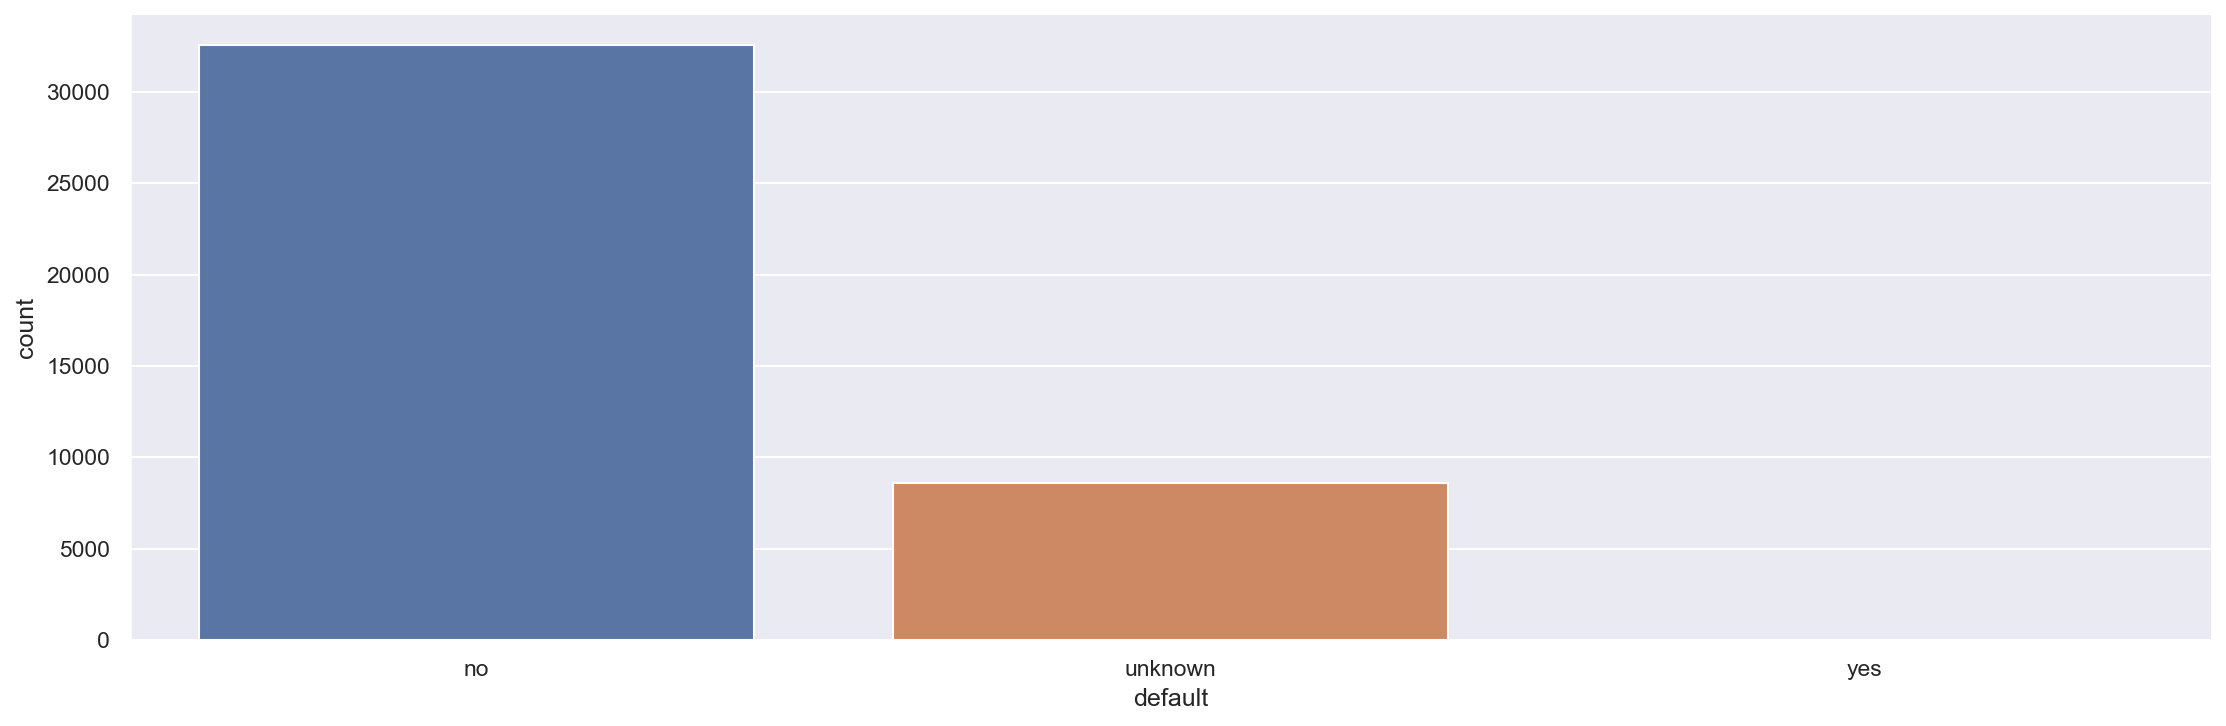

In [33]:
sns.catplot('default',kind = 'count',data = df,aspect =3)

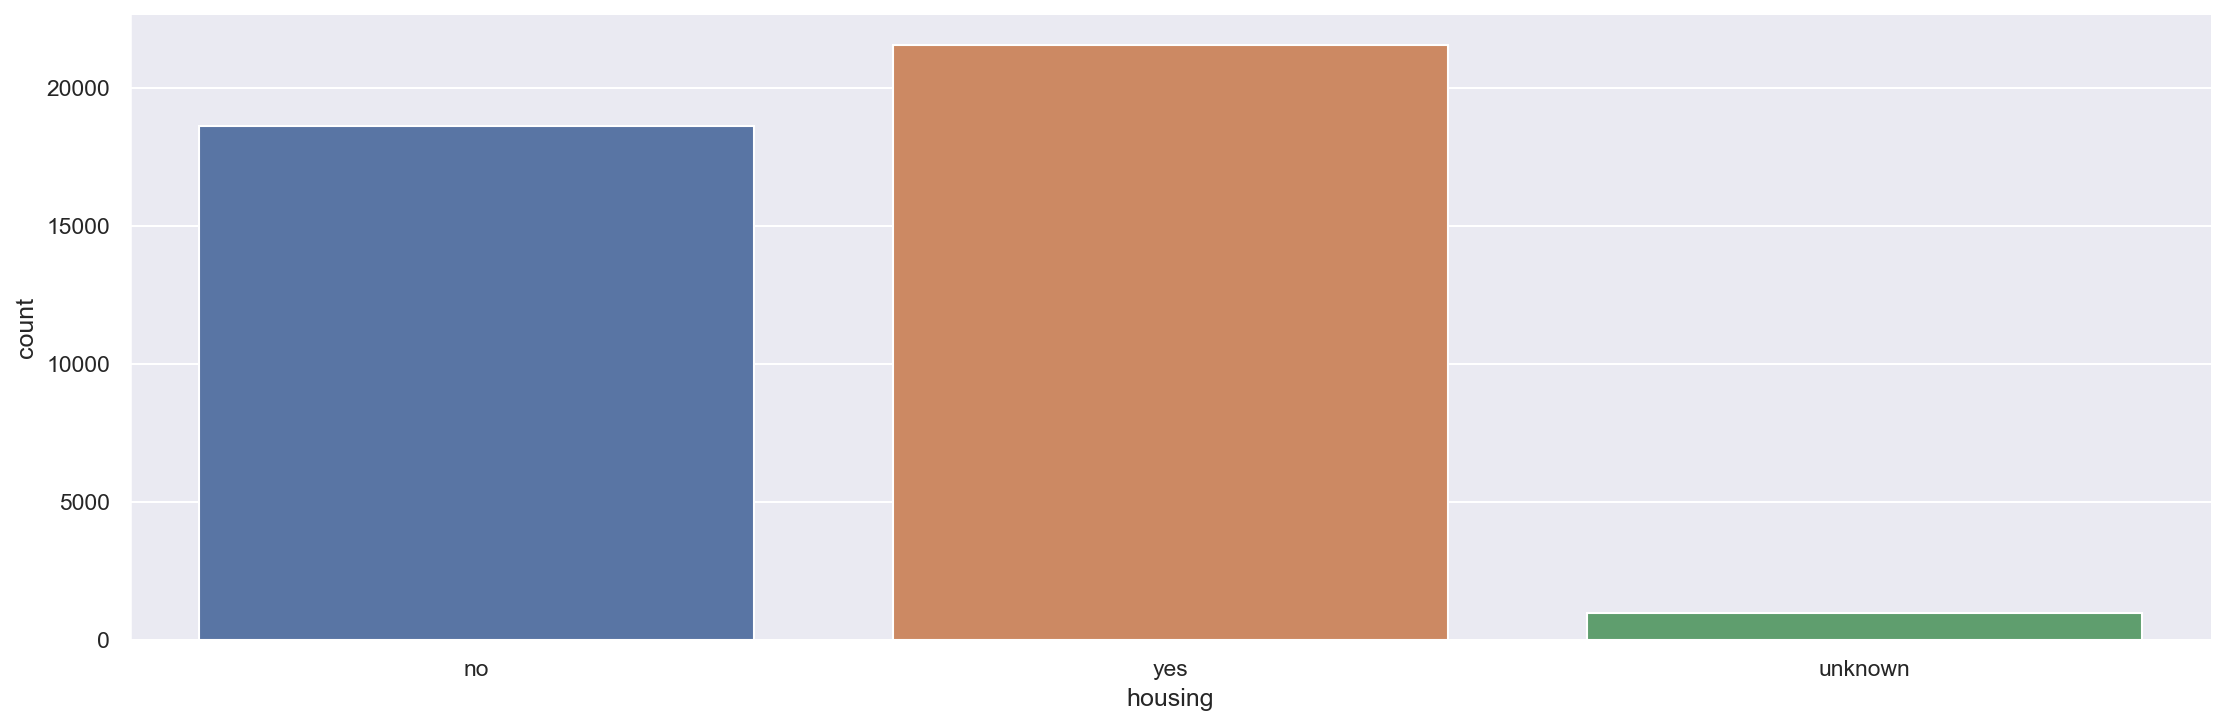

In [34]:
sns.catplot('housing',kind = 'count',data = df,aspect =3)

**Most of the customers have an active housing loan**

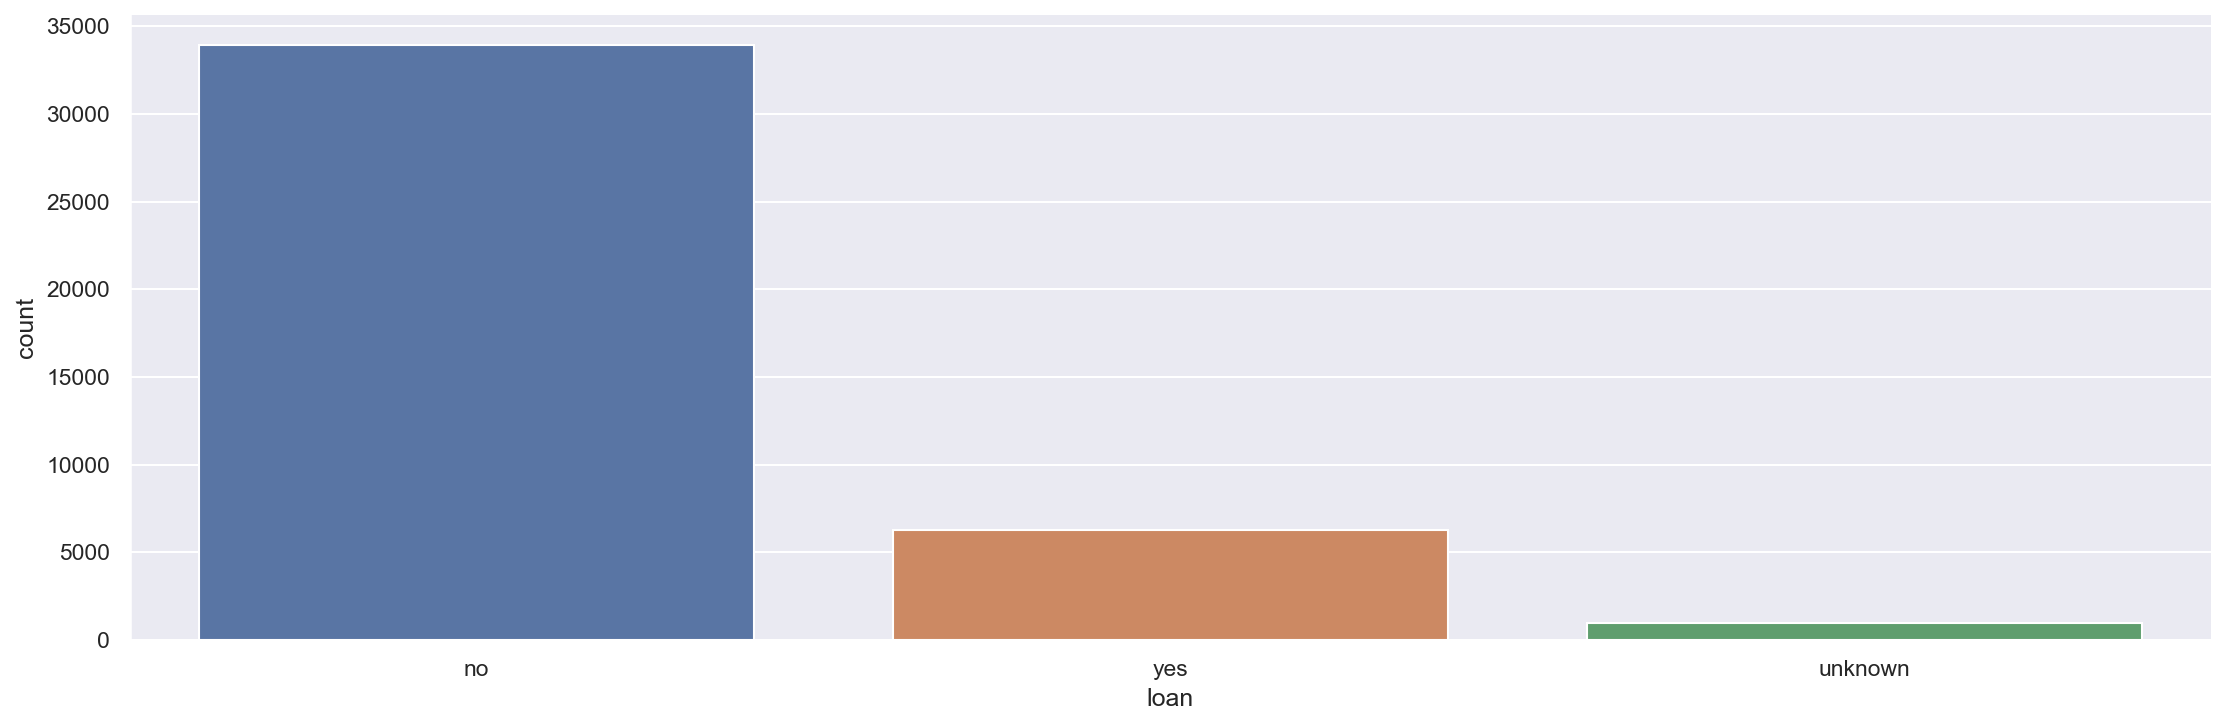

In [35]:
sns.catplot('loan',kind = 'count',data = df,aspect =3)

<AxesSubplot:ylabel='loan'>

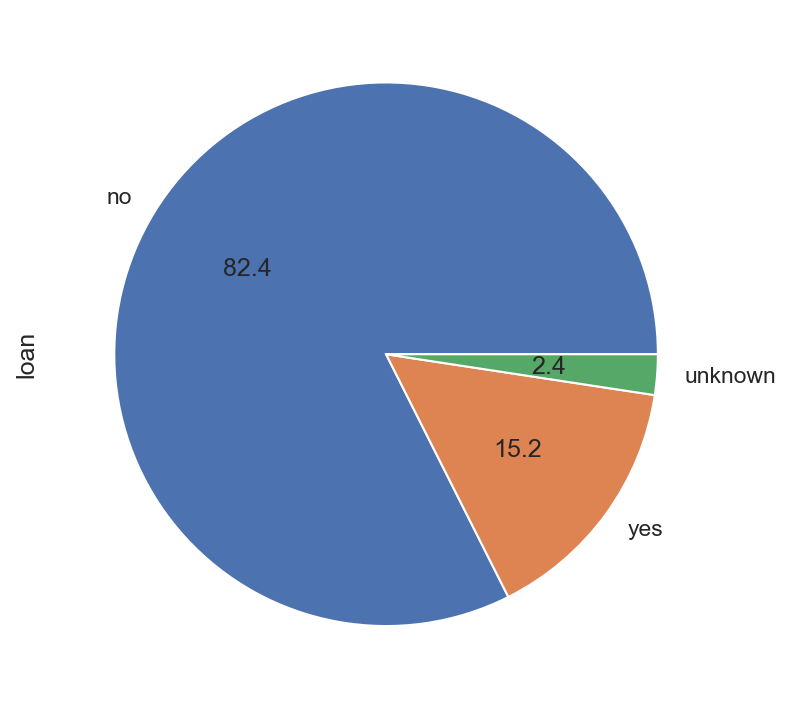

In [36]:
df['loan'].value_counts(normalize=True).plot(kind='pie', autopct="%.1f")

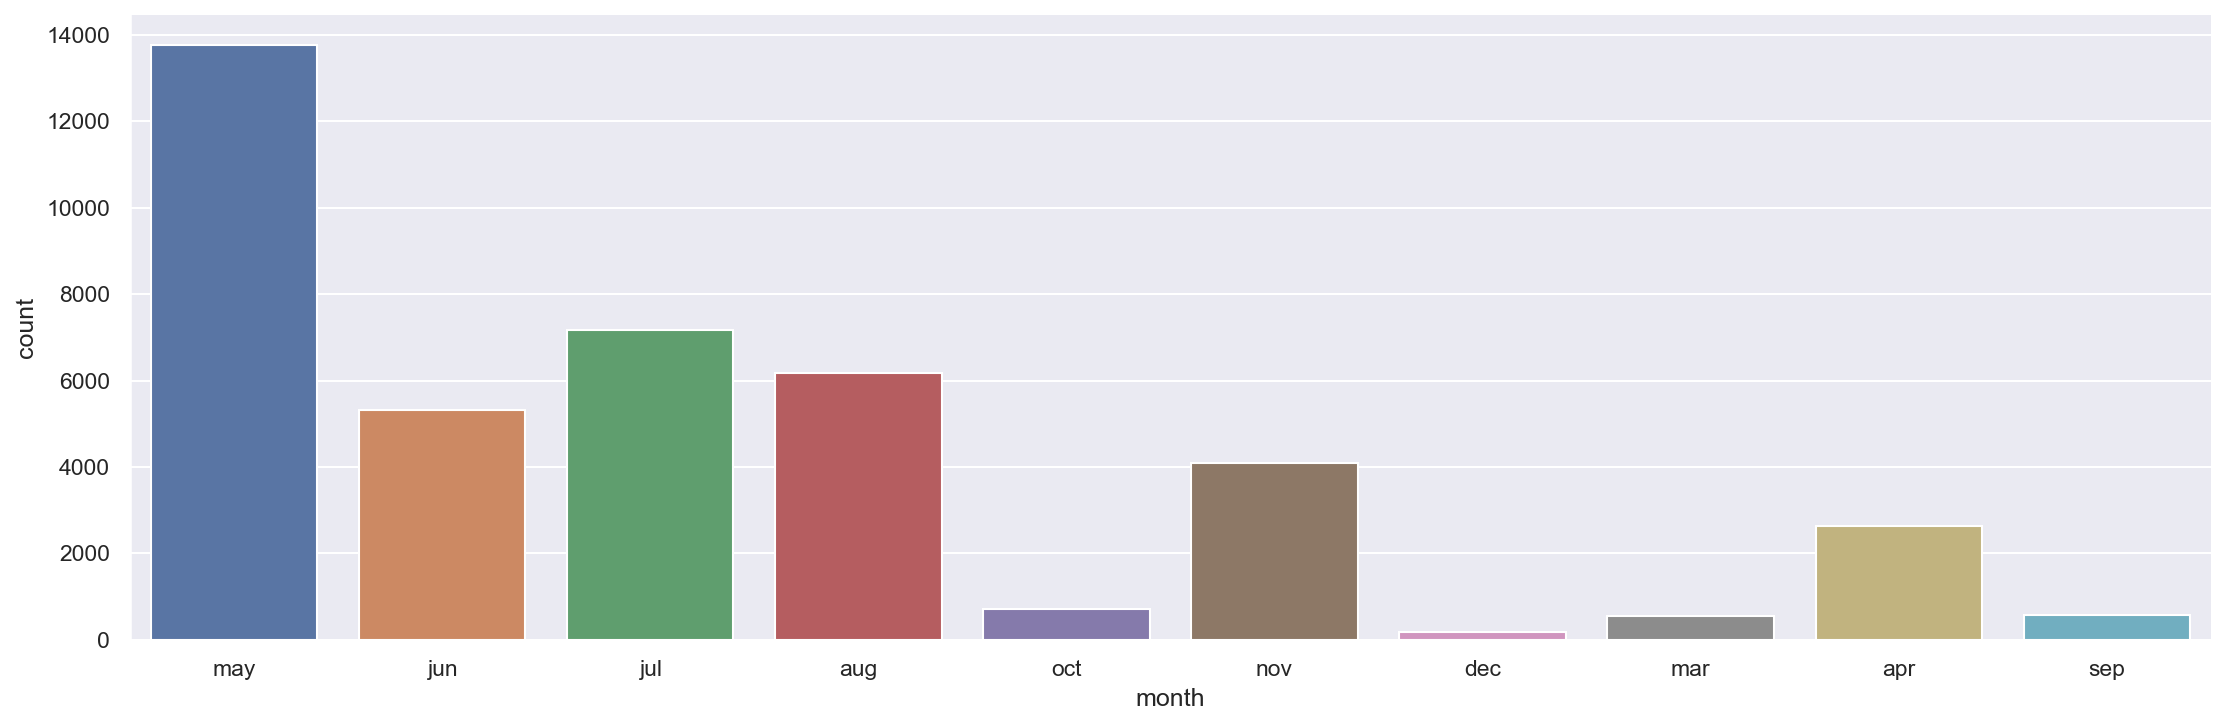

In [37]:
sns.catplot('month',kind = 'count',data = df,aspect =3)

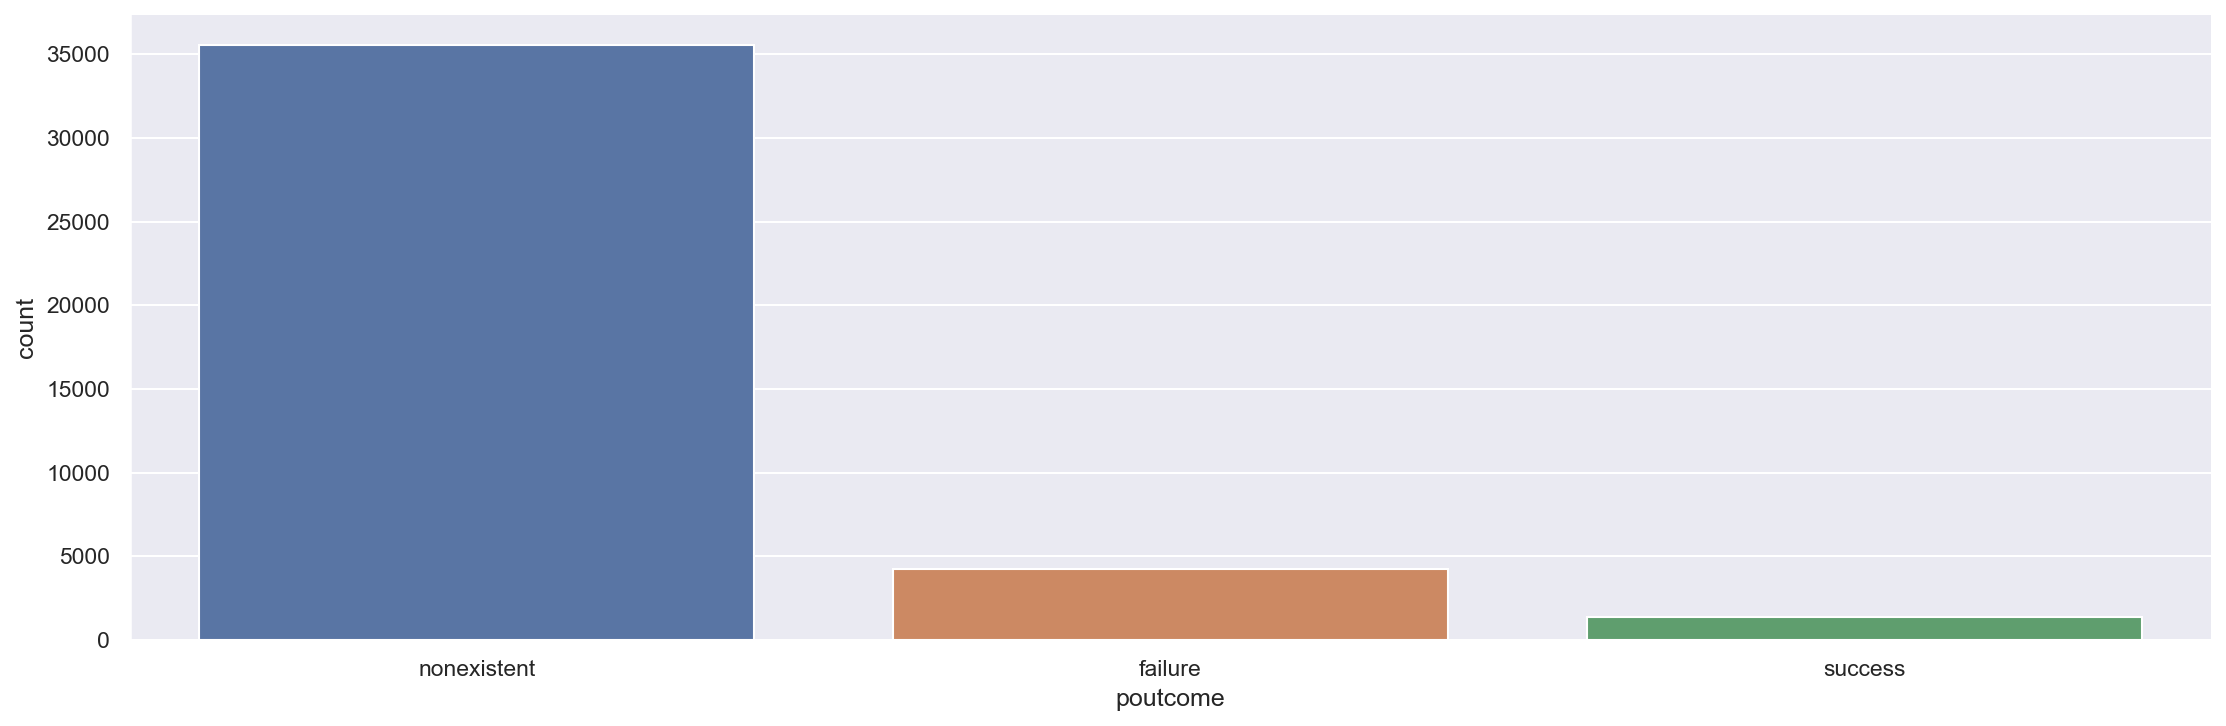

In [38]:
sns.catplot('poutcome',kind = 'count',data = df,aspect =3)

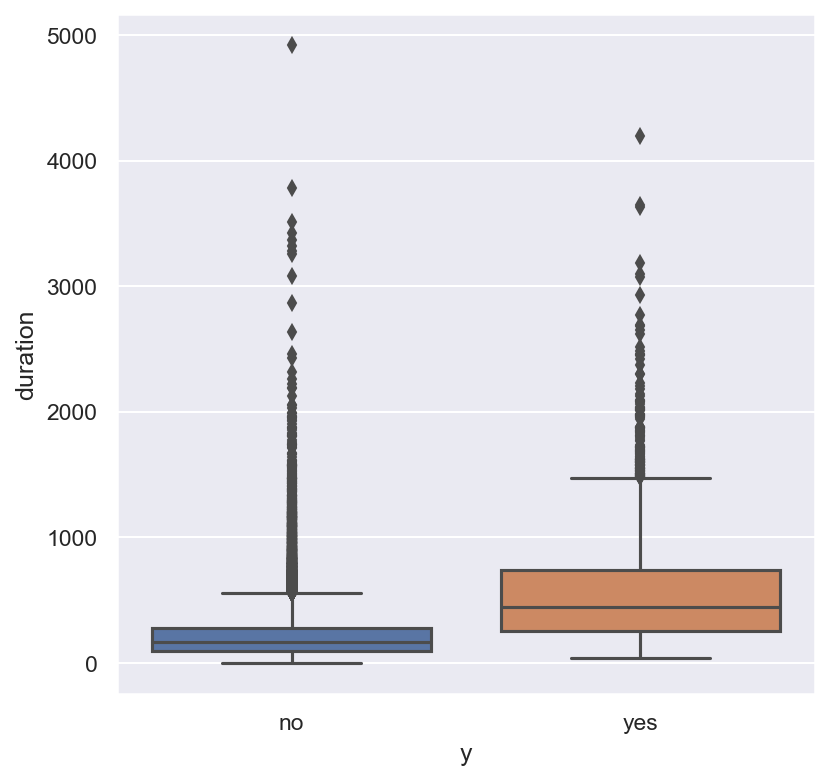

In [39]:
sns.boxplot(data=df, x="y", y="duration")
plt.show()

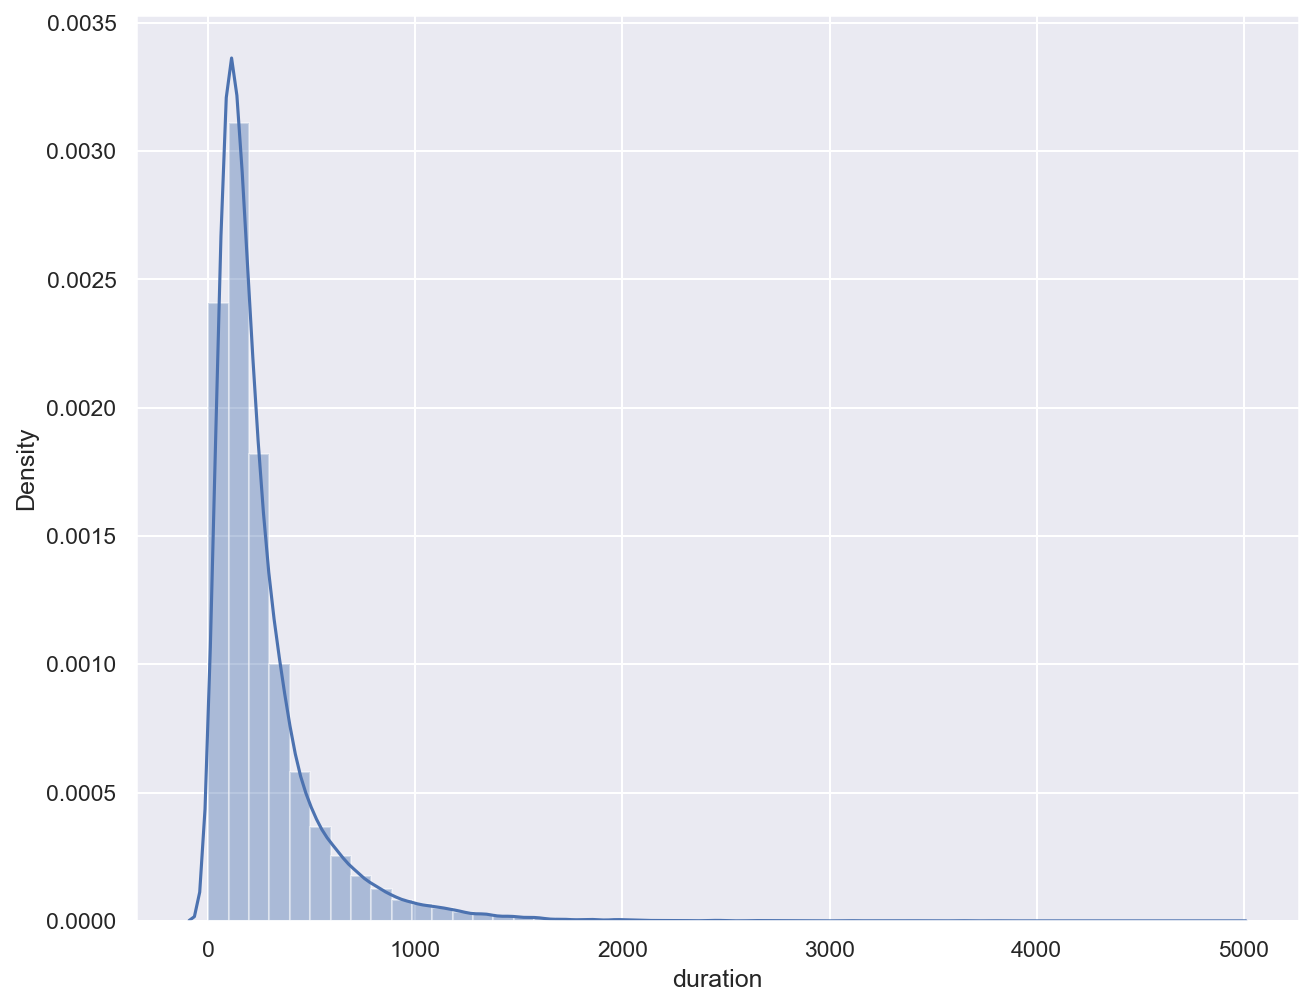

In [40]:
plt.figure(figsize=(10,8))
sns.distplot(df["duration"])
plt.show()

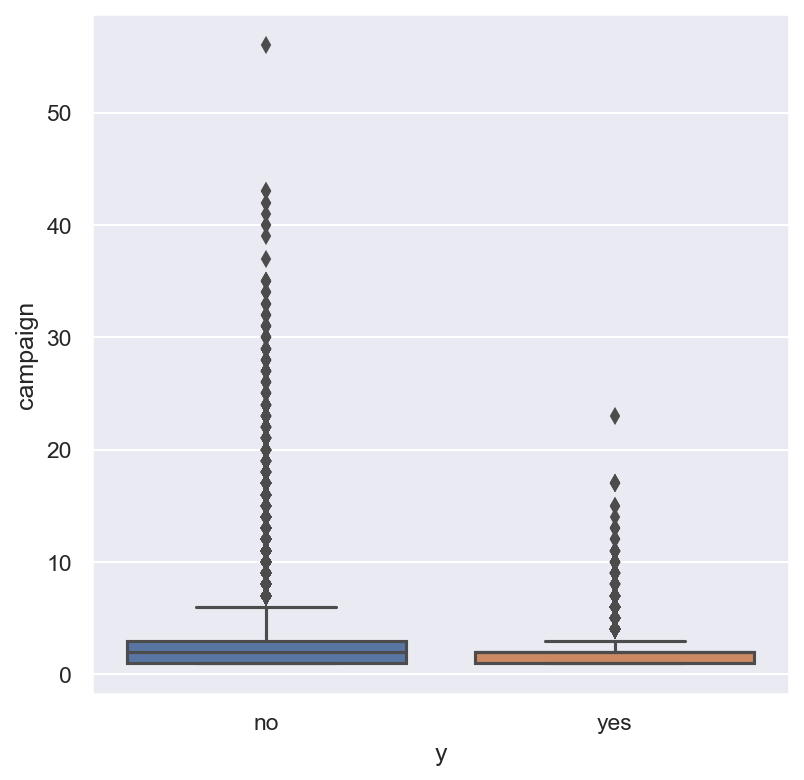

In [41]:
sns.boxplot(data=df, x="y", y="campaign")
plt.show()

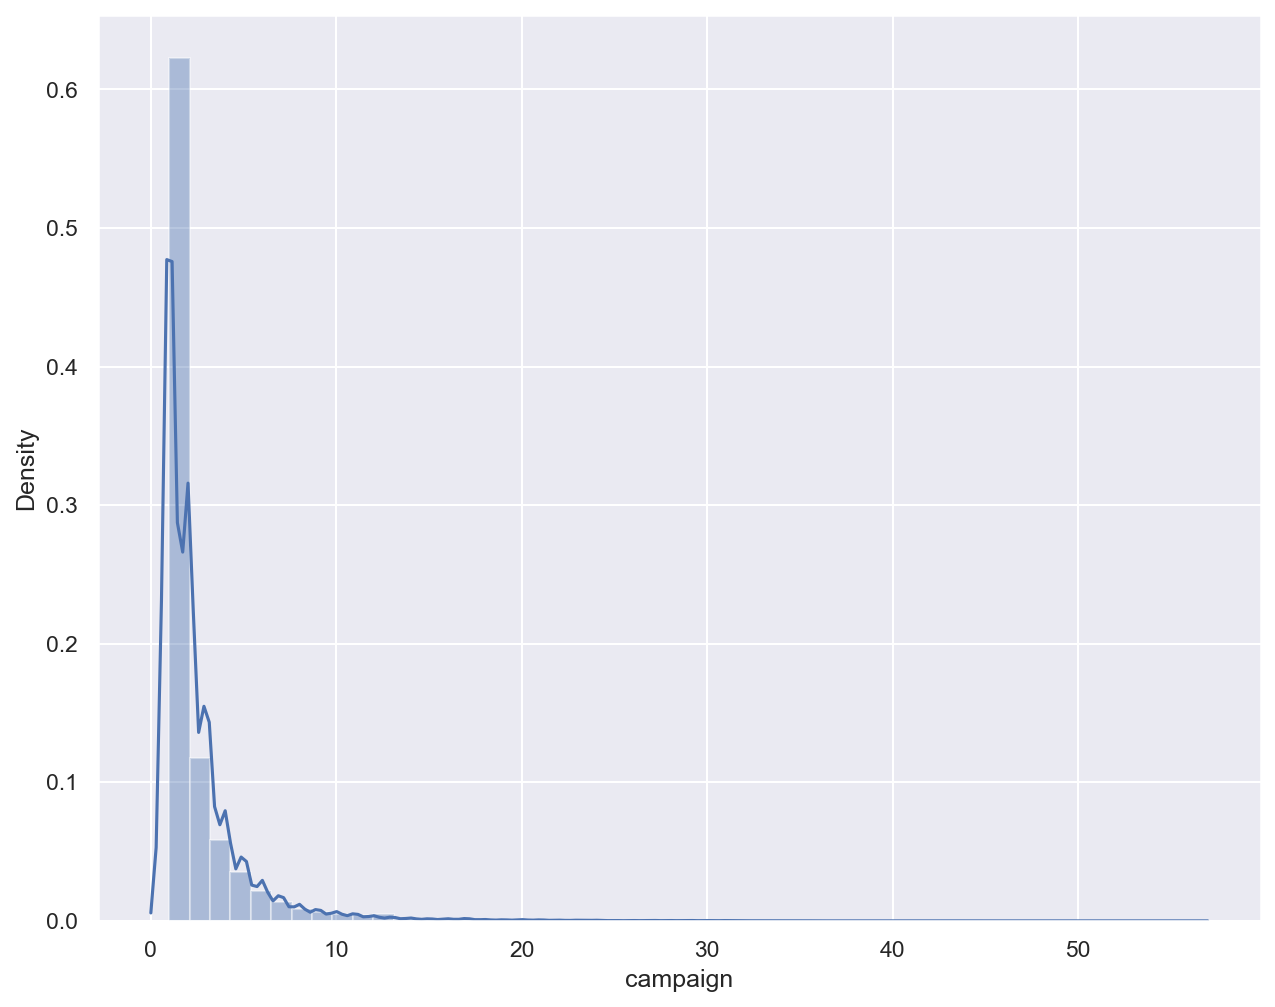

In [42]:
plt.figure(figsize=(10,8))
sns.distplot(df["campaign"])
plt.show()

In [43]:
df_numerical.describe().round().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='viridis')

**<li> The dataset is diverse. We can see from the descriptive statistics that many of the features need to be normalized/scaled.</li>  Tree based model would be able to  handle outliers in this dataset.
    <li>There is a mix data of both int and floating type.</li>
    <li>The range of data is diverse</li>
    <li>pdays feature needs to be looked into detail. </li>
    <li>999 needs replacing with 0 as dataset notes suggests.</li>
    <li>duration will be dropped as per dataset notes because of predictive influence</li>**

**Discrete Features**

In [44]:
#Checking out the categories and their respective counts in each feature
print("Job:",df.job.value_counts(),sep = '\n')
print("-"*40)
print("Marital:",df.marital.value_counts(),sep = '\n')
print("-"*40)
print("Education:",df.education.value_counts(),sep = '\n')
print("-"*40)
print("Default:",df.default.value_counts(),sep = '\n')
print("-"*40)
print("Housing loan:",df.housing.value_counts(),sep = '\n')
print("-"*40)
print("Personal loan:",df.loan.value_counts(),sep = '\n')
print("-"*40)
print("Contact:",df.contact.value_counts(),sep = '\n')
print("-"*40)
print("Month:",df.month.value_counts(),sep = '\n')
print("-"*40)
print("Day:",df.day_of_week.value_counts(),sep = '\n')
print("-"*40)
print("Previous outcome:",df.poutcome.value_counts(),sep = '\n')
print("-"*40)
print("Outcome of this campaign:",df.y.value_counts(),sep = '\n')
print("-"*40)

Job:
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
----------------------------------------
Marital:
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
----------------------------------------
Education:
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
----------------------------------------
Default:
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
----------------------------------------
Housing loan:
yes        21576
no         18622
unknown      

In [45]:
discrete_features = []

for col in df_numerical.columns:
    if np.array_equal(df_numerical[col].values, df_numerical[col].values.astype(int)):
        discrete_features.append(col)

print(f'Total {len(discrete_features)} : ')
print(discrete_features)

Total 5 : 
['age', 'duration', 'campaign', 'pdays', 'previous']


In [46]:
print(f'Unique values as follows:-')
for dcol in discrete_features:
    print(f'{dcol}: {df_numerical[dcol].nunique()}')

Unique values as follows:-
age: 78
duration: 1544
campaign: 42
pdays: 27
previous: 8


**We can see from the above cells that 5 features do not have decimal point and 5 have unique values**

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64


<AxesSubplot:>

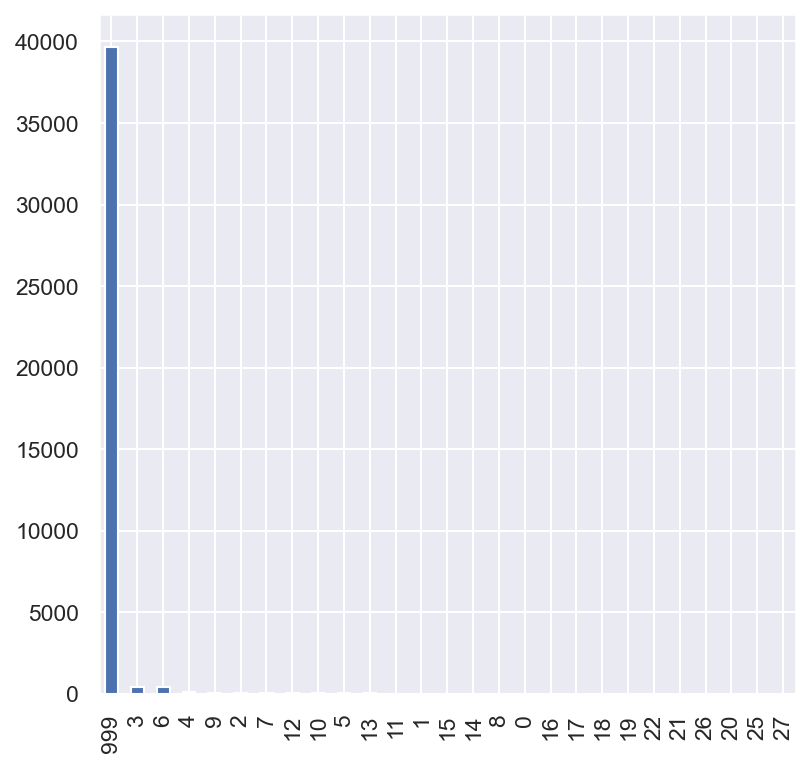

In [47]:
# pdays feature
# clearly 999 value counts for 96% of total distribution, 
# dataset notes suggested 999 means 0,replacing 999 with 0.

print(df_numerical.pdays.value_counts())
df_numerical.pdays.value_counts().plot(kind="bar")

<AxesSubplot:>

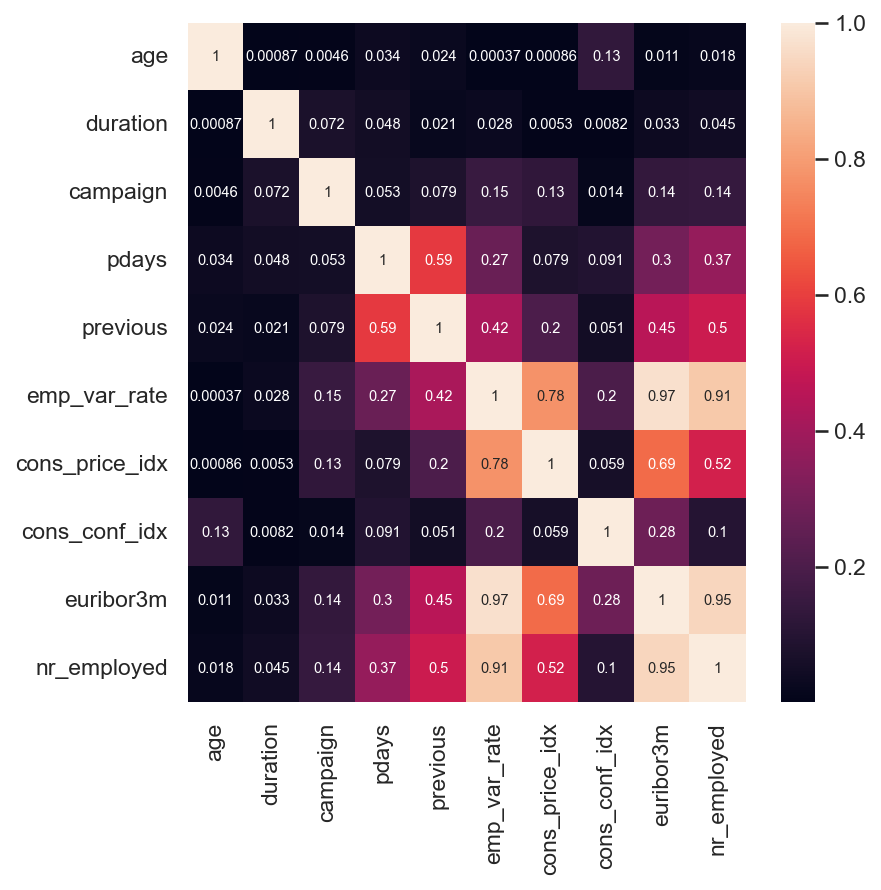

In [48]:
cor_matrix = df_numerical.corr().abs()
sns.heatmap(cor_matrix , annot= True,annot_kws={"size": 7})

<AxesSubplot:>

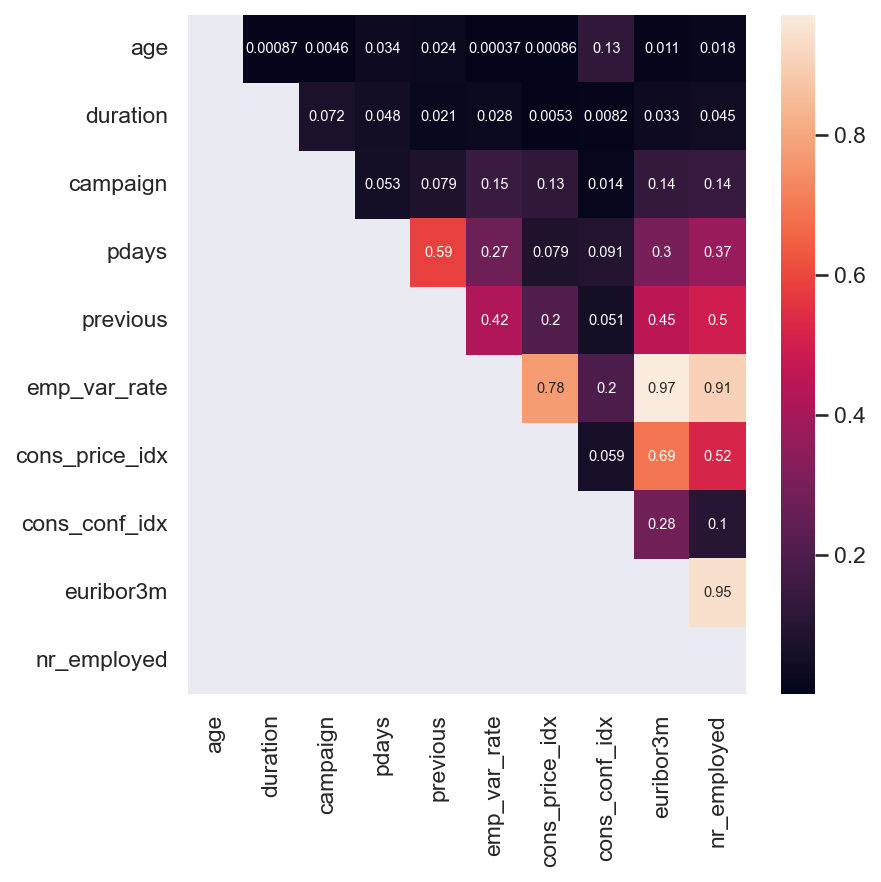

In [49]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
sns.heatmap(upper_tri , annot= True,annot_kws={"size": 7})

In [50]:
#check for highly correlated columns

corr = df.corr()
corr_greater_than_75 = corr[corr>=.75]
corr_greater_than_75

age  duration  campaign  pdays  previous  emp_var_rate  \
age             1.0       NaN       NaN    NaN       NaN           NaN   
duration        NaN       1.0       NaN    NaN       NaN           NaN   
campaign        NaN       NaN       1.0    NaN       NaN           NaN   
pdays           NaN       NaN       NaN    1.0       NaN           NaN   
previous        NaN       NaN       NaN    NaN       1.0           NaN   
emp_var_rate    NaN       NaN       NaN    NaN       NaN      1.000000   
cons_price_idx  NaN       NaN       NaN    NaN       NaN      0.775334   
cons_conf_idx   NaN       NaN       NaN    NaN       NaN           NaN   
euribor3m       NaN       NaN       NaN    NaN       NaN      0.972245   
nr_employed     NaN       NaN       NaN    NaN       NaN      0.906970   

                cons_price_idx  cons_conf_idx  euribor3m  nr_employed  
age                        NaN            NaN        NaN          NaN  
duration                   NaN            NaN        NaN          NaN  
campaign                   NaN            NaN        NaN          NaN  
pdays                      NaN            NaN        NaN          NaN  
previous                   NaN            NaN        NaN          NaN  
emp_var_rate          0.775334            NaN   0.972245     0.906970  
cons_price_idx        1.000000            NaN        NaN          NaN  
cons_conf_idx              NaN            1.0        NaN          NaN  
euribor3m                  NaN            NaN   1.000000     0.945154  
nr_employed                NaN            NaN   0.945154     1.000000

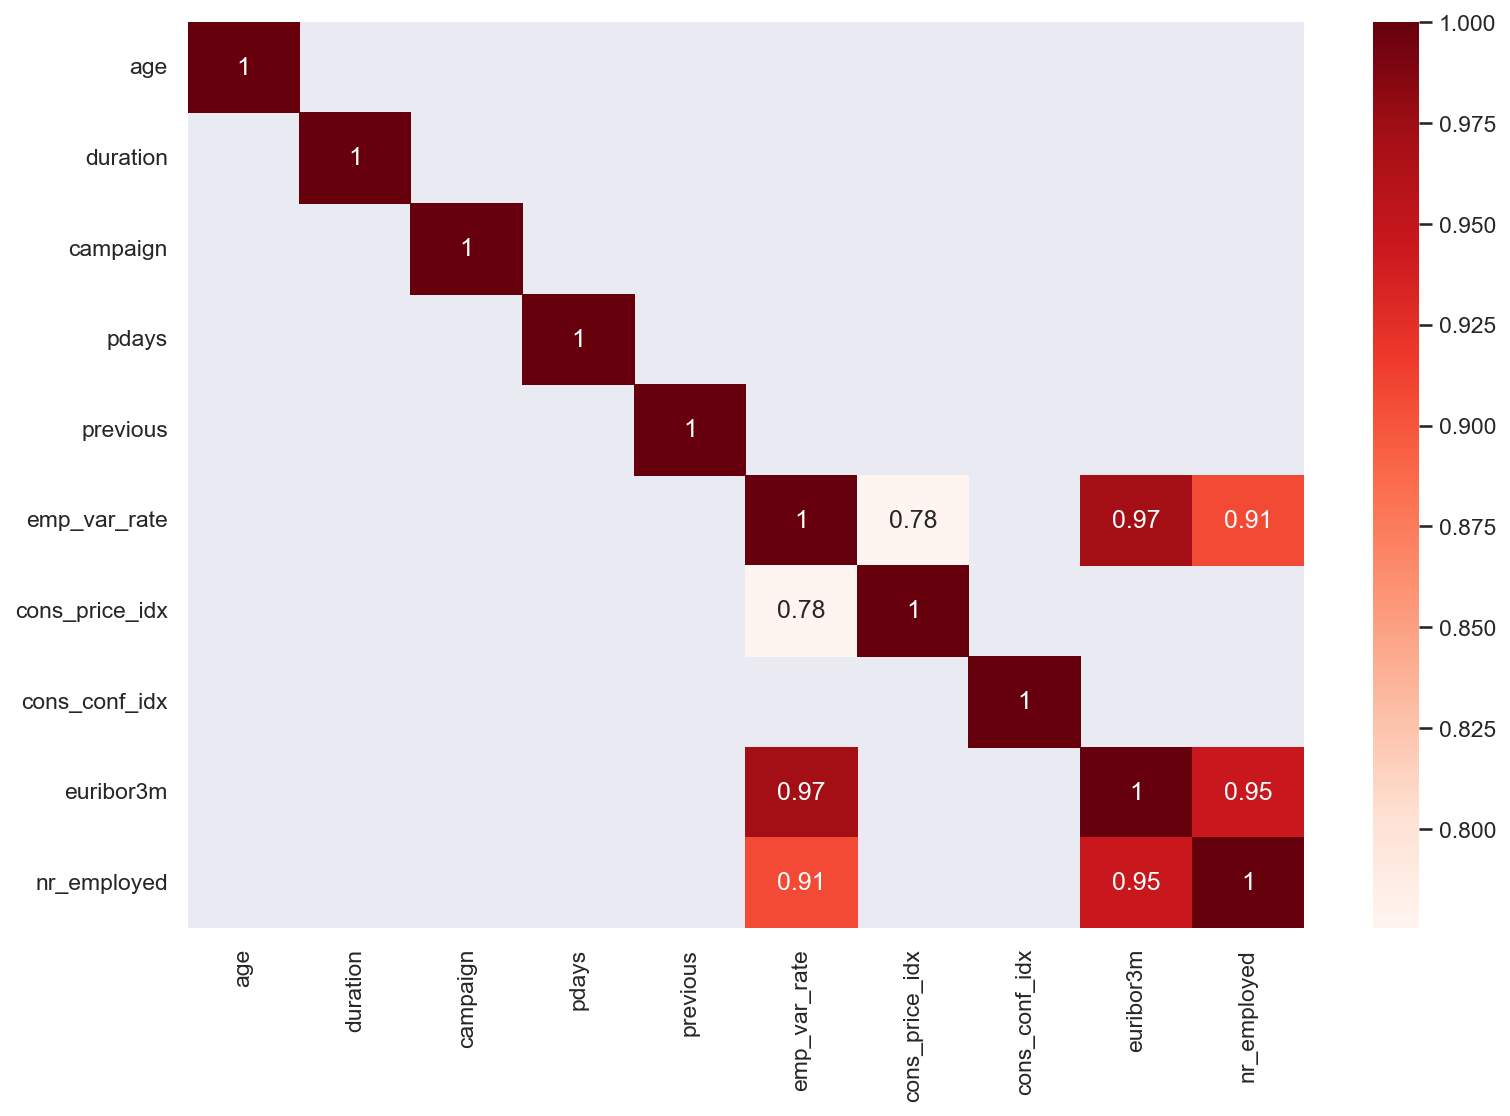

In [51]:


#plot it in a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_greater_than_75, cmap="Reds", annot = True);

**Check for duplicate data**

In [52]:
df_duplicate = df[df.duplicated(keep="last")]
df_duplicate

age          job   marital            education  default housing loan  \
1265    39  blue-collar   married             basic.6y       no      no   no   
12260   36      retired   married              unknown       no      no   no   
14155   27   technician    single  professional.course       no      no   no   
16819   47   technician  divorced          high.school       no     yes   no   
18464   32   technician    single  professional.course       no     yes   no   
20072   55     services   married          high.school  unknown      no   no   
20531   41   technician   married  professional.course       no     yes   no   
25183   39       admin.   married    university.degree       no      no   no   
28476   24     services    single          high.school       no     yes   no   
32505   35       admin.   married    university.degree       no     yes   no   
36950   45       admin.   married    university.degree       no      no   no   
38255   71      retired    single    university.degree       no      no   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
1265   telephone   may         thu  ...         1    999         0   
12260  telephone   jul         thu  ...         1    999         0   
14155   cellular   jul         mon  ...         2    999         0   
16819   cellular   jul         thu  ...         3    999         0   
18464   cellular   jul         thu  ...         1    999         0   
20072   cellular   aug         mon  ...         1    999         0   
20531   cellular   aug         tue  ...         1    999         0   
25183   cellular   nov         tue  ...         2    999         0   
28476   cellular   apr         tue  ...         1    999         0   
32505   cellular   may         fri  ...         4    999         0   
36950   cellular   jul         thu  ...         1    999         0   
38255  telephone   oct         tue  ...         1    999         0   

          poutcome emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
1265   nonexistent          1.1          93.994          -36.4      4.855   
12260  nonexistent          1.4          93.918          -42.7      4.966   
14155  nonexistent          1.4          93.918          -42.7      4.962   
16819  nonexistent          1.4          93.918          -42.7      4.962   
18464  nonexistent          1.4          93.918          -42.7      4.968   
20072  nonexistent          1.4          93.444          -36.1      4.965   
20531  nonexistent          1.4          93.444          -36.1      4.966   
25183  nonexistent         -0.1          93.200          -42.0      4.153   
28476  nonexistent         -1.8          93.075          -47.1      1.423   
32505  nonexistent         -1.8          92.893          -46.2      1.313   
36950  nonexistent         -2.9          92.469          -33.6      1.072   
38255  nonexistent         -3.4          92.431          -26.9      0.742   

       nr_employed    y  
1265        5191.0   no  
12260       5228.1   no  
14155       5228.1   no  
16819       5228.1   no  
18464       5228.1   no  
20072       5228.1   no  
20531       5228.1   no  
25183       5195.8   no  
28476       5099.1   no  
32505       5099.1   no  
36950       5076.2  yes  
38255       5017.5   no  

[12 rows x 21 columns]

In [53]:
df_duplicate.shape

(12, 21)

**There are 12 rows that are duplicated. So we can drop them**

In [54]:
#Drop duplicates 
df=df.drop_duplicates()
#Dimensions of the remaining dataset
df.shape

(41176, 21)

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

**Business Objective:**

**In this business case, we are presented with Real-world data that were collected from a Portuguese marketing campaign for bank deposit subscriptions.<br>The business goal of the bank is to find a machine learning model that can explain success of a contact, i.e. if the client subscribes the deposit. </br> <br>Such a model can increase campaign efficiency by identifying the main characteristics that affect success, helping in a better management of the available resources (e.g. human effort, phone calls, time) and selection of a high quality and affordable set of potential buying customers.</br> In this business case, we are presented with anonymized customer data that were collected from a Portuguese marketing campaign for bank deposit subscriptions. The business goal of the bank is to find a machine learning model that can explain success of a contact, i.e. if the client subscribes the deposit.
CRM data of direct marketing campaigns (phone calls) from the banking institution is provided. The classification goal is to predict if the client will subscribe a term deposit (target variable y). This case study is adapted from a research paper where the researchers Sergio Moro and Raul Laurceano have used a very similar dataset as the one provided to study the effectiveness of of Bank Telemarketing . As per the paper their model was able to achieve an AUC score of 0.8 and a ALIFT of 0.7. The objective of this exercise will be to come close to the effort.
**

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [55]:
df_numerical['pdays'] = df_numerical['pdays'].replace(999,0)
df_numerical.pdays.value_counts()

0     39688
3       439
6       412
4       118
9        64
2        61
7        60
12       58
10       52
5        46
13       36
11       28
1        26
15       24
14       20
8        18
16       11
17        8
18        7
19        3
22        3
21        2
20        1
25        1
26        1
27        1
Name: pdays, dtype: int64

In [56]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
print(to_drop)

['euribor3m', 'nr_employed']


In [57]:
#  nr_employed is highly correlated with euribo3m and emp_var_rate
# trying to drop euribor3m and emp_var_rate
df_numerical = df_numerical.drop(['euribor3m','nr_employed'],axis = 1)
df_numerical

age  duration  campaign  pdays  previous  emp_var_rate  cons_price_idx  \
0       56       261         1      0         0           1.1          93.994   
1       57       149         1      0         0           1.1          93.994   
2       37       226         1      0         0           1.1          93.994   
3       40       151         1      0         0           1.1          93.994   
4       56       307         1      0         0           1.1          93.994   
...    ...       ...       ...    ...       ...           ...             ...   
41183   73       334         1      0         0          -1.1          94.767   
41184   46       383         1      0         0          -1.1          94.767   
41185   56       189         2      0         0          -1.1          94.767   
41186   44       442         1      0         0          -1.1          94.767   
41187   74       239         3      0         1          -1.1          94.767   

       cons_conf_idx  
0              -36.4  
1              -36.4  
2              -36.4  
3              -36.4  
4              -36.4  
...              ...  
41183          -50.8  
41184          -50.8  
41185          -50.8  
41186          -50.8  
41187          -50.8  

[41188 rows x 8 columns]

In [58]:
# we need to remove duration feature as mentioned in the above notes because it's highly correlated with the target.
df_numerical = df_numerical.drop('duration', axis = 1)
df_numerical

age  campaign  pdays  previous  emp_var_rate  cons_price_idx  \
0       56         1      0         0           1.1          93.994   
1       57         1      0         0           1.1          93.994   
2       37         1      0         0           1.1          93.994   
3       40         1      0         0           1.1          93.994   
4       56         1      0         0           1.1          93.994   
...    ...       ...    ...       ...           ...             ...   
41183   73         1      0         0          -1.1          94.767   
41184   46         1      0         0          -1.1          94.767   
41185   56         2      0         0          -1.1          94.767   
41186   44         1      0         0          -1.1          94.767   
41187   74         3      0         1          -1.1          94.767   

       cons_conf_idx  
0              -36.4  
1              -36.4  
2              -36.4  
3              -36.4  
4              -36.4  
...              ...  
41183          -50.8  
41184          -50.8  
41185          -50.8  
41186          -50.8  
41187          -50.8  

[41188 rows x 7 columns]

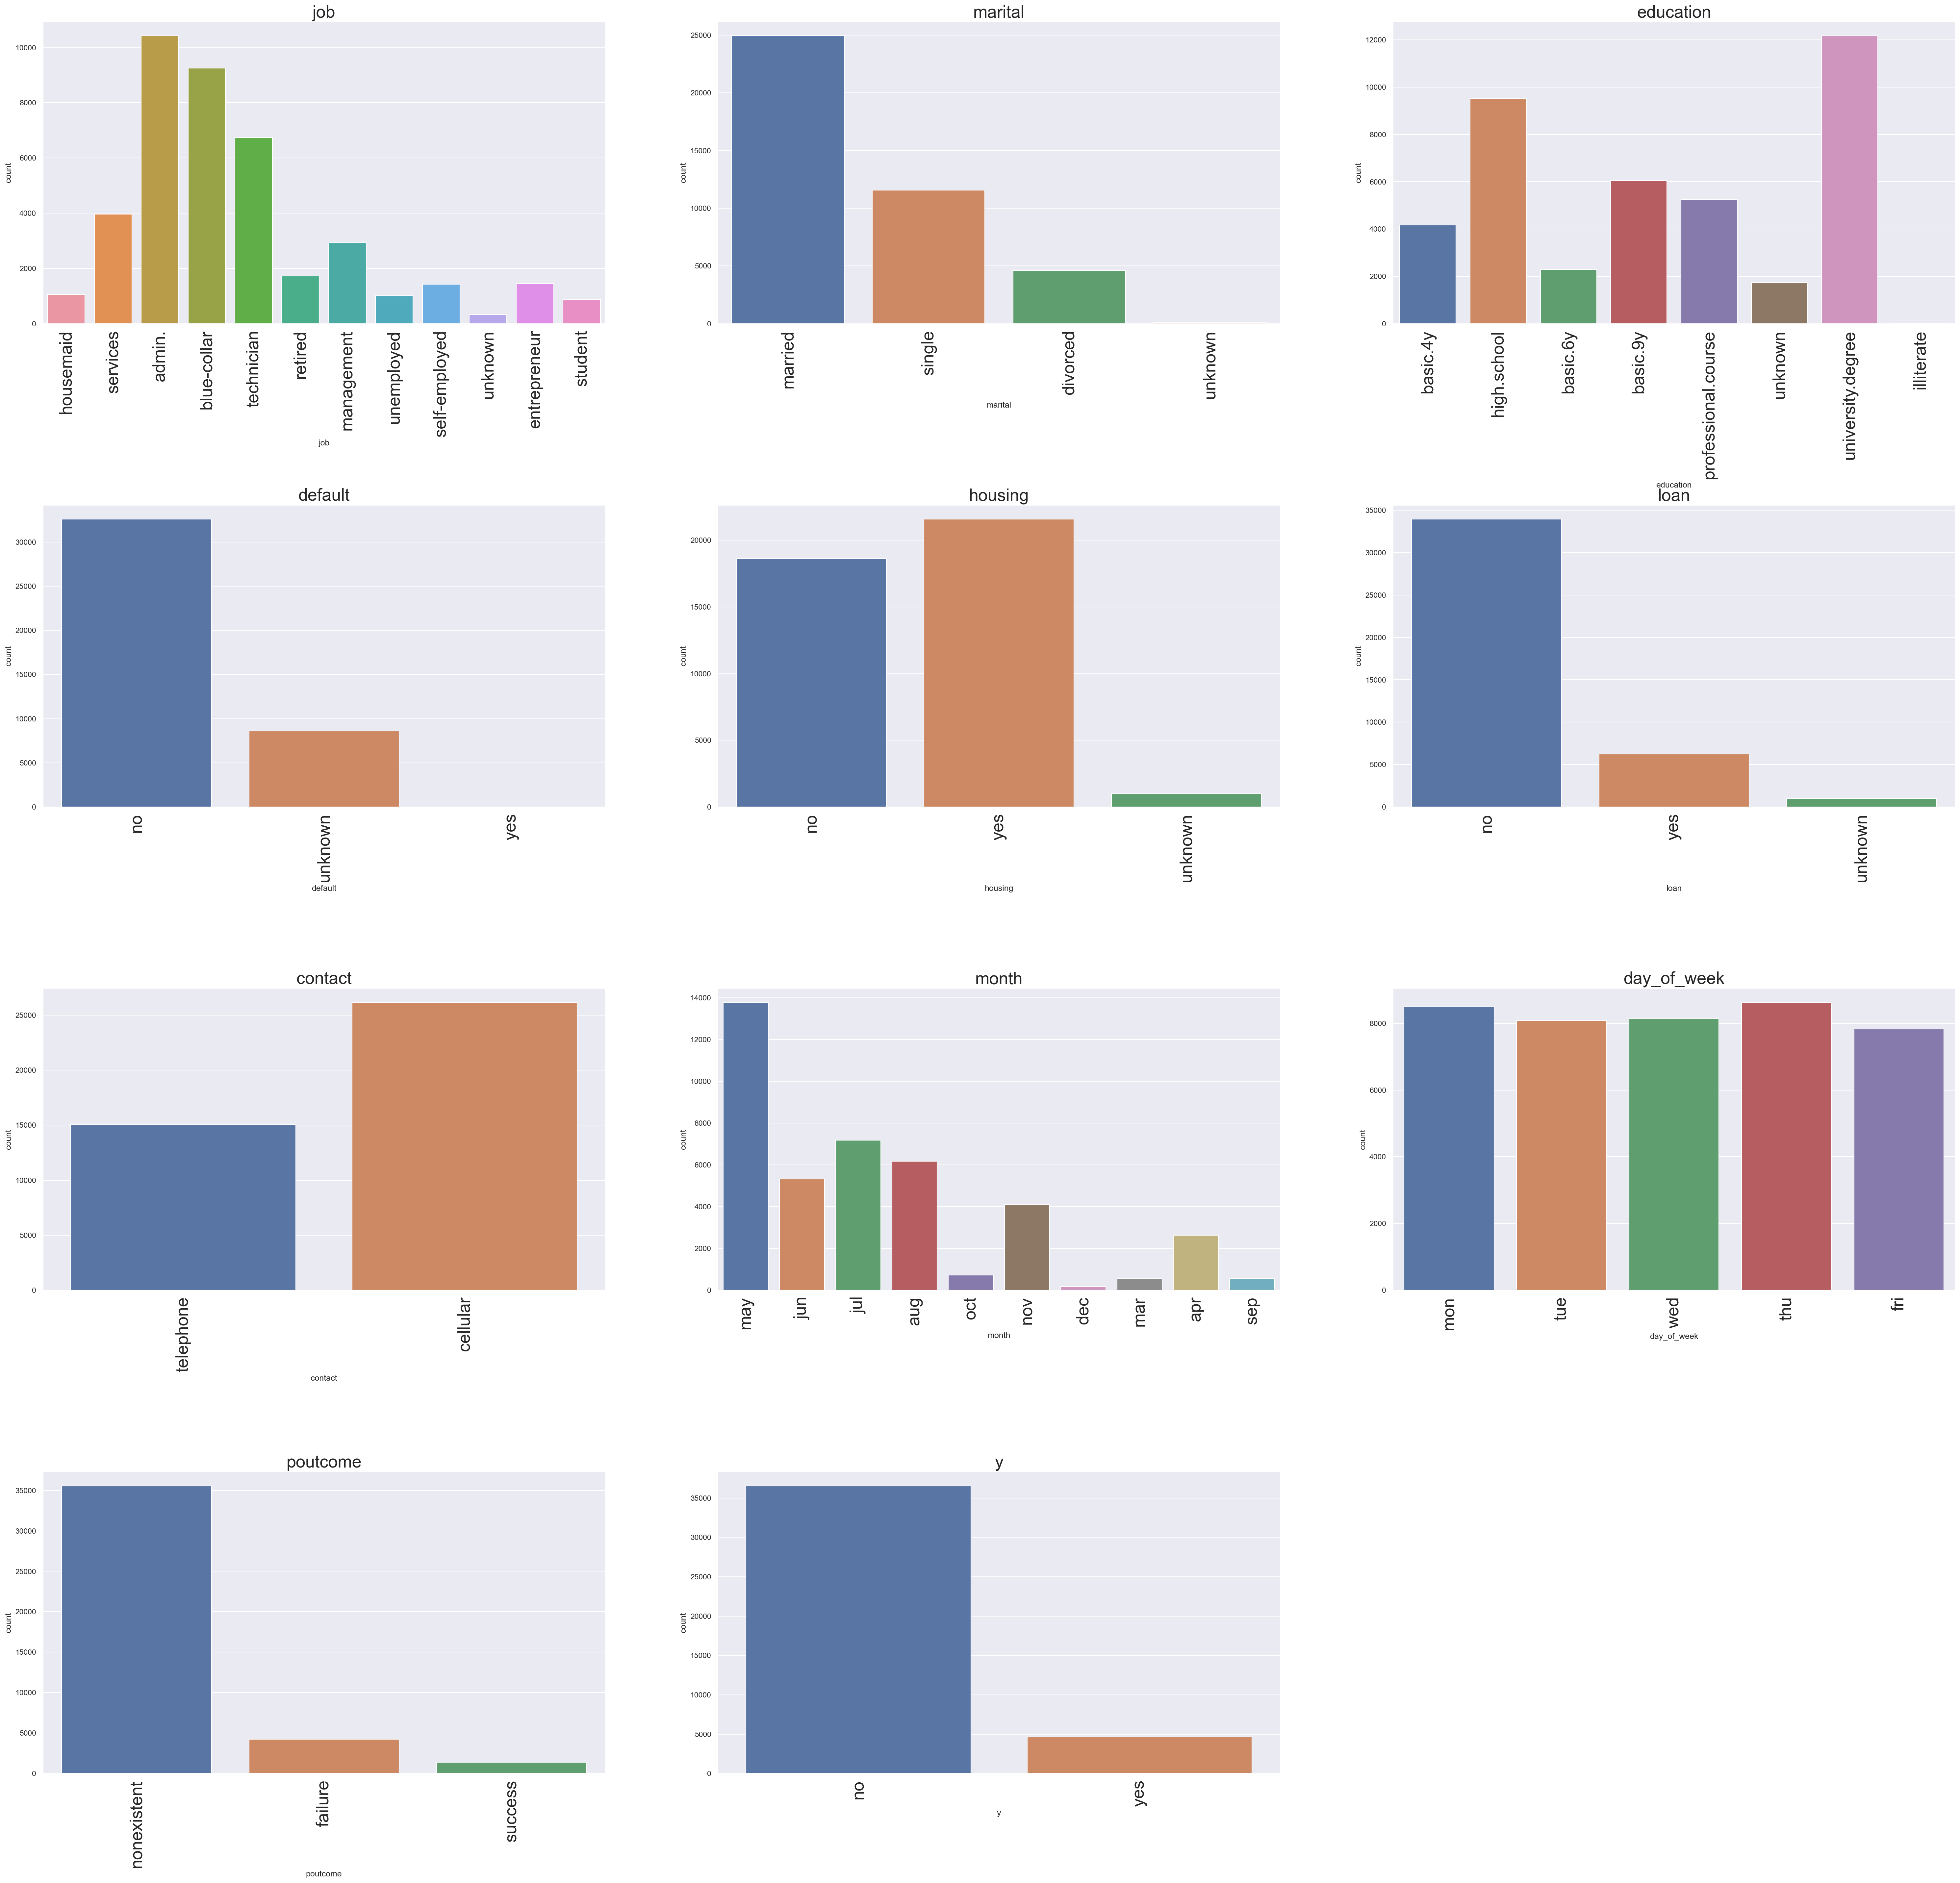

In [60]:
#Categorical Feature Distribution

fig = plt.figure(figsize = (50, 60))
for idx, i in enumerate(df_categorical.columns):
    fig.add_subplot(5, 3, idx+1)
    sns.countplot(x = df_categorical.iloc[:, idx],)
    plt.subplots_adjust(hspace=0.6)
    locs, labels = plt.xticks(fontsize=25)
    plt.setp(labels, rotation=90)
    plt.title(i,fontsize=25)
plt.show()

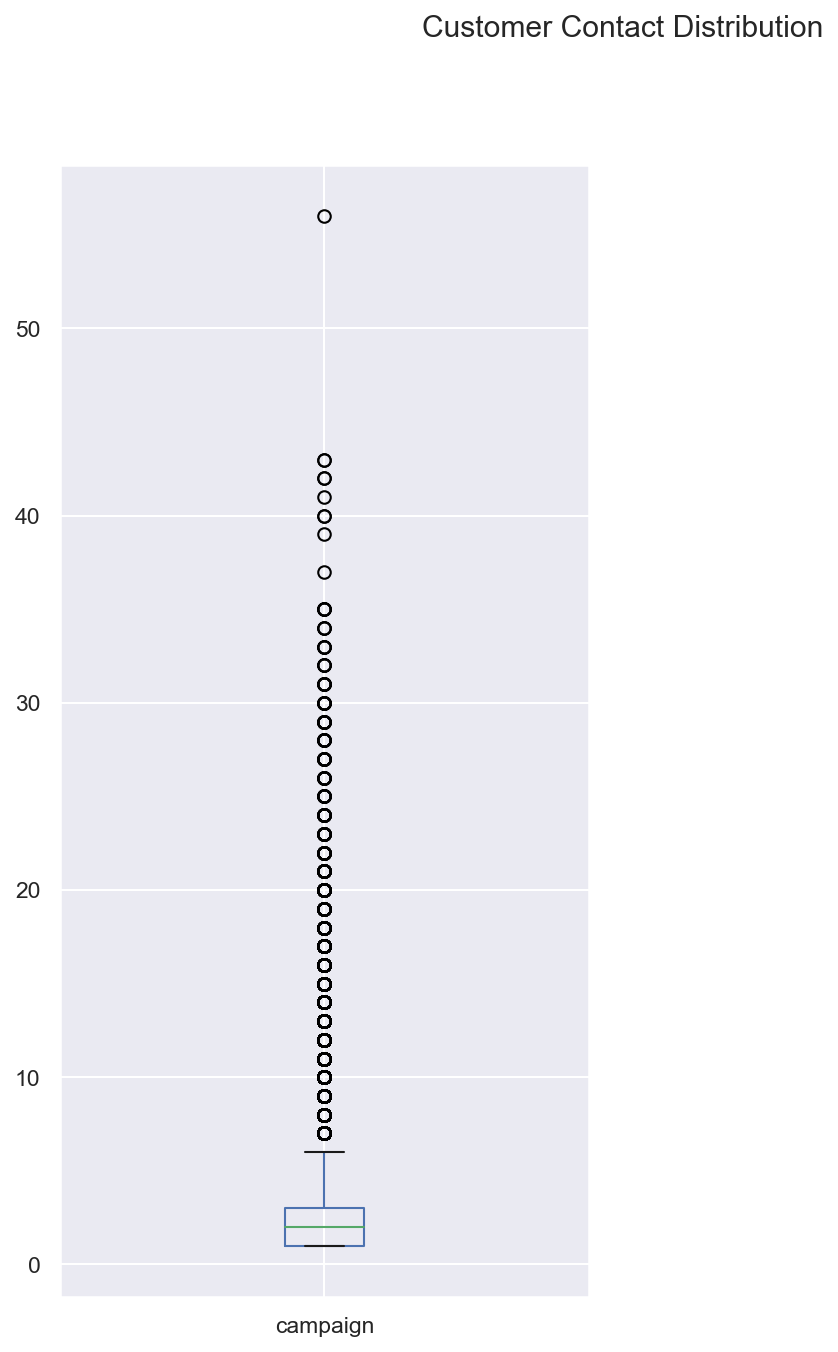

In [61]:
df[['campaign']].plot(kind = 'box', figsize = (10,10),subplots = True, layout = (1,2),sharex = False, sharey = False, title='Customer Contact Distribution')
plt.show()

#### Campaign and Customer Contact Mechanics:  
   **Majority of the Bank's customers have been contacted by the campaign around 1-3 times. There are some clients who seem to  have been contacted as many as 48 times. This outlier could be an anomalous record.**

In [62]:
df['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

In [63]:
df.drop(['day_of_week', 'contact', 'month'], axis=1, inplace = True)

In [64]:
#deal with missing values

for column in df.columns:
    df[column].replace('unknown', np.nan, inplace=True)
    df.dropna(inplace=True)

In [65]:
df.reset_index(inplace=True,drop=True)
df

age          job  marital            education default housing loan  \
0       56    housemaid  married             basic.4y      no      no   no   
1       37     services  married          high.school      no     yes   no   
2       40       admin.  married             basic.6y      no      no   no   
3       56     services  married          high.school      no      no  yes   
4       59       admin.  married  professional.course      no      no   no   
...    ...          ...      ...                  ...     ...     ...  ...   
30473   73      retired  married  professional.course      no     yes   no   
30474   46  blue-collar  married  professional.course      no      no   no   
30475   56      retired  married    university.degree      no     yes   no   
30476   44   technician  married  professional.course      no      no   no   
30477   74      retired  married  professional.course      no     yes   no   

       duration  campaign  pdays  previous     poutcome  emp_var_rate  \
0           261         1    999         0  nonexistent           1.1   
1           226         1    999         0  nonexistent           1.1   
2           151         1    999         0  nonexistent           1.1   
3           307         1    999         0  nonexistent           1.1   
4           139         1    999         0  nonexistent           1.1   
...         ...       ...    ...       ...          ...           ...   
30473       334         1    999         0  nonexistent          -1.1   
30474       383         1    999         0  nonexistent          -1.1   
30475       189         2    999         0  nonexistent          -1.1   
30476       442         1    999         0  nonexistent          -1.1   
30477       239         3    999         1      failure          -1.1   

       cons_price_idx  cons_conf_idx  euribor3m  nr_employed    y  
0              93.994          -36.4      4.857       5191.0   no  
1              93.994          -36.4      4.857       5191.0   no  
2              93.994          -36.4      4.857       5191.0   no  
3              93.994          -36.4      4.857       5191.0   no  
4              93.994          -36.4      4.857       5191.0   no  
...               ...            ...        ...          ...  ...  
30473          94.767          -50.8      1.028       4963.6  yes  
30474          94.767          -50.8      1.028       4963.6   no  
30475          94.767          -50.8      1.028       4963.6   no  
30476          94.767          -50.8      1.028       4963.6  yes  
30477          94.767          -50.8      1.028       4963.6   no  

[30478 rows x 18 columns]

In [66]:
#One hot encoding

df  = pd.get_dummies(df, drop_first = True)

df

age  duration  campaign  pdays  previous  emp_var_rate  cons_price_idx  \
0       56       261         1    999         0           1.1          93.994   
1       37       226         1    999         0           1.1          93.994   
2       40       151         1    999         0           1.1          93.994   
3       56       307         1    999         0           1.1          93.994   
4       59       139         1    999         0           1.1          93.994   
...    ...       ...       ...    ...       ...           ...             ...   
30473   73       334         1    999         0          -1.1          94.767   
30474   46       383         1    999         0          -1.1          94.767   
30475   56       189         2    999         0          -1.1          94.767   
30476   44       442         1    999         0          -1.1          94.767   
30477   74       239         3    999         1          -1.1          94.767   

       cons_conf_idx  euribor3m  nr_employed  ...  education_high.school  \
0              -36.4      4.857       5191.0  ...                      0   
1              -36.4      4.857       5191.0  ...                      1   
2              -36.4      4.857       5191.0  ...                      0   
3              -36.4      4.857       5191.0  ...                      1   
4              -36.4      4.857       5191.0  ...                      0   
...              ...        ...          ...  ...                    ...   
30473          -50.8      1.028       4963.6  ...                      0   
30474          -50.8      1.028       4963.6  ...                      0   
30475          -50.8      1.028       4963.6  ...                      0   
30476          -50.8      1.028       4963.6  ...                      0   
30477          -50.8      1.028       4963.6  ...                      0   

       education_illiterate  education_professional.course  \
0                         0                              0   
1                         0                              0   
2                         0                              0   
3                         0                              0   
4                         0                              1   
...                     ...                            ...   
30473                     0                              1   
30474                     0                              1   
30475                     0                              0   
30476                     0                              1   
30477                     0                              1   

       education_university.degree  default_yes  housing_yes  loan_yes  \
0                                0            0            0         0   
1                                0            0            1         0   
2                                0            0            0         0   
3                                0            0            0         1   
4                                0            0            0         0   
...                            ...          ...          ...       ...   
30473                            0            0            1         0   
30474                            0            0            0         0   
30475                            1            0            1         0   
30476                            0            0            0         0   
30477                            0            0            1         0   

       poutcome_nonexistent  poutcome_success  y_yes  
0                         1                 0      0  
1                         1                 0      0  
2                         1                 0      0  
3                         1                 0      0  
4                         1                 0      0  
...                     ...               ...    ...  
30473                     1                 0      1  
30474                     1                 0  

In [67]:
df.head().T

0         1         2         3  \
age                              56.000    37.000    40.000    56.000   
duration                        261.000   226.000   151.000   307.000   
campaign                          1.000     1.000     1.000     1.000   
pdays                           999.000   999.000   999.000   999.000   
previous                          0.000     0.000     0.000     0.000   
emp_var_rate                      1.100     1.100     1.100     1.100   
cons_price_idx                   93.994    93.994    93.994    93.994   
cons_conf_idx                   -36.400   -36.400   -36.400   -36.400   
euribor3m                         4.857     4.857     4.857     4.857   
nr_employed                    5191.000  5191.000  5191.000  5191.000   
job_blue-collar                   0.000     0.000     0.000     0.000   
job_entrepreneur                  0.000     0.000     0.000     0.000   
job_housemaid                     1.000     0.000     0.000     0.000   
job_management                    0.000     0.000     0.000     0.000   
job_retired                       0.000     0.000     0.000     0.000   
job_self-employed                 0.000     0.000     0.000     0.000   
job_services                      0.000     1.000     0.000     1.000   
job_student                       0.000     0.000     0.000     0.000   
job_technician                    0.000     0.000     0.000     0.000   
job_unemployed                    0.000     0.000     0.000     0.000   
marital_married                   1.000     1.000     1.000     1.000   
marital_single                    0.000     0.000     0.000     0.000   
education_basic.6y                0.000     0.000     1.000     0.000   
education_basic.9y                0.000     0.000     0.000     0.000   
education_high.school             0.000     1.000     0.000     1.000   
education_illiterate              0.000     0.000     0.000     0.000   
education_professional.course     0.000     0.000     0.000     0.000   
education_university.degree       0.000     0.000     0.000     0.000   
default_yes                       0.000     0.000     0.000     0.000   
housing_yes                       0.000     1.000     0.000     0.000   
loan_yes                          0.000     0.000     0.000     1.000   
poutcome_nonexistent              1.000     1.000     1.000     1.000   
poutcome_success                  0.000     0.000     0.000     0.000   
y_yes                             0.000     0.000     0.000     0.000   

                                      4  
age                              59.000  
duration                        139.000  
campaign                          1.000  
pdays                           999.000  
previous                          0.000  
emp_var_rate                      1.100  
cons_price_idx                   93.994  
cons_conf_idx                   -36.400  
euribor3m                         4.857  
nr_employed                    5191.000  
job_blue-collar                   0.000  
job_entrepreneur                  0.000  
job_housemaid                     0.000  
job_management                    0.000  
job_retired                       0.000  
job_self-employed                 0.000  
job_services                      0.000  
job_student                       0.000  
job_technician                    0.000  
job_unemployed                    0.000  
marital_married                   1.000  
marital_single                    0.000  
education_basic.6y                0.000  
education_basic.9y                0.000  
education_high.school             0.000  
education_illiterate              0.000  
education_professional.course     1.000  
education_university.degree       0.000  
default_yes                       0.000  
housing_yes                       0.000  
loan_yes                          0.000  
poutcome_nonexistent              1.000  
poutcome_success                  0.000  
y_yes                             0.000

In [68]:
df.shape

(30478, 34)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [69]:
X = df.drop("y_yes", axis=1)

y = df['y_yes']


In [70]:
print("X Columns: ",list(X.columns))

X Columns:  ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_married', 'marital_single', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'default_yes', 'housing_yes', 'loan_yes', 'poutcome_nonexistent', 'poutcome_success']


In [71]:
X.shape

(30478, 33)

In [72]:
y.shape

(30478,)

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42)

In [74]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((22858, 33), (22858,), (7620, 33), (7620,))

In [75]:
# MinMaxScaler Object
scaler = MinMaxScaler()

scaler.fit_transform(X_train)

array([[0.24675325, 0.03822692, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.19480519, 0.1154941 , 0.07142857, ..., 1.        , 1.        ,
        0.        ],
       [0.14285714, 0.04595364, 0.04761905, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.32467532, 0.06201708, 0.02380952, ..., 0.        , 1.        ,
        0.        ],
       [0.22077922, 0.02541684, 0.14285714, ..., 1.        , 1.        ,
        0.        ],
       [0.33766234, 0.06018707, 0.        , ..., 0.        , 1.        ,
        0.        ]])

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [76]:
# Predict values and probability of training and testing data
def prediction_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_train_pred_prob = model.predict_proba(X_train)[:, 1]
    y_test_pred = model.predict(X_test)
    y_test_pred_prob = model.predict_proba(X_test)[:, 1]
    return y_train_pred, y_train_pred_prob, y_test_pred, y_test_pred_prob

In [77]:
# Draw ROC curve from training and test data probability
def draw_roc( train_actual, train_probs, test_actual, test_probs ):
    train_fpr, train_tpr, train_thresholds = metrics.roc_curve( train_actual, train_probs,
                                              drop_intermediate = False )
    test_fpr, test_tpr, test_thresholds = metrics.roc_curve( test_actual, test_probs,
                                              drop_intermediate = False )
    train_auc_score = metrics.roc_auc_score( train_actual, train_probs )
    test_auc_score = metrics.roc_auc_score( test_actual, test_probs )
    plt.figure(figsize=(5, 5))
    plt.plot( train_fpr, train_tpr, label='ROC curve (area = %0.2f)' % train_auc_score )
    plt.plot( test_fpr, test_tpr, label='ROC curve (area = %0.2f)' % test_auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [78]:
logreg = LogisticRegression(solver='lbfgs', random_state = 100)
logreg = logreg.fit(X_train, y_train)

In [79]:
y_train_pred, y_train_pred_prob, y_test_pred,y_test_pred_prob= prediction_model(logreg, X_train, y_train, X_test, y_test)

### Problem 9: Score the Model

What is the accuracy of your model?

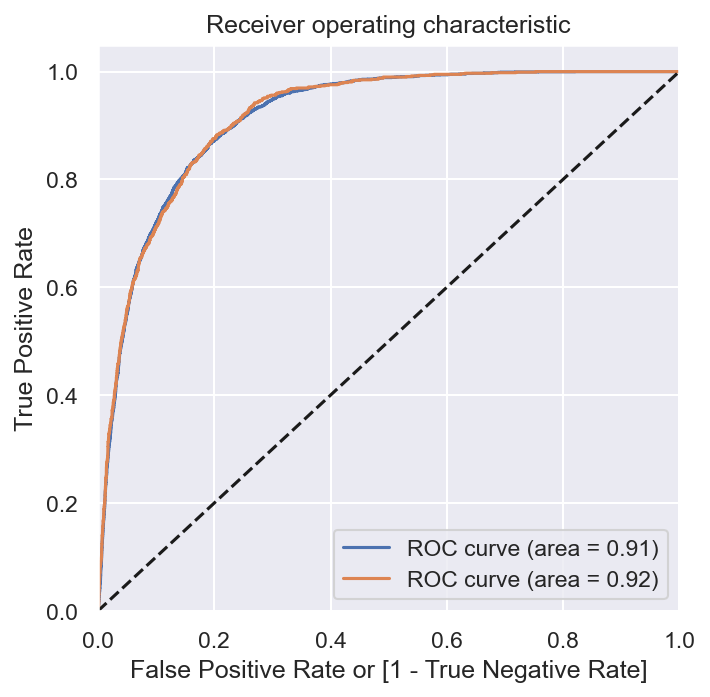

In [80]:
draw_roc(y_train, y_train_pred_prob, y_test, y_test_pred_prob)

In [81]:
print("Accuracy train: ", accuracy_score(y_train, y_train_pred))
print("Accuracy test: ", accuracy_score(y_test, y_test_pred))

Accuracy train:  0.8981100708723423
Accuracy test:  0.89750656167979


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [82]:
def model_report(model_name, model):
    print('\nSearch for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data')
    model.fit(X_train, y_train)
    optimal_th = 0.5   # start with default threshold value
    
    for i in range(0,3):
        score_list = []
        print('\nLooping decimal place', i+1) 
        th_list = [np.linspace(optimal_th-0.4999, optimal_th+0.4999, 11), 
                  # eg [ 0.0001 , 0.1008, 0.2006, 0.3004, 0.4002, 0.5, 0.5998, 0.6996, 0.7994, 0.8992, 0.9999 ]
                 np.linspace(optimal_th-0.1, optimal_th+0.1, 21), 
                  # eg 0.3xx [ 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 ]
                 np.linspace(optimal_th-0.01, optimal_th+0.01, 21)]
                  # eg 0.30x [ 0.29 , 0.291, 0.292, 0.293, 0.294, 0.295, 0.296, 0.297, 0.298, 0.299, 0.3  , 0.301, 0.302, 0.303, 0.304, 0.305, 0.306, 0.307, 0.308, 0.309, 0.31 ]
        for th in th_list[i]:
            y_pred = (model.predict_proba(X_test)[:,1] >= th)
            f1scor = f1_score(y_test, y_pred)
            score_list.append(f1scor)
            print('{:.3f}->{:.4f}'.format(th, f1scor), end=',  ')   # display score in 4 decimal pl
        optimal_th = float(th_list[i][score_list.index(max(score_list))])

    print('optimal F1 score = {:.4f}'.format(max(score_list)))
    print('optimal threshold = {:.3f}'.format(optimal_th))

    print(model_name, 'accuracy score is')
    print('Training: {:.2f}%'.format(100*model.score(X_train, y_train)))  # score uses accuracy
    print('Test set: {:.2f}%'.format(100*model.score(X_test, y_test)))   # should use cross validation

    y_pred = (model.predict_proba(X_test)[:,1] >= 0.25)
    print('\nAdjust threshold to 0.25:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))

    y_pred = model.predict(X_test)
    print('\nDefault threshold of 0.50:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))

    y_pred = (model.predict_proba(X_test)[:,1] >= 0.75)
    print('\nAdjust threshold to 0.75:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))

    y_pred = (model.predict_proba(X_test)[:,1] >= optimal_th)
    print('\nOptimal threshold {:.3f}'.format(optimal_th))
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))
    
    global model_f1, model_auc, model_ll, model_roc_auc
    model_f1 = f1_score(y_test, y_pred)

    y_pred = model.predict_proba(X_test)
    model_ll = log_loss(y_test, y_pred)
    print(model_name, 'Log-loss: {:.4f}'.format(model_ll))
    y_pred = model.predict(X_test)
    model_roc_auc = roc_auc_score(y_test, y_pred)
    print(model_name, 'roc_auc_score: {:.4f}'.format(model_roc_auc)) 
    y_pred = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    model_auc = auc(fpr, tpr)
    print(model_name, 'AUC: {:.4f}'.format(model_auc))

    # plot the ROC curve
    plt.figure(figsize = [6,6])
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % model_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    # plt.savefig('roc_auc_score')
    plt.show()
  
    return

# initialise lists to collect the results to plot later
model_list = []
f1_list = []
auc_list = []
ll_list = []
roc_auc_list = []
time_list = []
train_score=[]
test_score=[]



"""""" KNN """"""

Search for optimal hyperparameter K in KNN, vary K from 1 to 20, using KFold(5) Cross Validation on train data
0.4965, 0.4005, 0.5174, 0.4462, 0.5306, 0.4722, 0.5357, 0.4941, 0.5440, 0.5072, 0.5448, 0.5154, 0.5525, 0.5224, 0.5562, 0.5302, 0.5546, 0.5328, 0.5570, 0.5371, optimal cv F1 score = 0.5570
optimal value of K = 19

Search for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data

Looping decimal place 1
0.000->0.4720,  0.100->0.5532,  0.200->0.6069,  0.300->0.6297,  0.400->0.6019,  0.500->0.5645,  0.600->0.4790,  0.700->0.3222,  0.800->0.1843,  0.900->0.0645,  1.000->0.0280,  
Looping decimal place 2
0.200->0.6069,  0.210->0.6069,  0.220->0.6269,  0.230->0.6269,  0.240->0.6269,  0.250->0.6269,  0.260->0.6269,  0.270->0.6297,  0.280->0.6297,  0.290->0.6297,  0.300->0.6297,  0.310->0.6297,  0.320->0.6259,  0.330->0.6259,  0.340->0.6259,  0.350->0.6259,  0.360->0.6259,  0.370->0.6019,  0.380->0.6019,  0.390->0.6019,  0.400->0.6019,  
Loo

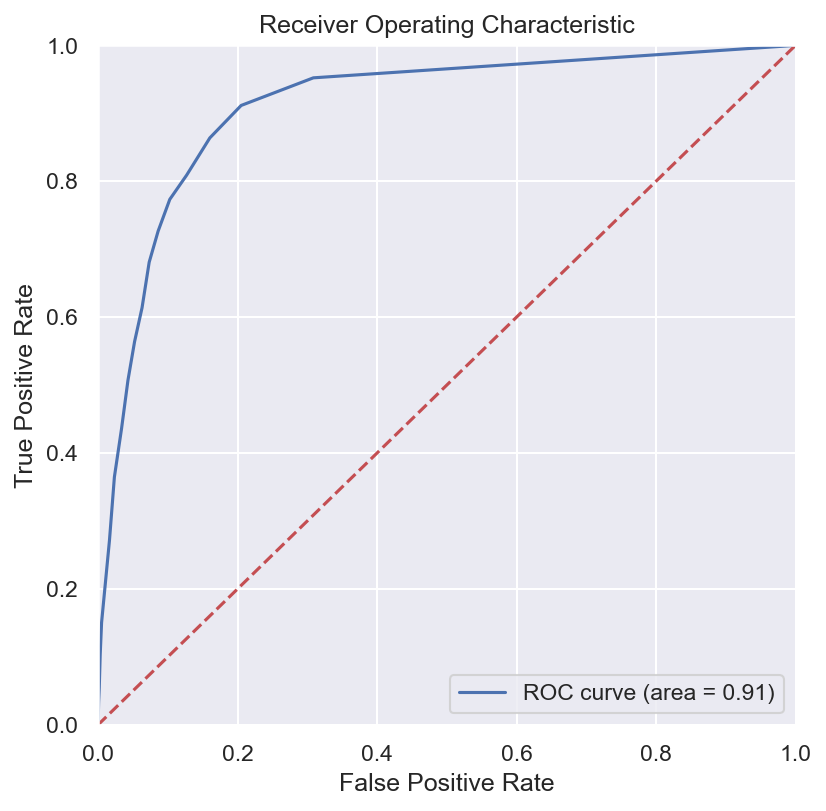


Compare with KNN classification_report (same as default threshold 0.50)
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      6636
           1       0.64      0.51      0.56       984

    accuracy                           0.90      7620
   macro avg       0.78      0.73      0.75      7620
weighted avg       0.89      0.90      0.89      7620



In [83]:
print('\n"""""" KNN """"""')
print('\nSearch for optimal hyperparameter K in KNN, vary K from 1 to 20, using KFold(5) Cross Validation on train data')
kf = KFold(n_splits=5, random_state=21, shuffle=True)  #produce the k folds
k_scores = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = k)
    cvs = cross_val_score(knn, X_train, y_train, cv=kf, scoring='f1').mean()
    k_scores.append(cvs)
    print('{:.4f}'.format(cvs), end=", ")
print('optimal cv F1 score = {:.4f}'.format(max(k_scores)))   # 4 decimal pl
optimal_k = k_scores.index(max(k_scores))+1   # index 0 is for k=1
print('optimal value of K =', optimal_k)

time1 = time.time()
knn = KNeighborsClassifier(n_neighbors = optimal_k)
model_report('KNN', knn)

print('\nCompare with KNN classification_report (same as default threshold 0.50)')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

model_list.append('KNN')
f1_list.append(model_f1)
auc_list.append(model_auc)
ll_list.append(model_ll)
roc_auc_list.append(model_roc_auc)
train_score.append(knn.score(X_train, y_train))
test_score.append(knn.score(X_test, y_test))
time_list.append(time.time() - time1)


"""""" RandomForestClassifier """"""

Search for optimal n_estimators in RandomForest, vary 100 to 500, using KFold(5) Cross Validation on train data
100->0.5552, 150->0.5555, 200->0.5523, 250->0.5577, 300->0.5574, 350->0.5641, 400->0.5538, 450->0.5577, 500->0.5566, optimal F1 score = 0.5641
optimal n_estimators = 350

Search for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data

Looping decimal place 1
0.000->0.3075,  0.100->0.5965,  0.200->0.6419,  0.300->0.6602,  0.400->0.6352,  0.500->0.5766,  0.600->0.4765,  0.700->0.3622,  0.800->0.2179,  0.900->0.0703,  1.000->0.0000,  
Looping decimal place 2
0.200->0.6419,  0.210->0.6480,  0.220->0.6492,  0.230->0.6475,  0.240->0.6503,  0.250->0.6533,  0.260->0.6564,  0.270->0.6560,  0.280->0.6553,  0.290->0.6549,  0.300->0.6602,  0.310->0.6560,  0.320->0.6510,  0.330->0.6466,  0.340->0.6441,  0.350->0.6420,  0.360->0.6417,  0.370->0.6379,  0.380->0.6389,  0.390->0.6377,  0.400->0.6352,  
Looping decimal place 3
0.

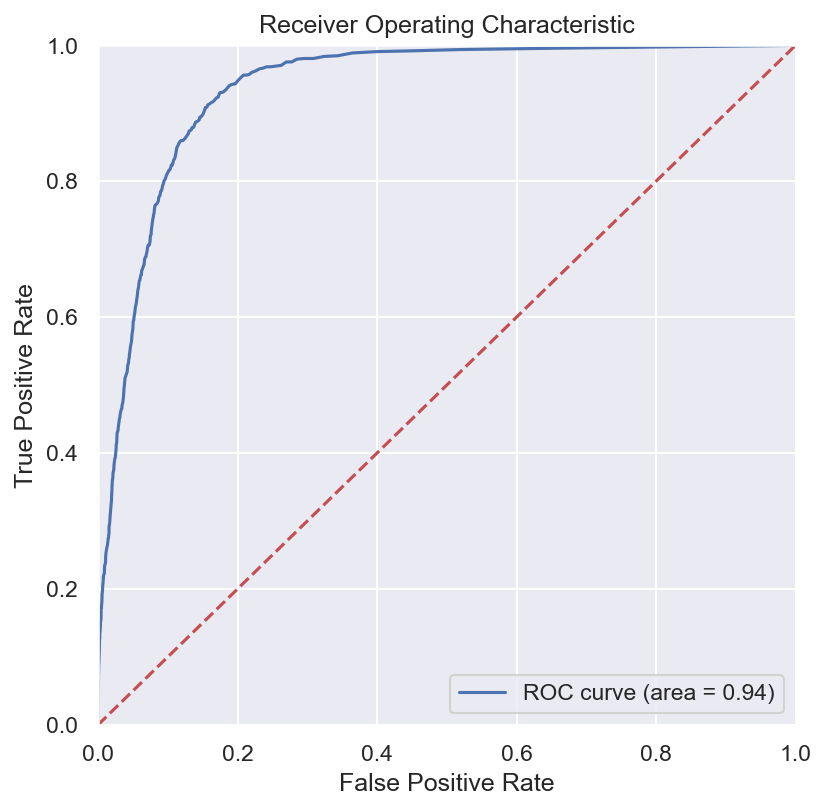

In [84]:
print('\n"""""" RandomForestClassifier """"""')

print('\nSearch for optimal n_estimators in RandomForest, vary 100 to 500, using KFold(5) Cross Validation on train data')
kf = KFold(n_splits=5, random_state=21, shuffle=True)  #produce the k folds
score_list = []
n_list = []
for n in [100, 150, 200, 250, 300, 350, 400, 450, 500]:
    randomforest = RandomForestClassifier(n_estimators=n)
    cvs = (cross_val_score(randomforest, X_train, y_train, cv=kf, scoring='f1')).mean()
    score_list.append(cvs)
    n_list.append(n)
    print('{:.0f}->{:.4f}'.format(n, cvs), end=", ")   # display score in 4 decimal place
print('optimal F1 score = {:.4f}'.format(max(score_list)))
optimal_n = int(n_list[score_list.index(max(score_list))])
print('optimal n_estimators = {:.0f}'.format(optimal_n))

time1 = time.time()
randomforest = RandomForestClassifier(n_estimators=optimal_n)
model_report('RandomForestClassifier', randomforest)

model_list.append('RandomForestClassifier')
f1_list.append(model_f1)
auc_list.append(model_auc)
ll_list.append(model_ll)
roc_auc_list.append(model_roc_auc)
train_score.append(randomforest.score(X_train, y_train))
test_score.append(randomforest.score(X_test, y_test))
time_list.append(time.time() - time1)


"""""" SVC """"""

Search for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data

Looping decimal place 1
0.000->0.2287,  0.100->0.5585,  0.200->0.3668,  0.300->0.3381,  0.400->0.3346,  0.500->0.3348,  0.600->0.3351,  0.700->0.3353,  0.800->0.0456,  0.900->0.0000,  1.000->0.0000,  
Looping decimal place 2
0.000->0.2287,  0.010->0.2287,  0.020->0.2287,  0.030->0.2287,  0.040->0.2287,  0.050->0.2287,  0.060->0.2287,  0.070->0.2287,  0.080->0.2287,  0.090->0.3601,  0.100->0.5585,  0.110->0.5819,  0.120->0.5205,  0.130->0.4713,  0.140->0.4379,  0.150->0.4154,  0.160->0.3961,  0.170->0.3843,  0.180->0.3784,  0.190->0.3734,  0.200->0.3668,  
Looping decimal place 3
0.100->0.5585,  0.101->0.5684,  0.102->0.5807,  0.103->0.5876,  0.104->0.5876,  0.105->0.5949,  0.106->0.5947,  0.107->0.5920,  0.108->0.5943,  0.109->0.5863,  0.110->0.5819,  0.111->0.5704,  0.112->0.5626,  0.113->0.5539,  0.114->0.5504,  0.115->0.5415,  0.116->0.5355,  0.117->0.5317,  0.118->0.5280,  

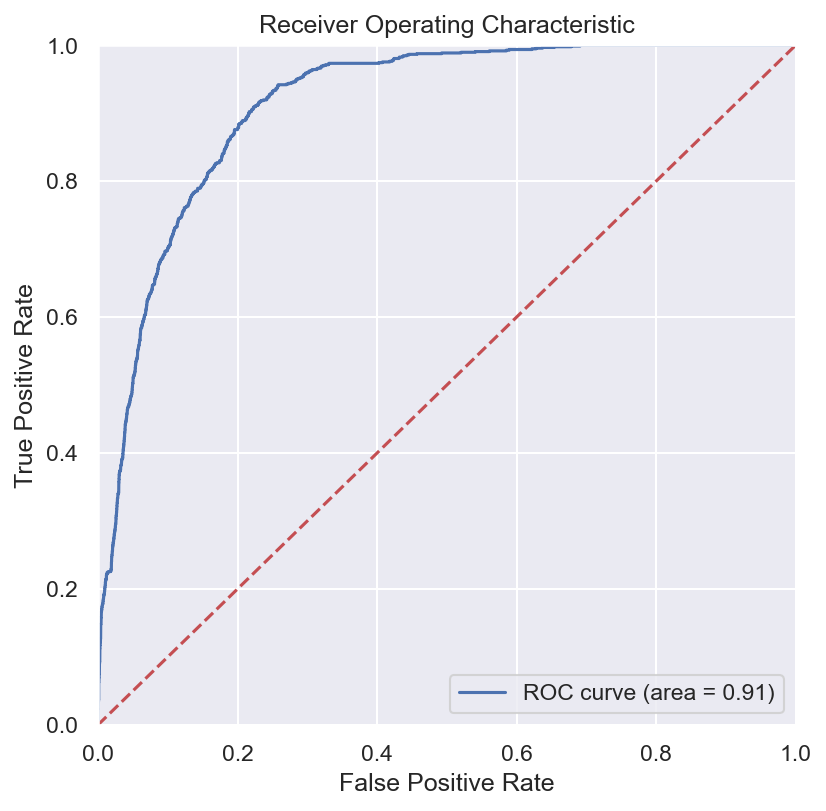

In [85]:
print('\n"""""" SVC """"""')
time1 = time.time()
svc = SVC(gamma='scale', probability=True)
model_report('SVC', svc)

model_list.append('SVC')
f1_list.append(model_f1)
auc_list.append(model_auc)
ll_list.append(model_ll)
roc_auc_list.append(model_roc_auc)
# actual time spent, or
train_score.append(svc.score(X_train, y_train))
test_score.append(svc.score(X_test, y_test))
time_list.append(time.time() - time1)



"""""" LogisticRegression """"""

Search for optimal hyperparameter C in LogisticRegresssion, vary C from 0.001 to 1000, using KFold(5) Cross Validation on train data
0.4759, 0.4789, 0.4814, 0.4800, 0.4800, 0.4832, 0.4847, 0.4855, 0.4827, 0.4816, 0.4809, 0.4840, 0.4860, 0.4836, 0.4829, 0.4846, 0.4855, 0.4882, 0.4888, 0.4864, 0.4906, 0.4875, 0.4832, 0.4843, 0.4881, 0.4878, 0.4883, 0.4915, 0.4883, 0.4892, 0.4877, 0.4932, 0.4905, 0.4887, 0.4895, 0.4880, 0.4881, 0.4860, 0.4921, 0.4918, 0.4858, 0.4894, 0.4936, 0.4915, 0.4910, 0.4917, 0.4936, 0.4871, 0.4933, 0.4861, 0.4885, 0.4946, 0.4881, 0.4930, 0.4908, 0.4903, 0.4875, 0.4911, 0.4949, 0.4906, 0.4879, 0.4863, 0.4918, 0.4883, 0.4909, 0.4861, 0.4875, 0.4859, 0.4912, 0.4921, 0.4945, 0.4876, 0.4888, 0.4942, 0.4826, 0.4906, 0.4913, 0.4903, 0.4916, 0.4921, 0.4885, 0.4898, 0.4939, 0.4905, 0.4923, 0.4927, 0.4914, 0.4906, 0.4884, 0.4954, 0.4876, 0.4898, 0.4914, 0.4891, 0.4916, 0.4887, 0.4913, 0.4907, 0.4952, 0.4919, 0.4900, 0.4914, 0.4911, 0.4965, 

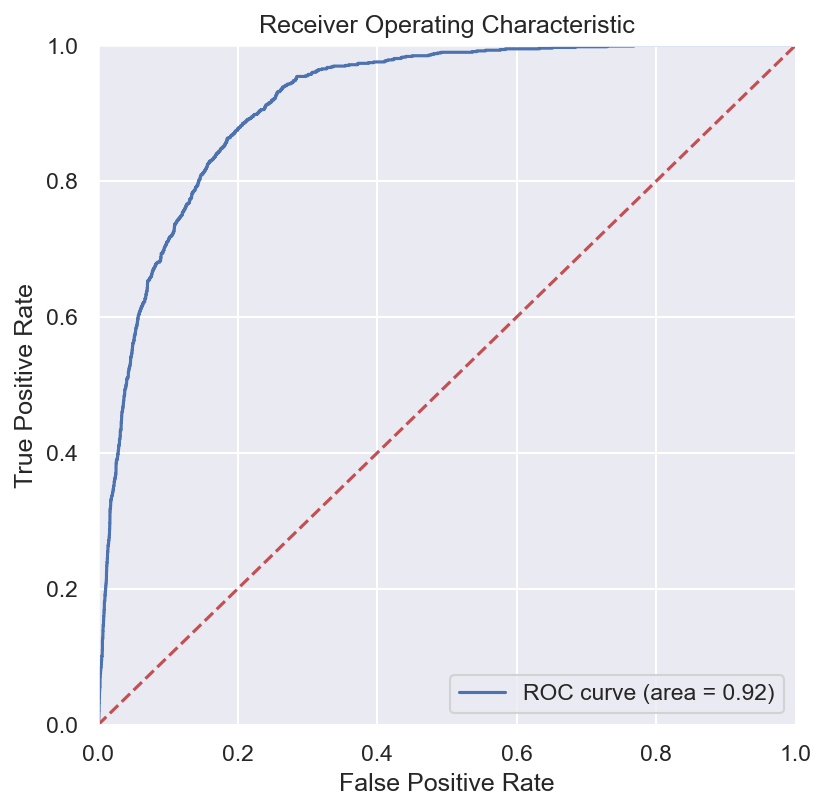

In [86]:
print('\n"""""" LogisticRegression """"""')
print('\nSearch for optimal hyperparameter C in LogisticRegresssion, vary C from 0.001 to 1000, using KFold(5) Cross Validation on train data')
kf = KFold(n_splits=5, random_state=21, shuffle=True)  # k folds
score_list = []
c_list = 10**np.linspace(-3,3,200)
for c in c_list:
    logit = LogisticRegression(C = c)
    cvs = (cross_val_score(logit, X_train, y_train, cv=kf, scoring='f1')).mean()
    score_list.append(cvs)
    print('{:.4f}'.format(cvs), end=", ")   # 4 decimal pl
print('optimal cv F1 score = {:.4f}'.format(max(score_list)))
optimal_c = float(c_list[score_list.index(max(score_list))])
print('optimal value of C = {:.3f}'.format(optimal_c))

time1 = time.time()
logit = LogisticRegression(C = optimal_c)
model_report('LogisticRegression', logit)

model_list.append('LogisticRegression')
f1_list.append(model_f1)
auc_list.append(model_auc)
ll_list.append(model_ll)
roc_auc_list.append(model_roc_auc)
train_score.append(logreg.score(X_train, y_train))
test_score.append(logreg.score(X_test, y_test))
time_list.append(time.time() - time1)


In [87]:
#Log the model performance data into a dataframe

res_dict={'model': model_list, 'train time': time_list,'Train Accuracy':train_score,'Test Accuracy':test_score}
results_df = pd.DataFrame(res_dict).set_index('model')

#round off the values to nearest 2 decimal places for the results

results_df = results_df.round(decimals = 2)
results_df

train time  Train Accuracy  Test Accuracy
model                                                            
KNN                        2483.96            0.91           0.90
RandomForestClassifier      162.37            1.00           0.90
SVC                        2036.96            0.89           0.88
LogisticRegression            4.11            0.90           0.90

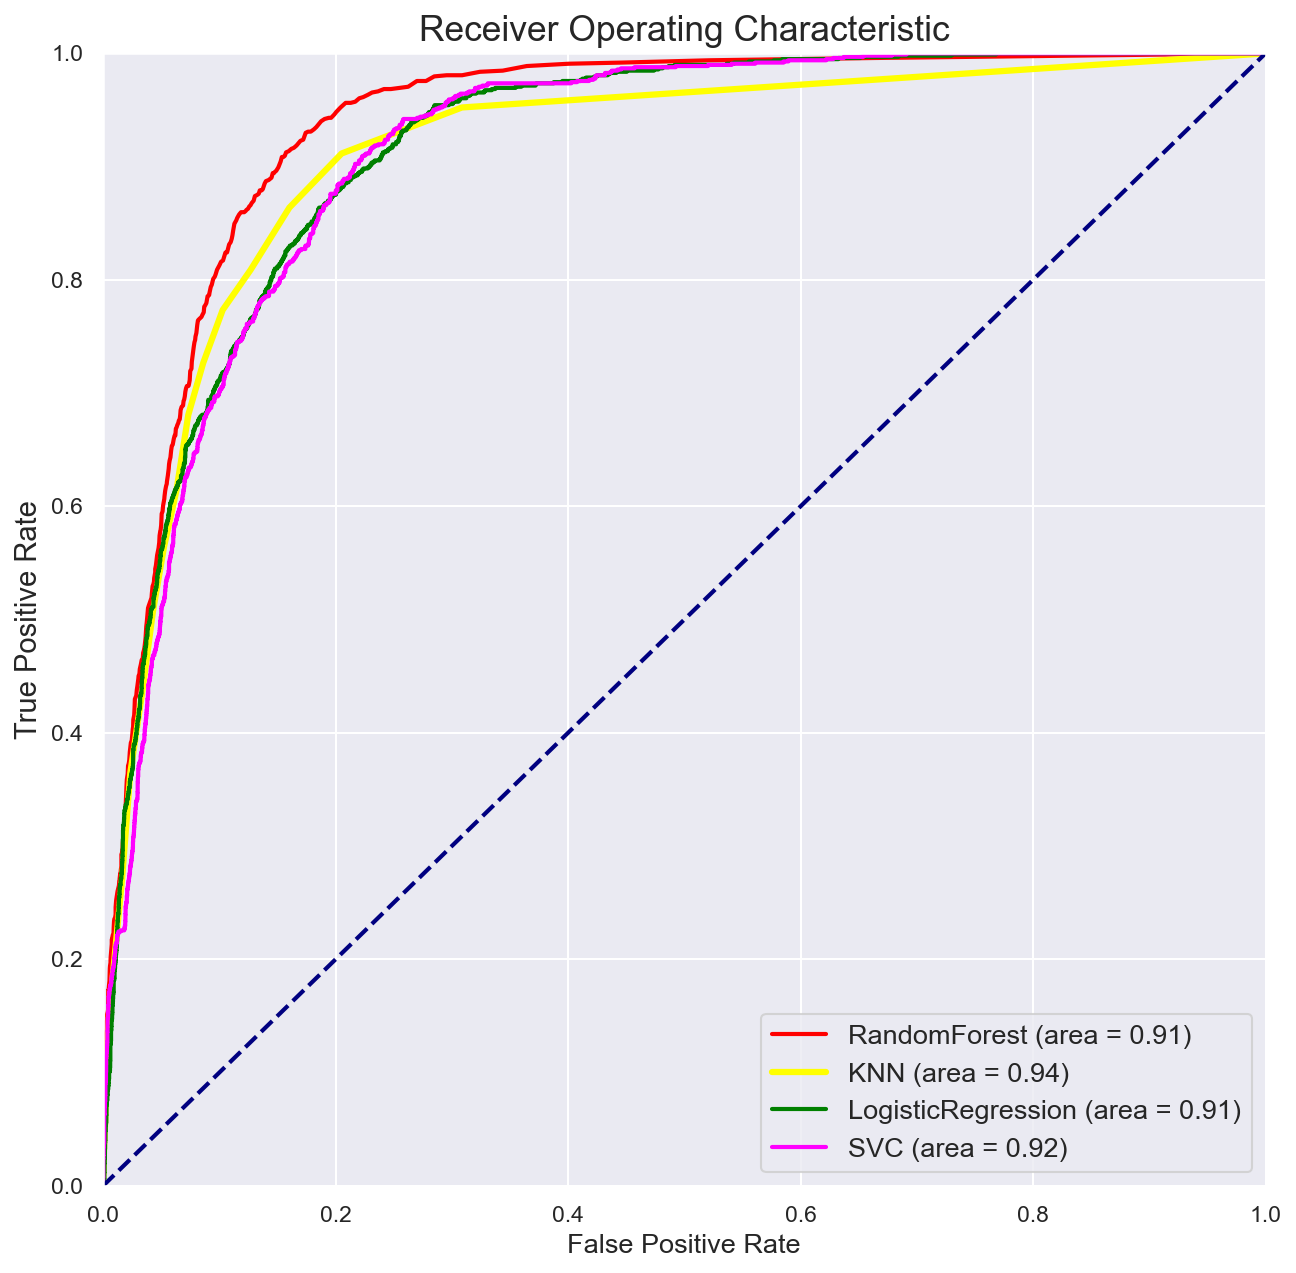

In [88]:

# plot the combined ROC curves
plt.figure(figsize=(10,10))
y_pred = randomforest.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='red',
        lw=2, label='RandomForest (area = %0.2f)' % auc_list[0])

y_pred = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='yellow',
        lw=3, label='KNN (area = %0.2f)' % auc_list[1])

y_pred = logit.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, color='green',
        lw=2, label='LogisticRegression (area = %0.2f)' % auc_list[2])
y_pred = svc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='magenta',
        lw=2, label='SVC (area = %0.2f)' % auc_list[3])

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic', fontsize=17)
plt.legend(loc='lower right', fontsize=13)
plt.show()

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

**Additional Steps for Improving the Model:**
**<li>1. Removing Class imbalance using SMOTE library </li> <li>2. Hyparameter tuning using GridSearch</li> <li>3. Additional Feature engineering by removing features based on feature importance </li>**

In [89]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline

In [90]:
#Use SMOTE to correct class imbalance 

# creating an instance
sm = SMOTE(random_state=27)

# applying it to the training set

X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)


In [91]:
def class_balanced(hexcolorA, hexcolorB, edgecolor):
    
       
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    target_cnt = y_train_smote.value_counts().sort_index()

    ax.bar(target_cnt.index, target_cnt, color=[hexcolorA if i%2==0 else hexcolorB for i in range(9)],
       width=0.30, 
       edgecolor=edgecolor, 
       linewidth=0.5)

    ax.margins(0.02, 0.05)

    for i in range(2):
        ax.annotate(f'{target_cnt[i]/len(df)*100:.3}', xy=(i, target_cnt[i]+1000),
                   va='center', ha='center',
               )

    ax.set_title('Target Variable Distribution', weight='bold', fontsize=15)
    ax.grid(axis='y', linestyle='-', alpha=0.4)

    fig.tight_layout()
    plt.show()
    return

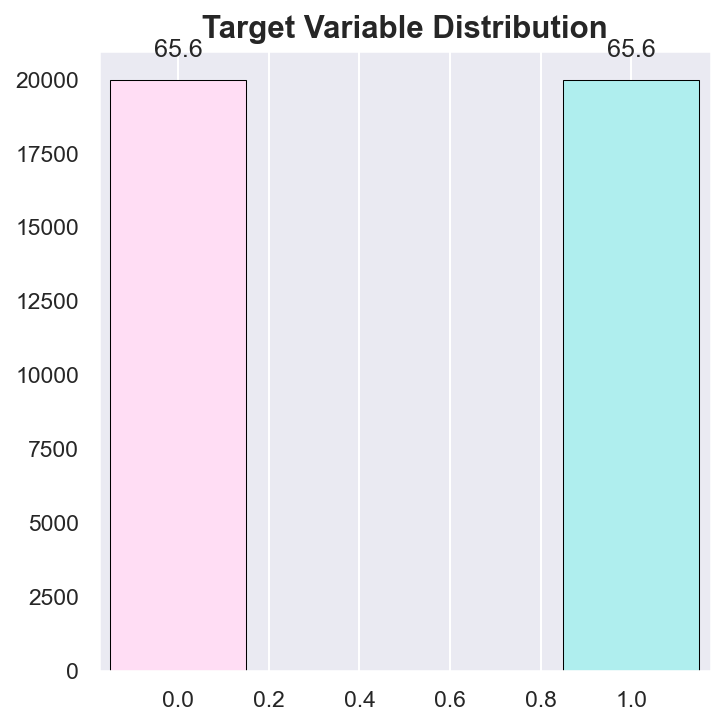

In [92]:
# Recheck inbalance after applying the smote library
class_balanced('#FFDDF4', '#AFEEEE', 'black')


**We can compare the output of cell 16 to that of cell 56 and see that smote resample method was able to balance the classes properly**

In [93]:
X_train_smote

age  duration  campaign  pdays  previous  emp_var_rate  cons_price_idx  \
0       37       188         1    999         0      1.400000       93.444000   
1       33       568         4    999         0      1.100000       93.994000   
2       29       226         3    999         1     -1.800000       92.893000   
3       29       216         1    999         0      1.400000       93.444000   
4       39      1075         2    999         0      1.400000       94.465000   
...    ...       ...       ...    ...       ...           ...             ...   
39963   26       686         1    999         0      1.400000       93.918000   
39964   28       568         2    999         0     -1.318125       94.136471   
39965   53       331         2    999         0     -1.800000       92.944007   
39966   47       164         1      8         3     -2.900000       92.201000   
39967   41       321         2      3         1     -2.900000       92.364243   

       cons_conf_idx  euribor3m  nr_employed  ...  education_basic.9y  \
0         -36.100000   4.966000  5228.100000  ...                   0   
1         -36.400000   4.856000  5191.000000  ...                   0   
2         -46.200000   1.299000  5099.100000  ...                   1   
3         -36.100000   4.964000  5228.100000  ...                   0   
4         -41.800000   4.865000  5228.100000  ...                   0   
...              ...        ...          ...  ...                 ...   
39963     -42.700000   4.962000  5228.100000  ...                   0   
39964     -37.790834   0.886634  4973.779179  ...                   0   
39965     -46.452231   1.357083  5099.100000  ...                   0   
39966     -31.400000   0.883281  5076.200000  ...                   0   
39967     -33.413763   0.955907  5076.200000  ...                   0   

       education_high.school  education_illiterate  \
0                          0                     0   
1                          0                     0   
2                          0                     0   
3                          0                     0   
4                          0                     0   
...                      ...                   ...   
39963                      0                     0   
39964                      0                     0   
39965                      0                     0   
39966                      0                     0   
39967                      0                     0   

       education_professional.course  education_university.degree  \
0                                  1                            0   
1                                  0                            0   
2                                  0                            0   
3                                  0                            1   
4                                  0                            1   
...                              ...                          ...   
39963                              0                            0   
39964                              0                            0   
39965                              0                            0   
39966                              0                            0   
39967                              0                            0   

       default_yes  housing_yes  loan_yes  poutcome_nonexistent  \
0                0            0         0                     1   
1                0            1         1                     1   
2                0            1         0                     0   
3                0            1         0                     1   
4                0            1         1                     1   
...            ...          ...       ...                   ...   
39963            0            1         0                     1   
39964            0            1         0                     1   
39965            0            0         0                     1   
39966    

In [94]:
list(X_train_smote.columns)

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'marital_married',
 'marital_single',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'default_yes',
 'housing_yes',
 'loan_yes',
 'poutcome_nonexistent',
 'poutcome_success']

In [95]:
# 1 MLM Logistic Regression
logmodel2 = LogisticRegression(solver='liblinear')
logmodel2.fit(X_train_smote,y_train_smote)
prediction_1 = logmodel2.predict(X_test)

In [96]:
# Score report
print(classification_report(y_test,prediction_1))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6636
           1       0.53      0.56      0.55       984

    accuracy                           0.88      7620
   macro avg       0.73      0.74      0.74      7620
weighted avg       0.88      0.88      0.88      7620



In [97]:
# 2 MLM Decision tree
clf = RandomForestClassifier(n_estimators=150)
clf.fit(X_train_smote,y_train_smote)
prediction_2 = clf.predict(X_test)

In [98]:
# Score report
print(classification_report(y_test,prediction_2))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      6636
           1       0.61      0.60      0.60       984

    accuracy                           0.90      7620
   macro avg       0.78      0.77      0.77      7620
weighted avg       0.90      0.90      0.90      7620



In [99]:
# 3 MLM KNN
knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_smote,y_train_smote)
prediction_3 = knn.predict(X_test)

In [100]:
# Score report
print(classification_report(y_test,prediction_3))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90      6636
           1       0.44      0.87      0.58       984

    accuracy                           0.84      7620
   macro avg       0.71      0.85      0.74      7620
weighted avg       0.91      0.84      0.86      7620



**Applying HalvingGridSearchCV for best parameter selection**

In [101]:
def create_pipe(clf):

    pipeline = Pipeline([('over', SMOTE(random_state=42)),
                         ('under', RandomUnderSampler(random_state=42)),
                         ('clf', clf)])
    return pipeline

In [102]:
models = {'RandForest' : RandomForestClassifier(random_state=42),
          'LogReg' : LogisticRegression(random_state=42),
          'knn': KNeighborsClassifier()
          }

In [103]:
for name, model, in models.items():
    clf = model
    pipeline = create_pipe(clf)
    scores = cross_val_score(pipeline, X_train, y_train, scoring='f1_macro', cv=3, n_jobs=1, error_score='raise')
    print(name, ': Mean f1 Macro: %.3f and Standard Deviation: (%.3f)' % (np.mean(scores), np.std(scores)))

RandForest : Mean f1 Macro: 0.758 and Standard Deviation: (0.001)
LogReg : Mean f1 Macro: 0.736 and Standard Deviation: (0.011)
knn : Mean f1 Macro: 0.725 and Standard Deviation: (0.005)


In [104]:
parameters = [{'clf__solver' : ['newton-cg', 'lbfgs', 'sag', 'liblinear'],
               'clf__C' : [.1, 1, 10, 100, 1000]}]

clf = LogisticRegression(random_state=42, max_iter=500)
pipeline = create_pipe(clf)


In [105]:
pipeline.get_params()

{'memory': None,
 'steps': [('over', SMOTE(random_state=42)),
  ('under', RandomUnderSampler(random_state=42)),
  ('clf', LogisticRegression(max_iter=500, random_state=42))],
 'verbose': False,
 'over': SMOTE(random_state=42),
 'under': RandomUnderSampler(random_state=42),
 'clf': LogisticRegression(max_iter=500, random_state=42),
 'over__k_neighbors': 5,
 'over__n_jobs': None,
 'over__random_state': 42,
 'over__sampling_strategy': 'auto',
 'under__random_state': 42,
 'under__replacement': False,
 'under__sampling_strategy': 'auto',
 'clf__C': 1.0,
 'clf__class_weight': None,
 'clf__dual': False,
 'clf__fit_intercept': True,
 'clf__intercept_scaling': 1,
 'clf__l1_ratio': None,
 'clf__max_iter': 500,
 'clf__multi_class': 'auto',
 'clf__n_jobs': None,
 'clf__penalty': 'l2',
 'clf__random_state': 42,
 'clf__solver': 'lbfgs',
 'clf__tol': 0.0001,
 'clf__verbose': 0,
 'clf__warm_start': False}

In [106]:
grid = HalvingGridSearchCV(pipeline, 
                           parameters, 
                           scoring='f1_macro', 
                           cv=3).fit(X_train, y_train)


print("Best cross-validation accuracy: {:.3f}".format(grid.best_score_))
print("Test set score: {:.3f}".format(grid.score(X_test, y_test))) 
print("Best parameters: {}".format(grid.best_params_))



Best cross-validation accuracy: 0.737
Test set score: 0.743
Best parameters: {'clf__C': 0.1, 'clf__solver': 'liblinear'}


In [107]:
clf = KNeighborsClassifier()
pipeline = create_pipe(clf)

In [108]:
pipeline.get_params()

{'memory': None,
 'steps': [('over', SMOTE(random_state=42)),
  ('under', RandomUnderSampler(random_state=42)),
  ('clf', KNeighborsClassifier())],
 'verbose': False,
 'over': SMOTE(random_state=42),
 'under': RandomUnderSampler(random_state=42),
 'clf': KNeighborsClassifier(),
 'over__k_neighbors': 5,
 'over__n_jobs': None,
 'over__random_state': 42,
 'over__sampling_strategy': 'auto',
 'under__random_state': 42,
 'under__replacement': False,
 'under__sampling_strategy': 'auto',
 'clf__algorithm': 'auto',
 'clf__leaf_size': 30,
 'clf__metric': 'minkowski',
 'clf__metric_params': None,
 'clf__n_jobs': None,
 'clf__n_neighbors': 5,
 'clf__p': 2,
 'clf__weights': 'uniform'}

In [109]:
# define the parameter values for grid search

k_range = list(range(1, 26))
print(k_range)
param_grid = [{'clf__weights': ["uniform", "distance"], 'over__k_neighbors': k_range}]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


In [110]:
# instantiate the halving grid
halving_grid=HalvingGridSearchCV(pipeline, param_grid, cv=10, verbose=3, n_jobs = -1)

# fit the grid with data
halving_grid.fit(X_train, y_train)


n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 846
max_resources_: 22858
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 50
n_resources: 846
Fitting 10 folds for each of 50 candidates, totalling 500 fits
----------
iter: 1
n_candidates: 17
n_resources: 2538
Fitting 10 folds for each of 17 candidates, totalling 170 fits
----------
iter: 2
n_candidates: 6
n_resources: 7614
Fitting 10 folds for each of 6 candidates, totalling 60 fits
----------
iter: 3
n_candidates: 2
n_resources: 22842
Fitting 10 folds for each of 2 candidates, totalling 20 fits


HalvingGridSearchCV(cv=10,
                    estimator=Pipeline(steps=[('over', SMOTE(random_state=42)),
                                              ('under',
                                               RandomUnderSampler(random_state=42)),
                                              ('clf', KNeighborsClassifier())]),
                    n_jobs=-1,
                    param_grid=[{'clf__weights': ['uniform', 'distance'],
                                 'over__k_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                       9, 10, 11, 12, 13, 14,
                                                       15, 16, 17, 18, 19, 20,
                                                       21, 22, 23, 24, 25]}],
                    refit=<function _refit_callable at 0x000002182D625D90>,
                    verbose=3)

In [111]:
print("Best cross-validation accuracy: {:.3f}".format(halving_grid.best_score_))
print("Test set score: {:.3f}".format(halving_grid.score(X_test, y_test))) 
print("Best parameters: {}".format(halving_grid.best_params_))

Best cross-validation accuracy: 0.840
Test set score: 0.847
Best parameters: {'clf__weights': 'distance', 'over__k_neighbors': 23}


In [112]:
results_df

train time  Train Accuracy  Test Accuracy
model                                                            
KNN                        2483.96            0.91           0.90
RandomForestClassifier      162.37            1.00           0.90
SVC                        2036.96            0.89           0.88
LogisticRegression            4.11            0.90           0.90

In [113]:
y_pred_KNN = halving_grid.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred_KNN))

0.8472440944881889


In [114]:
# Score report
print(classification_report(y_test,y_pred_KNN))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      6636
           1       0.45      0.80      0.57       984

    accuracy                           0.85      7620
   macro avg       0.71      0.83      0.74      7620
weighted avg       0.90      0.85      0.86      7620



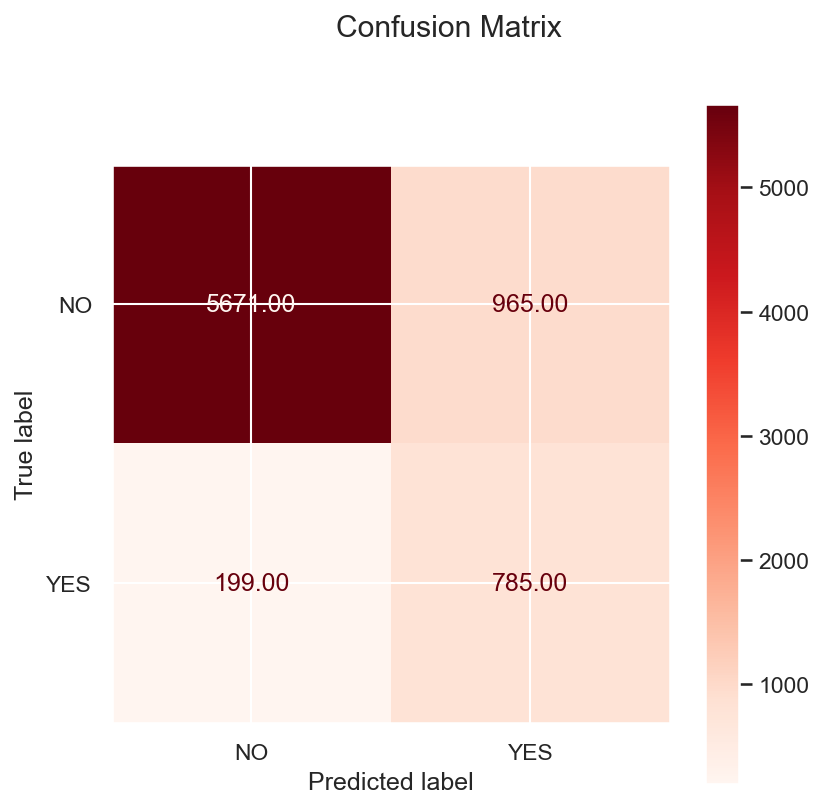

In [115]:
# Plot
plot_1 = plot_confusion_matrix(halving_grid, X_test, y_test, display_labels=["NO","YES"],cmap = plt.cm.Reds,values_format = '.2f')
plot_1.figure_.suptitle("Confusion Matrix")
plt.show()

In [116]:
clf = RandomForestClassifier()
pipeline = create_pipe(clf)

In [117]:
pipeline.get_params()

{'memory': None,
 'steps': [('over', SMOTE(random_state=42)),
  ('under', RandomUnderSampler(random_state=42)),
  ('clf', RandomForestClassifier())],
 'verbose': False,
 'over': SMOTE(random_state=42),
 'under': RandomUnderSampler(random_state=42),
 'clf': RandomForestClassifier(),
 'over__k_neighbors': 5,
 'over__n_jobs': None,
 'over__random_state': 42,
 'over__sampling_strategy': 'auto',
 'under__random_state': 42,
 'under__replacement': False,
 'under__sampling_strategy': 'auto',
 'clf__bootstrap': True,
 'clf__ccp_alpha': 0.0,
 'clf__class_weight': None,
 'clf__criterion': 'gini',
 'clf__max_depth': None,
 'clf__max_features': 'auto',
 'clf__max_leaf_nodes': None,
 'clf__max_samples': None,
 'clf__min_impurity_decrease': 0.0,
 'clf__min_impurity_split': None,
 'clf__min_samples_leaf': 1,
 'clf__min_samples_split': 2,
 'clf__min_weight_fraction_leaf': 0.0,
 'clf__n_estimators': 100,
 'clf__n_jobs': None,
 'clf__oob_score': False,
 'clf__random_state': None,
 'clf__verbose': 0,
 'cl

In [118]:
# define the parameter values for grid search

param_grid = { 'clf__bootstrap': [True], 'clf__max_depth': [5, 10, None], 'clf__max_features': ['auto', 'log2'], 'clf__n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15],'clf__verbose': [1]}

In [119]:


# instantiate the halving grid
halving_grid=HalvingGridSearchCV(pipeline, param_grid, cv=10, verbose=3, n_jobs = -1)

# fit the grid with data
halving_grid.fit(X_train, y_train)


n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 846
max_resources_: 22858
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 60
n_resources: 846
Fitting 10 folds for each of 60 candidates, totalling 600 fits
----------
iter: 1
n_candidates: 20
n_resources: 2538
Fitting 10 folds for each of 20 candidates, totalling 200 fits
----------
iter: 2
n_candidates: 7
n_resources: 7614
Fitting 10 folds for each of 7 candidates, totalling 70 fits
----------
iter: 3
n_candidates: 3
n_resources: 22842
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    1.9s finished


HalvingGridSearchCV(cv=10,
                    estimator=Pipeline(steps=[('over', SMOTE(random_state=42)),
                                              ('under',
                                               RandomUnderSampler(random_state=42)),
                                              ('clf',
                                               RandomForestClassifier())]),
                    n_jobs=-1,
                    param_grid={'clf__bootstrap': [True],
                                'clf__max_depth': [5, 10, None],
                                'clf__max_features': ['auto', 'log2'],
                                'clf__n_estimators': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 15],
                                'clf__verbose': [1]},
                    refit=<function _refit_callable at 0x000002182D625D90>,
                    verbose=3)

In [120]:
print("Best cross-validation accuracy: {:.3f}".format(halving_grid.best_score_))
print("Test set score: {:.3f}".format(halving_grid.score(X_test, y_test))) 
print("Best parameters: {}".format(halving_grid.best_params_))

Best cross-validation accuracy: 0.895
Test set score: 0.894
Best parameters: {'clf__bootstrap': True, 'clf__max_depth': None, 'clf__max_features': 'log2', 'clf__n_estimators': 12, 'clf__verbose': 1}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished


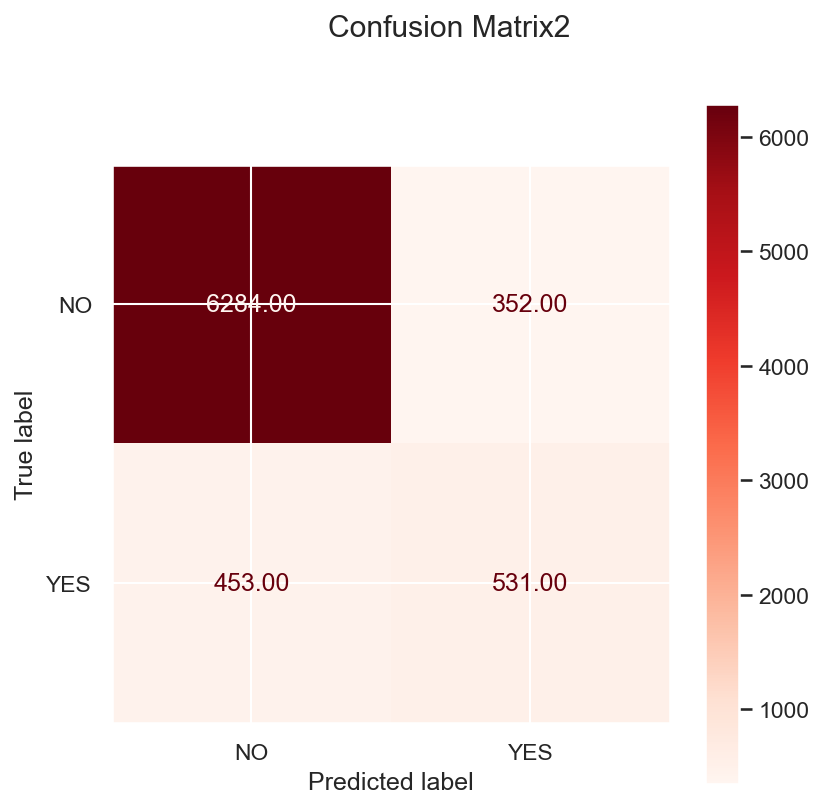

In [121]:
# Plot
plot_2 = plot_confusion_matrix(halving_grid, X_test, y_test, display_labels=["NO","YES"],cmap = plt.cm.Reds,values_format = '.2f')
plot_2.figure_.suptitle("Confusion Matrix2")
plt.show()

**Best RandomForest based Model based on HalvingGridSearch results:**

In [122]:
#setup a pipeline based on GridSearch suggested results

optimum_model = RandomForestClassifier(bootstrap=True, criterion="entropy", max_features='log2', min_samples_leaf=18, min_samples_split=6, n_estimators=10)
optimum_pipeline = Pipeline([('over', SMOTE(random_state=42)),
                         ('under', RandomUnderSampler(random_state=42)),
                         ('clf', optimum_model)])
optimum_pipeline.fit(X_train, y_train)
optimum_results = optimum_pipeline.predict(X_test)
 


In [129]:
import matplotlib.pyplot as plt
def feature_importance(model,X):

    feature_importances = model._final_estimator.feature_importances_

    features = pd.DataFrame({'features': X.columns,'importance': (feature_importances)*100})
    features.sort_values(by='importance', ascending=False)
    features = features.sort_values(by='importance', ascending=False)
    # plot feature importance
    importance=feature_importances
    plt.bar([x for x in range(len(importance))], importance)
    plt.show()

    return features

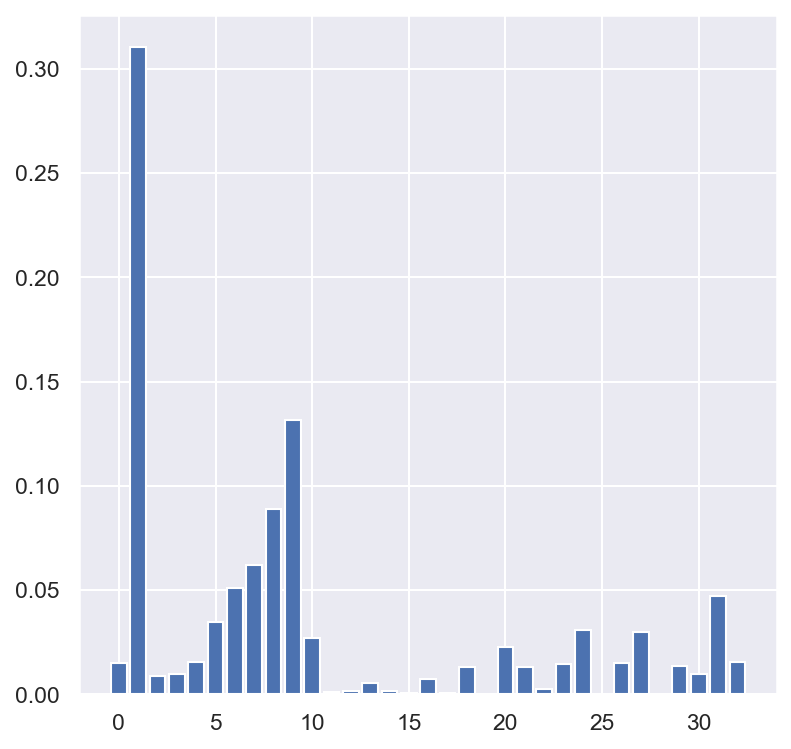

features  importance
1                        duration   31.051792
9                     nr_employed   13.164829
8                       euribor3m    8.863708
7                   cons_conf_idx    6.216027
6                  cons_price_idx    5.088890
31           poutcome_nonexistent    4.710768
5                    emp_var_rate    3.479306
24          education_high.school    3.104572
27    education_university.degree    2.967917
10                job_blue-collar    2.716818
20                marital_married    2.248356
32               poutcome_success    1.556708
4                        previous    1.540243
0                             age    1.502220
26  education_professional.course    1.476623
23             education_basic.9y    1.442270
29                    housing_yes    1.351949
21                 marital_single    1.319612
18                 job_technician    1.315215
30                       loan_yes    0.956030
3                           pdays    0.952376
2                        campaign    0.877019
16                   job_services    0.751735
13                 job_management    0.524450
22             education_basic.6y    0.257958
12                  job_housemaid    0.175019
14                    job_retired    0.163838
11               job_entrepreneur    0.093617
17                    job_student    0.060872
15              job_self-employed    0.037369
19                 job_unemployed    0.031892
25           education_illiterate    0.000000
28                    default_yes    0.000000

In [130]:
feature_importance(optimum_pipeline,X)

In [131]:
y_train_pred, y_train_pred_prob, y_test_pred,y_test_pred_prob= prediction_model(optimum_pipeline, X_train, y_train, X_test, y_test)

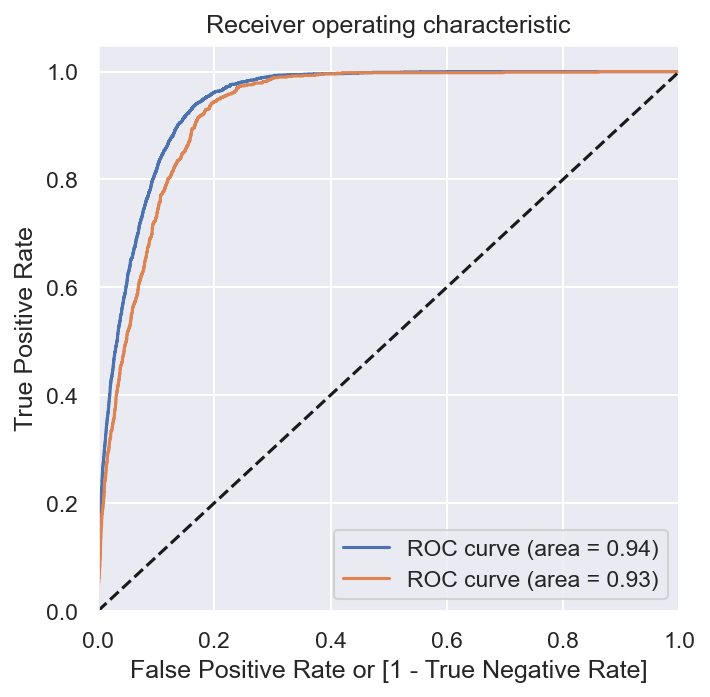

In [132]:
draw_roc(y_train, y_train_pred_prob, y_test, y_test_pred_prob)

In [133]:
print("Accuracy train: ", accuracy_score(y_train, y_train_pred))
print("Accuracy test: ", accuracy_score(y_test, y_test_pred))

Accuracy train:  0.8961851430571354
Accuracy test:  0.8821522309711286


In [134]:
highly_optimized_pipeline = RandomForestClassifier(bootstrap=True, criterion="entropy", max_features=0.9000000000000001, min_samples_leaf=18, min_samples_split=6, n_estimators=100)
highly_optimized_pipeline .fit(X_train, y_train)
results = highly_optimized_pipeline.predict(X_test)

In [135]:
def feature_importance_2(model,X):
    features = pd.DataFrame({'features': X.columns,'importance': (model.feature_importances_)*100})
    features.sort_values(by='importance', ascending=False)
    features = features.sort_values(by='importance', ascending=False)
    # plot feature importance
    importance=model.feature_importances_
    plt.bar([x for x in range(len(importance))], importance)
    plt.show()
    return features

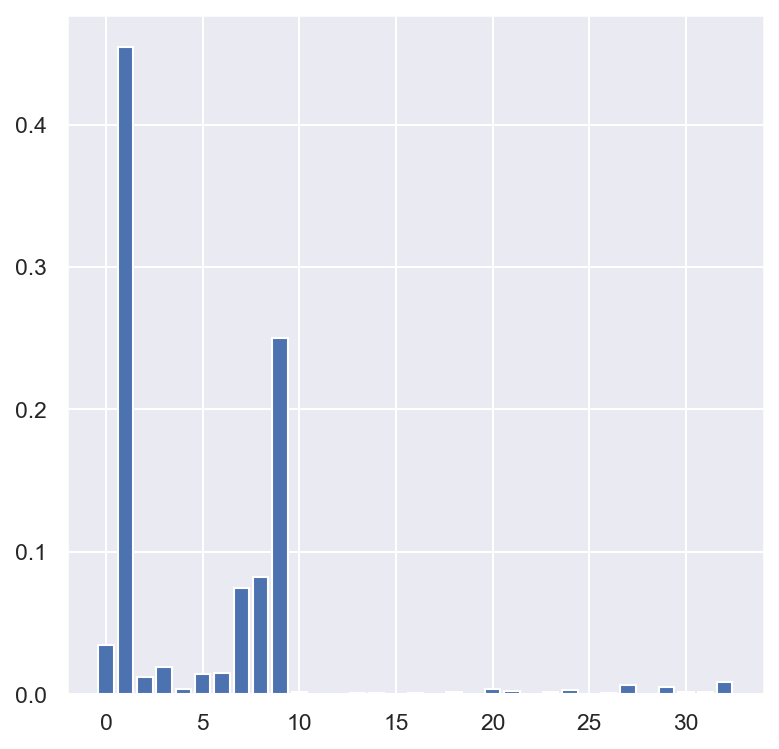

features  importance
1                        duration   45.441238
9                     nr_employed   24.997544
8                       euribor3m    8.229384
7                   cons_conf_idx    7.448082
0                             age    3.428309
3                           pdays    1.904443
6                  cons_price_idx    1.467940
5                    emp_var_rate    1.434026
2                        campaign    1.199415
32               poutcome_success    0.823041
27    education_university.degree    0.643034
29                    housing_yes    0.485838
20                marital_married    0.367906
4                        previous    0.360949
24          education_high.school    0.302443
21                 marital_single    0.256589
31           poutcome_nonexistent    0.186520
10                job_blue-collar    0.182626
18                 job_technician    0.159009
30                       loan_yes    0.142015
23             education_basic.9y    0.126106
26  education_professional.course    0.117385
14                    job_retired    0.080468
13                 job_management    0.062041
16                   job_services    0.056037
12                  job_housemaid    0.039477
17                    job_student    0.024534
11               job_entrepreneur    0.015485
22             education_basic.6y    0.010082
15              job_self-employed    0.004586
19                 job_unemployed    0.003447
25           education_illiterate    0.000000
28                    default_yes    0.000000

In [136]:
feature_importance_2(highly_optimized_pipeline,X)

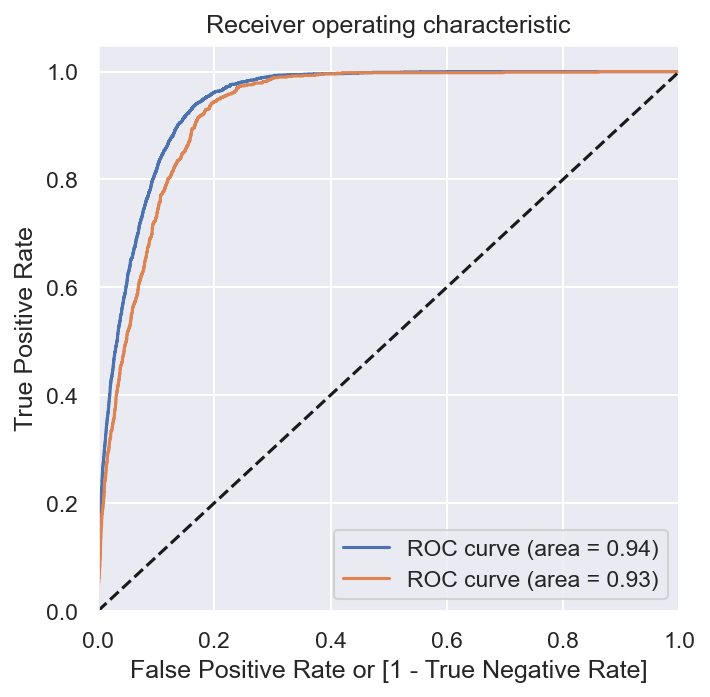

In [137]:
draw_roc(y_train, y_train_pred_prob, y_test, y_test_pred_prob)

**Using the gridsearch results as the starting point and manually tuning the parameters further optimizes the ROC curve**

**Functions to view the prediction from the optimized model from GridSearch and Highly Optimized Model**

In [138]:
def Grid_Optimized_Prediction(customer):    
   
 customer=pd.DataFrame(customer)
    
 results = optimum_pipeline.predict(customer)
    
 print("The predicted customer status is: $", results)
 print("")
 print("Here is how to interpret the results:")
 print("")
 print("An outcome of  '1' indicates that the telephone campaign was successful in converting the telephone subscriber to buy term deposit product from the bank")
 print("")
 print("An outcome of '0' indicates that the telephone campaign for term deposit was not successful with that particular telephone subscriber " )
 return

In [139]:
def Highly_Optimized_Prediction(customer):    
   
 customer=pd.DataFrame(customer)
    
 results = highly_optimized_pipeline.predict(customer)
    
 print("The predicted customer status is: $", results)
 print("")
 print("Here is how to interpret the results:")
 print("")
 print("An outcome of  '1' indicates that the telephone campaign was successful in converting the telephone subscriber to buy term deposit product from the bank")
 print("")
 print("An outcome of '0' indicates that the telephone campaign for term deposit was not successful with that particular telephone subscriber " )
 return

In [140]:
#This is going to be our random record for predictions
df[30472:]

age  duration  campaign  pdays  previous  emp_var_rate  cons_price_idx  \
30472   29       112         1      9         1          -1.1          94.767   
30473   73       334         1    999         0          -1.1          94.767   
30474   46       383         1    999         0          -1.1          94.767   
30475   56       189         2    999         0          -1.1          94.767   
30476   44       442         1    999         0          -1.1          94.767   
30477   74       239         3    999         1          -1.1          94.767   

       cons_conf_idx  euribor3m  nr_employed  ...  education_high.school  \
30472          -50.8      1.028       4963.6  ...                      0   
30473          -50.8      1.028       4963.6  ...                      0   
30474          -50.8      1.028       4963.6  ...                      0   
30475          -50.8      1.028       4963.6  ...                      0   
30476          -50.8      1.028       4963.6  ...                      0   
30477          -50.8      1.028       4963.6  ...                      0   

       education_illiterate  education_professional.course  \
30472                     0                              0   
30473                     0                              1   
30474                     0                              1   
30475                     0                              0   
30476                     0                              1   
30477                     0                              1   

       education_university.degree  default_yes  housing_yes  loan_yes  \
30472                            0            0            1         0   
30473                            0            0            1         0   
30474                            0            0            0         0   
30475                            1            0            1         0   
30476                            0            0            0         0   
30477                            0            0            1         0   

       poutcome_nonexistent  poutcome_success  y_yes  
30472                     0                 1      0  
30473                     1                 0      1  
30474                     1                 0      0  
30475                     1                 0      0  
30476                     1                 0      1  
30477                     0                 0      0  

[6 rows x 34 columns]

In [141]:
features=df[30472:]
features= features.drop("y_yes", axis=1)

In [142]:
Grid_Optimized_Prediction(features)

The predicted customer status is: $ [1 1 1 0 1 1]

Here is how to interpret the results:

An outcome of  '1' indicates that the telephone campaign was successful in converting the telephone subscriber to buy term deposit product from the bank

An outcome of '0' indicates that the telephone campaign for term deposit was not successful with that particular telephone subscriber 


In [143]:
Highly_Optimized_Prediction(features)

The predicted customer status is: $ [0 1 1 0 1 0]

Here is how to interpret the results:

An outcome of  '1' indicates that the telephone campaign was successful in converting the telephone subscriber to buy term deposit product from the bank

An outcome of '0' indicates that the telephone campaign for term deposit was not successful with that particular telephone subscriber 


#### Result Summary:

**We can see that the last model is pretty accurate. It got one prediction wrong which is in line with the accuracy rate on test data and ROC characterestics**

**Findings and Actionable Insights:**

1. The objective of this case study was to come up with an optimum classification model to predict whether a customer will subscribe to a term deposit from the bank or not given the customer data.
2. There were a lot of categorical variables and some numerical variables which capture the various attributed of a typical customer at this Portuguese bank.



<li>3. Exploratory data analysis showed absence of null values in the dataset, and the data is imbalanced, where “no” is the majority class.</li>
<li>4. Univariate analysis revealed that day_of_week does not help very much when it comes to predicting the target variable. Some numerical features tend to predict the target variable much better (for example: nr_employed, euribor rate etc.)</li>
<li>5. Dataset preprocessing of Categorical data was done using 1 hot encoding method. </li>
<li>6. Basic models were built using K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.</li>
The most important features in predicting whether any customer will open a term deposit based on the Random forest model was duration, nr.employed, emp.var.rate, poutcome_success, euribor3m   

 <li>7. GridSearch was used to find the best parameters. Random Forest model gave the best performance  with Halving GridSearchCV and the best test AUC was 0.94 which was similar to the results the researchers got in the relevent research paper.</li>


**Recommendations/NextSteps:**

<li>1. We could reduce the dimensions/features further to tune the model.</li>
<li>2. Random forest training even with HalvingGridSearch was very slow. </li>
<li>3.  There are some new libraries like T-POT https://epistasislab.github.io/tpot/using/ that use genetic algorithms for hyperparameter tuning to derive the best pipeline for this classification problem. For best feature selection we could use a library like YellowBrick  https://www.scikit-yb.org/en/latest/api/model_selection/importances.html</li><li>4. Ensemble models, XGBoost, Neural Networks/Autoencoders are other models that could be tried for this class of problems</li>

#### Conclusion:

**Optimized targeting for telemarketing is a key issue in most industries.  CRM data is a valuable and can be made more effective. Sales organizations can improve their market performance by analyzing customer data to design an efficient direct marketing campaign by improving customer experience during a sales call.  The objective can be met with an approach to predict the success of telemarketing calls using machine learning classification techniques. 
A good customer classification model can increase campaign efficiency while reducing capital and operational expenditure through better management of the available resources (e.g. human effort, phone calls, time) via intelligent targeting of potential customers.
In this project the research paper results were closely replicated using a Random Forest model that gave the best performance  with Halving GridSearchCV and the best test AUC of 0.94 which was similar to the results the researchers got in the relevent research paper. In a way I was able to validate the efficiency of data mining techniques in intelligent targeted telemarketing.**